In [55]:
# Importing necessary libraries
import numpy as np  # NumPy library for numerical operations
import pandas as pd  # Pandas library for data manipulation and analysis
from statsmodels.tsa.stattools import adfuller  # Function for Augmented Dickey-Fuller test
import matplotlib.pyplot as plt  # Matplotlib's pyplot for plotting graphs
from sklearn.metrics import mean_absolute_percentage_error


In [56]:
# Reading and initial processing of data
columns_to_load = ['PlantKey', 'Temperature', 'SunRad', 'Ratio', 'ValueTime']

# Read the Excel file with specified columns
data = pd.read_excel("data/PrelData ExJobb.xlsx", usecols=columns_to_load, index_col= "ValueTime",parse_dates=True)
data_mean = pd.read_excel("data/PrelData ExJobb.xlsx", usecols=columns_to_load, index_col= "ValueTime",parse_dates=True)
#data = pd.read_csv("data/PrelData ExJobb - kopia(Blad2 (2)).csv", usecols=columns_to_load, index_col= "ValueTime",parse_dates=True)


#data = pd.read_csv("data/PrelData ExJobb(Blad1).csv", usecols=columns_to_load, index_col= "ValueTime",parse_dates=True)
#index_col='ValueTime'
data.dtypes
#print(data_mean.index.date)
pd.set_option('display.max_rows', None)

print(data_mean.groupby(data_mean.index.date)['Ratio'].mean())
print(data_mean.groupby(data_mean.index.date)['SunRad'].mean())
print(data_mean.groupby(data_mean.index.date)['Temperature'].mean())
ratio_mean= data_mean.groupby(data_mean.index.date)['Ratio'].mean()
print(ratio_mean)


# Group by the 'Date' and calculate the mean
# Since 'valuetime' is the index and assuming it is a datetime type index:
daily_mean_ratio = data.groupby(data.index.date)['Ratio'].mean()
daily_mean_sunrad = data.groupby(data.index.date)['SunRad'].mean()
daily_mean_temperature = data.groupby(data.index.date)['Temperature'].mean()


data_mean.groupby(data_mean.index.date)['Ratio'].mean()
print(daily_mean_temperature)
#Plantkey temp sunrad ratio ValueTime


pd.set_option('display.max_colwidth', None)
data # Displaying the first few rows of the dataset





2023-01-01    134.371155
2023-01-02     69.980088
2023-01-03     37.854174
2023-01-04     14.873554
2023-01-05     18.552827
2023-01-06     24.104260
2023-01-07     37.782987
2023-01-08      8.664219
2023-01-09    165.512961
2023-01-10    189.569136
2023-01-11     16.534354
2023-01-12    156.427702
2023-01-13     71.202978
2023-01-14    136.156436
2023-01-15     98.455049
2023-01-16     78.500065
2023-01-17     11.766879
2023-01-18     71.329989
2023-01-19     80.282412
2023-01-20     74.267677
2023-01-21    105.056690
2023-01-22     84.890626
2023-01-23     38.360854
2023-01-24    105.073232
2023-01-25    111.119339
2023-01-26     78.127689
2023-01-27     78.805615
2023-01-28     87.140300
2023-01-29     85.879933
2023-01-30     79.013843
2023-01-31     72.560059
2023-02-01     50.581727
2023-02-02     20.204480
2023-02-03     27.728639
2023-02-04     29.950027
2023-02-05     33.355063
2023-02-06     31.754719
2023-02-07     99.553158
2023-02-08    100.572675
2023-02-09     87.696634


PlantKey        Ratio  SunRad   Temperature
ValueTime                                             
2023-01-01  FBO0023    96.956513   180.0 -9.250000e-01
2023-01-02  FBO0023     0.000000     0.0  2.625000e+00
2023-01-03  FBO0023    87.450395   650.0 -1.441667e+00
2023-01-04  FBO0023     0.000000     0.0 -3.600000e+00
2023-01-05  FBO0023     0.000000     0.0 -2.979167e+00
2023-01-06  FBO0023    63.392850   100.0 -4.862500e+00
2023-01-07  FBO0023     0.000000     0.0 -4.916667e-01
2023-01-08  FBO0023     0.000000     0.0  3.391667e+00
2023-01-09  FBO0023     0.000000     0.0  3.900000e+00
2023-01-10  FBO0023   186.289509    20.0  2.900000e+00
2023-01-11  FBO0023     0.000000     0.0  4.383333e+00
2023-01-12  FBO0023   373.293549    10.0  3.420833e+00
2023-01-13  FBO0023    80.977175   150.0  3.745833e+00
2023-01-14  FBO0023   374.396421    10.0  4.220833e+00
2023-01-15  FBO0023   115.304053   300.0  3.904167e+00
2023-01-16  FBO0023   105.260100   860.0  3.420833e+00
2023-01-17  FBO0023     0.000000     0.0  2.400000e+00
2023-01-18  FBO0023    59.701184  1640.0  3.200000e+00
2023-01-19  FBO0023    79.522689  1600.0  1.125000e-01
2023-01-20  FBO0023    76.500718   300.0 -1.083333e+00
2023-01-21  FBO0023   183.776457    30.0 -8.208333e-01
2023-01-22  FBO0023    82.517572   110.0 -4.220833e+00
2023-01-23  FBO0023    74.698822   170.0 -4.416667e+00
2023-01-24  FBO0023     0.000000     0.0  1.758333e+00
2023-01-25  FBO0023    62.784883   180.0  5.883333e+00
2023-01-26  FBO0023    77.244928  1610.0  3.954167e+00
2023-01-27  FBO0023    71.896555  2500.0  3.750000e-02
2023-01-28  FBO0023    64.938475   610.0 -1.208333e-01
2023-01-29  FBO0023    76.560454   620.0  2.691667e+00
2023-01-30  FBO0023    68.074551  2240.0  5.741667e+00
2023-01-31  FBO0023    77.269548  2870.0  1.854167e+00
2023-02-01  FBO0023    74.360383   160.0 -1.929167e+00
2023-02-02  FBO0023    62.206521  2420.0 -1.108333e+00
2023-02-03  FBO0023    73.023464  1980.0 -3.712500e+00
2023-02-04  FBO0023    77.555955  3180.0 -1.437500e+00
2023-02-05  FBO0023    82.690324   220.0 -3.637500e+00
2023-02-06  FBO0023    79.544720  2790.0  9.166667e-01
2023-02-07  FBO0023   204.152544    50.0  1.879167e+00
2023-02-08  FBO0023   112.173934   100.0  3.870833e+00
2023-02-09  FBO0023    98.219273   170.0  1.779167e+00
2023-02-10  FBO0023    80.109726  2900.0  3.354167e+00
2023-02-11  FBO0023    86.245874   770.0  2.166667e-01
2023-02-12  FBO0023    85.701525   980.0  3.916667e-01
2023-02-13  FBO0023    84.549215  2140.0  6.054167e+00
2023-02-14  FBO0023    76.046385  3320.0  7.975000e+00
2023-02-15  FBO0023   134.406584    90.0  2.625000e+00
2023-02-16  FBO0023    97.421870   220.0  3.020833e+00
2023-02-17  FBO0023    90.630901   320.0  4.091667e+00
2023-02-18  FBO0023   109.029233   470.0  2.975000e+00
2023-02-19  FBO0023    80.136918  4430.0  2.995833e+00
2023-02-20  FBO0023    77.367267   250.0 -1.750000e-01
2023-02-21  FBO0023    20.378662   450.0 -1.375000e+00
2023-02-22  FBO0023    77.676215  1530.0 -1.041667e-01
2023-02-23  FBO0023    46.108496   420.0  1.625000e-01
2023-02-24  FBO0023    75.316858   490.0  3.000000e-01
2023-02-25  FBO0023    27.056423   440.0 -1.762500e+00
2023-02-26  FBO0023    63.430251  1770.0 -4.083333e-01
2023-02-27  FBO0023    82.580528  2860.0  5.650000e+00
2023-02-28  FBO0023    83.121285  3420.0  6.641667e+00
2023-03-01  FBO0023    83.366332  4530.0  8.566667e+00
2023-03-02  FBO0023    84.896073  3910.0  7.766667e+00
2023-03-03  FBO0023    92.794724  1820.0  4.875000e+00
2023-03-04  FBO0023    73.666501  3760.0  2.325000e+00
2023-03-05  FBO0023    77.158911  3440.0  1.908333e+00
2023-03-06  FBO0023    66.579521  1690.0 -2.054167e+00
2023-03-07  FBO0023    85.800027  1940.0 -2.120833e+00
2023-03-09  FBO0023   117.307351   140.0 -2.783333e+00
2023-03-10  FBO0023    50.280631  1640.0 -1.620833e+00
2023-03-11  FBO0023    61.809775  2130.0 -4.137500e+00
2023-03-12  FBO0023    62.742578  5310.0  1.137500e+00
2023-03-13  FBO0023    51.371054   590.0 -9.500000e

In [57]:
data.dtypes


PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object

In [58]:
data.dtypes


PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object

In [59]:
data


PlantKey        Ratio  SunRad   Temperature
ValueTime                                             
2023-01-01  FBO0023    96.956513   180.0 -9.250000e-01
2023-01-02  FBO0023     0.000000     0.0  2.625000e+00
2023-01-03  FBO0023    87.450395   650.0 -1.441667e+00
2023-01-04  FBO0023     0.000000     0.0 -3.600000e+00
2023-01-05  FBO0023     0.000000     0.0 -2.979167e+00
2023-01-06  FBO0023    63.392850   100.0 -4.862500e+00
2023-01-07  FBO0023     0.000000     0.0 -4.916667e-01
2023-01-08  FBO0023     0.000000     0.0  3.391667e+00
2023-01-09  FBO0023     0.000000     0.0  3.900000e+00
2023-01-10  FBO0023   186.289509    20.0  2.900000e+00
2023-01-11  FBO0023     0.000000     0.0  4.383333e+00
2023-01-12  FBO0023   373.293549    10.0  3.420833e+00
2023-01-13  FBO0023    80.977175   150.0  3.745833e+00
2023-01-14  FBO0023   374.396421    10.0  4.220833e+00
2023-01-15  FBO0023   115.304053   300.0  3.904167e+00
2023-01-16  FBO0023   105.260100   860.0  3.420833e+00
2023-01-17  FBO0023     0.000000     0.0  2.400000e+00
2023-01-18  FBO0023    59.701184  1640.0  3.200000e+00
2023-01-19  FBO0023    79.522689  1600.0  1.125000e-01
2023-01-20  FBO0023    76.500718   300.0 -1.083333e+00
2023-01-21  FBO0023   183.776457    30.0 -8.208333e-01
2023-01-22  FBO0023    82.517572   110.0 -4.220833e+00
2023-01-23  FBO0023    74.698822   170.0 -4.416667e+00
2023-01-24  FBO0023     0.000000     0.0  1.758333e+00
2023-01-25  FBO0023    62.784883   180.0  5.883333e+00
2023-01-26  FBO0023    77.244928  1610.0  3.954167e+00
2023-01-27  FBO0023    71.896555  2500.0  3.750000e-02
2023-01-28  FBO0023    64.938475   610.0 -1.208333e-01
2023-01-29  FBO0023    76.560454   620.0  2.691667e+00
2023-01-30  FBO0023    68.074551  2240.0  5.741667e+00
2023-01-31  FBO0023    77.269548  2870.0  1.854167e+00
2023-02-01  FBO0023    74.360383   160.0 -1.929167e+00
2023-02-02  FBO0023    62.206521  2420.0 -1.108333e+00
2023-02-03  FBO0023    73.023464  1980.0 -3.712500e+00
2023-02-04  FBO0023    77.555955  3180.0 -1.437500e+00
2023-02-05  FBO0023    82.690324   220.0 -3.637500e+00
2023-02-06  FBO0023    79.544720  2790.0  9.166667e-01
2023-02-07  FBO0023   204.152544    50.0  1.879167e+00
2023-02-08  FBO0023   112.173934   100.0  3.870833e+00
2023-02-09  FBO0023    98.219273   170.0  1.779167e+00
2023-02-10  FBO0023    80.109726  2900.0  3.354167e+00
2023-02-11  FBO0023    86.245874   770.0  2.166667e-01
2023-02-12  FBO0023    85.701525   980.0  3.916667e-01
2023-02-13  FBO0023    84.549215  2140.0  6.054167e+00
2023-02-14  FBO0023    76.046385  3320.0  7.975000e+00
2023-02-15  FBO0023   134.406584    90.0  2.625000e+00
2023-02-16  FBO0023    97.421870   220.0  3.020833e+00
2023-02-17  FBO0023    90.630901   320.0  4.091667e+00
2023-02-18  FBO0023   109.029233   470.0  2.975000e+00
2023-02-19  FBO0023    80.136918  4430.0  2.995833e+00
2023-02-20  FBO0023    77.367267   250.0 -1.750000e-01
2023-02-21  FBO0023    20.378662   450.0 -1.375000e+00
2023-02-22  FBO0023    77.676215  1530.0 -1.041667e-01
2023-02-23  FBO0023    46.108496   420.0  1.625000e-01
2023-02-24  FBO0023    75.316858   490.0  3.000000e-01
2023-02-25  FBO0023    27.056423   440.0 -1.762500e+00
2023-02-26  FBO0023    63.430251  1770.0 -4.083333e-01
2023-02-27  FBO0023    82.580528  2860.0  5.650000e+00
2023-02-28  FBO0023    83.121285  3420.0  6.641667e+00
2023-03-01  FBO0023    83.366332  4530.0  8.566667e+00
2023-03-02  FBO0023    84.896073  3910.0  7.766667e+00
2023-03-03  FBO0023    92.794724  1820.0  4.875000e+00
2023-03-04  FBO0023    73.666501  3760.0  2.325000e+00
2023-03-05  FBO0023    77.158911  3440.0  1.908333e+00
2023-03-06  FBO0023    66.579521  1690.0 -2.054167e+00
2023-03-07  FBO0023    85.800027  1940.0 -2.120833e+00
2023-03-09  FBO0023   117.307351   140.0 -2.783333e+00
2023-03-10  FBO0023    50.280631  1640.0 -1.620833e+00
2023-03-11  FBO0023    61.809775  2130.0 -4.137500e+00
2023-03-12  FBO0023    62.742578  5310.0  1.137500e+00
2023-03-13  FBO0023    51.371054   590.0 -9.500000e

In [60]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

# Apply the function to your data
#cleaned_data = remove_outliers(data, 'Ratio')


data.describe()  # Describing the statistical aspects of data



def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Apply the function to your data column
#outliers = find_outliers_iqr(data, 'Ratio')
#print(f"Number of outliers detected: {len(outliers)}")



def remove_negative_values(data, column):
   
    filtered_data = data[data[column] >= 0]
    return filtered_data


def remove_Positive_values(data, column):
    filtered_data = data[data[column] < 200]
    return filtered_data
data=remove_negative_values(data,"Ratio")
data=remove_Positive_values(data,"Ratio")


data.describe()


#print(data.groupby(data.index.date)['Ratio'].mean())

data_mean= data.groupby(data.index.date)['Ratio'].mean()
data_mean_sunrad =data.groupby(data.index.date)['SunRad'].mean()
data_mean_temp = data.groupby(data.index.date)['Temperature'].mean()
#print(data_mean)
data_mean.to_csv('meandata/Ratio_data.csv')
data_mean_sunrad.to_csv('meandata/Sunrad_data.csv')
data_mean_temp.to_csv('meandata/Temperature_data.csv')

print(data_mean_temp)
#print(data.groupby(data.index.date)['Temperature'].mean())
#cleaned_data_final.describe()


2023-01-01    -0.621849
2023-01-02     3.251972
2023-01-03    -1.681610
2023-01-04    -3.205556
2023-01-05    -2.665385
2023-01-06    -4.319940
2023-01-07    -0.132292
2023-01-08     3.594853
2023-01-09     4.803709
2023-01-10     3.380220
2023-01-11     4.381266
2023-01-12     3.809206
2023-01-13     4.072838
2023-01-14     4.425198
2023-01-15     3.822024
2023-01-16     3.175971
2023-01-17     2.469549
2023-01-18     2.639411
2023-01-19    -0.066259
2023-01-20     0.234931
2023-01-21    -0.604993
2023-01-22    -3.284226
2023-01-23    -3.947586
2023-01-24     2.043943
2023-01-25     5.963951
2023-01-26     3.517982
2023-01-27    -0.918494
2023-01-28     0.283114
2023-01-29     2.671199
2023-01-30     4.773026
2023-01-31     1.274488
2023-02-01    -0.822588
2023-02-02    -1.588596
2023-02-03    -2.880482
2023-02-04    -2.871199
2023-02-05    -2.984954
2023-02-06    -0.288889
2023-02-07     2.163108
2023-02-08     4.374123
2023-02-09     2.134576
2023-02-10     2.708991
2023-02-11     0

In [61]:
def adf_test(series, title=''):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic for {title}: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data has no unit root and is stationary")
        return 1
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        return 0



# Data splitting
plantkeys = [
    'FBO0023', 'FSK0003', 'FSK0005', 'FSK0006', 'FSK0007', 'FSK0008', 'MIC0001',
    'SBO0001', 'SBO0002', 'SBO0005', 'SBO0007', 'SBO0009', 'SBO0010', 'SBO0011',
    'SBO0012', 'SBO0013', 'SBO0014', 'SBO0015', 'SBO0016', 'SBO0017', 'SBO0028',
    'SBO0029', 'SBO0030', 'SGA0001'
]



datasets = {}
count= 1

# Loop over each unique PlantKey in the DataFrame
import pandas as pd

# Assuming data is your DataFrame and it is already loaded

# Calculate train and test sets for each unique PlantKey and save to CSV
datasets = {}
for plantkey in data['PlantKey'].unique():
    # Filter data for the current PlantKey
    plant_data = data[data['PlantKey'] == plantkey]
    train_size = int(len(plant_data) * 0.7)  # 70% for training
    train, test = plant_data.iloc[:train_size], plant_data.iloc[train_size:]
  


    datasets[plantkey] = {'train': train, 'test': test}

    # Save the datasets to CSV files
    train.to_csv(f'{plantkey}_train.csv')
    test.to_csv(f'{plantkey}_test.csv')
    print(f'Datasets for {plantkey} saved: {plantkey}_train.csv and {plantkey}_test.csv')

# Optionally, check the data types of your DataFrame
data.dtypes






   

# Convert 'ValueTime' to datetime and set frequency, if it's part of your dataset
   



Datasets for FBO0023 saved: FBO0023_train.csv and FBO0023_test.csv
Datasets for FSK0003 saved: FSK0003_train.csv and FSK0003_test.csv
Datasets for FSK0005 saved: FSK0005_train.csv and FSK0005_test.csv
Datasets for FSK0006 saved: FSK0006_train.csv and FSK0006_test.csv
Datasets for FSK0007 saved: FSK0007_train.csv and FSK0007_test.csv
Datasets for FSK0008 saved: FSK0008_train.csv and FSK0008_test.csv
Datasets for MIC0001 saved: MIC0001_train.csv and MIC0001_test.csv
Datasets for SBO0001 saved: SBO0001_train.csv and SBO0001_test.csv
Datasets for SBO0002 saved: SBO0002_train.csv and SBO0002_test.csv
Datasets for SBO0005 saved: SBO0005_train.csv and SBO0005_test.csv
Datasets for SBO0007 saved: SBO0007_train.csv and SBO0007_test.csv
Datasets for SBO0011 saved: SBO0011_train.csv and SBO0011_test.csv
Datasets for SBO0012 saved: SBO0012_train.csv and SBO0012_test.csv
Datasets for SBO0013 saved: SBO0013_train.csv and SBO0013_test.csv
Datasets for SBO0014 saved: SBO0014_train.csv and SBO0014_test

PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object

In [62]:

#for index, row in data.iterrows():
    #train_set.to_csv(f'{plantkey}_train.csv')


In [63]:
import pandas as pd

# For plantkey FBO0023
train_fbo0023 = pd.read_csv('FBO0023_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_fbo0023.fillna(0, inplace=True)
test_fbo0023 = pd.read_csv('FBO0023_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_fbo0023.fillna(0, inplace=True)

# For plantkey FSK0003
train_fsk0003 = pd.read_csv('FSK0003_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_fsk0003.fillna(0, inplace=True)
test_fsk0003 = pd.read_csv('FSK0003_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_fsk0003.fillna(0, inplace=True)

# For plantkey FSK0005
train_fsk0005 = pd.read_csv('FSK0005_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_fsk0005.fillna(0, inplace=True)
test_fsk0005 = pd.read_csv('FSK0005_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_fsk0005.fillna(0, inplace=True)

# For plantkey FSK0006
train_fsk0006 = pd.read_csv('FSK0006_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_fsk0006.fillna(0, inplace=True)
test_fsk0006 = pd.read_csv('FSK0006_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_fsk0006.fillna(0, inplace=True)

# For plantkey FSK0007
train_fsk0007 = pd.read_csv('FSK0007_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_fsk0007.fillna(0, inplace=True)
test_fsk0007 = pd.read_csv('FSK0007_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_fsk0007.fillna(0, inplace=True)

# For plantkey FSK0008
train_fsk0008 = pd.read_csv('FSK0008_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_fsk0008.fillna(0, inplace=True)
test_fsk0008 = pd.read_csv('FSK0008_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_fsk0008.fillna(0, inplace=True)

# For plantkey MIC0001
train_mic0001 = pd.read_csv('MIC0001_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_mic0001.fillna(0, inplace=True)
test_mic0001 = pd.read_csv('MIC0001_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_mic0001.fillna(0, inplace=True)

# For plantkey SBO0001
train_sbo0001 = pd.read_csv('SBO0001_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_sbo0001.fillna(0, inplace=True)
test_sbo0001 = pd.read_csv('SBO0001_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_sbo0001.fillna(0, inplace=True)

# For plantkey SBO0002
train_sbo0002 = pd.read_csv('SBO0002_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_sbo0002.fillna(0, inplace=True)
test_sbo0002 = pd.read_csv('SBO0002_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_sbo0002.fillna(0, inplace=True)

# For plantkey SBO0005
train_sbo0005 = pd.read_csv('SBO0005_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_sbo0005.fillna(0, inplace=True)
test_sbo0005 = pd.read_csv('SBO0005_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_sbo0005.fillna(0, inplace=True)

# For plantkey SBO0007
train_sbo0007 = pd.read_csv('SBO0007_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_sbo0007.fillna(0, inplace=True)
test_sbo0007 = pd.read_csv('SBO0007_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_sbo0007.fillna(0, inplace=True)

# For plantkey SBO0011
train_sbo0011 = pd.read_csv('SBO0011_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_sbo0011.fillna(0, inplace=True)
test_sbo0011 = pd.read_csv('SBO0011_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_sbo0011.fillna(0, inplace=True)

# For plantkey SBO0012
train_sbo0012 = pd.read_csv('SBO0012_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_sbo0012.fillna(0, inplace=True)
test_sbo0012 = pd.read_csv('SBO0012_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_sbo0012.fillna(0, inplace=True)

# For plantkey SBO0013
train_sbo0013 = pd.read_csv('SBO0013_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_sbo0013.fillna(0, inplace=True)
test_sbo0013 = pd.read_csv('SBO0013_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_sbo0013.fillna(0, inplace=True)

# For plantkey SBO0014
train_sbo0014 = pd.read_csv('SBO0014_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_sbo0014.fillna(0, inplace=True)
test_sbo0014 = pd.read_csv('SBO0014_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_sbo0014.fillna(0, inplace=True)

# For plantkey SBO0015
train_sbo0015 = pd.read_csv('SBO0015_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_sbo0015.fillna(0, inplace=True)
test_sbo0015 = pd.read_csv('SBO0015_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_sbo0015.fillna(0, inplace=True)

# For plantkey SBO0016
train_sbo0016 = pd.read_csv('SBO0016_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_sbo0016.fillna(0, inplace=True)
test_sbo0016 = pd.read_csv('SBO0016_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_sbo0016.fillna(0, inplace=True)

# For plantkey SBO0017
train_sbo0017 = pd.read_csv('SBO0017_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_sbo0017.fillna(0, inplace=True)
test_sbo0017 = pd.read_csv('SBO0017_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_sbo0017.fillna(0, inplace=True)

# For plantkey SBO0028
train_sbo0028 = pd.read_csv('SBO0028_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_sbo0028.fillna(0, inplace=True)
test_sbo0028 = pd.read_csv('SBO0028_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_sbo0028.fillna(0, inplace=True)

# For plantkey SBO0030
train_sbo0030 = pd.read_csv('SBO0030_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_sbo0030.fillna(0, inplace=True)
test_sbo0030 = pd.read_csv('SBO0030_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_sbo0030.fillna(0, inplace=True)

# For plantkey SGA0001
train_sga0001 = pd.read_csv('SGA0001_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_sga0001.fillna(0, inplace=True)
test_sga0001 = pd.read_csv('SGA0001_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_sga0001.fillna(0, inplace=True)

In [64]:
# For plantkey FBO0023
train_ratio_fbo0023 = pd.read_csv('FBO0023_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_fbo0023.fillna(0, inplace=True)
test_ratio_fbo0023 = pd.read_csv('FBO0023_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_fbo0023.fillna(0, inplace=True)

# For plantkey FSK0003
train_ratio_fsk0003 = pd.read_csv('FSK0003_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_fsk0003.fillna(0, inplace=True)
test_ratio_fsk0003 = pd.read_csv('FSK0003_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_fsk0003.fillna(0, inplace=True)

# For plantkey FSK0005
train_ratio_fsk0005 = pd.read_csv('FSK0005_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_fsk0005.fillna(0, inplace=True)
test_ratio_fsk0005 = pd.read_csv('FSK0005_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_fsk0005.fillna(0, inplace=True)

# For plantkey FSK0006
train_ratio_fsk0006 = pd.read_csv('FSK0006_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_fsk0006.fillna(0, inplace=True)
test_ratio_fsk0006 = pd.read_csv('FSK0006_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_fsk0006.fillna(0, inplace=True)

# For plantkey FSK0007
train_ratio_fsk0007 = pd.read_csv('FSK0007_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_fsk0007.fillna(0, inplace=True)
test_ratio_fsk0007 = pd.read_csv('FSK0007_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_fsk0007.fillna(0, inplace=True)

# For plantkey FSK0008
train_ratio_fsk0008 = pd.read_csv('FSK0008_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_fsk0008.fillna(0, inplace=True)
test_ratio_fsk0008 = pd.read_csv('FSK0008_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_fsk0008.fillna(0, inplace=True)

# For plantkey MIC0001
train_ratio_mic0001 = pd.read_csv('MIC0001_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_mic0001.fillna(0, inplace=True)
test_ratio_mic0001 = pd.read_csv('MIC0001_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_mic0001.fillna(0, inplace=True)




# For plantkey SBO0001
train_ratio_sbo0001 = pd.read_csv('SBO0001_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_sbo0001.fillna(0, inplace=True)
test_ratio_sbo0001 = pd.read_csv('SBO0001_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_sbo0001.fillna(0, inplace=True)

# For plantkey SBO0002
train_ratio_sbo0002 = pd.read_csv('SBO0002_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_sbo0002.fillna(0, inplace=True)
test_ratio_sbo0002 = pd.read_csv('SBO0002_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_sbo0002.fillna(0, inplace=True)

# For plantkey SBO0005
train_ratio_sbo0005 = pd.read_csv('SBO0005_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_sbo0005.fillna(0, inplace=True)
test_ratio_sbo0005 = pd.read_csv('SBO0005_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_sbo0005.fillna(0, inplace=True)

# For plantkey SBO0007
train_ratio_sbo0007 = pd.read_csv('SBO0007_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_sbo0007.fillna(0, inplace=True)
test_ratio_sbo0007 = pd.read_csv('SBO0007_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_sbo0007.fillna(0, inplace=True)



# For plantkey SBO0011
train_ratio_sbo0011 = pd.read_csv('SBO0011_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_sbo0011.fillna(0, inplace=True)
test_ratio_sbo0011 = pd.read_csv('SBO0011_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_sbo0011.fillna(0, inplace=True)

# For plantkey SBO0012
train_ratio_sbo0012 = pd.read_csv('SBO0012_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_sbo0012.fillna(0, inplace=True)
test_ratio_sbo0012 = pd.read_csv('SBO0012_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_sbo0012.fillna(0, inplace=True)

# For plantkey SBO0013
train_ratio_sbo0013 = pd.read_csv('SBO0013_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_sbo0013.fillna(0, inplace=True)
test_ratio_sbo0013 = pd.read_csv('SBO0013_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_sbo0013.fillna(0, inplace=True)

# For plantkey SBO0014
train_ratio_sbo0014 = pd.read_csv('SBO0014_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_sbo0014.fillna(0, inplace=True)
test_ratio_sbo0014 = pd.read_csv('SBO0014_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_sbo0014.fillna(0, inplace=True)


train_ratio_sbo0015 = pd.read_csv('SBO0015_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_sbo0015.fillna(0, inplace=True)
test_ratio_sbo0015 = pd.read_csv('SBO0015_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_sbo0015.fillna(0, inplace=True)

# For plantkey SBO0016
train_ratio_sbo0016 = pd.read_csv('SBO0016_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_sbo0016.fillna(0, inplace=True)
test_ratio_sbo0016 = pd.read_csv('SBO0016_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_sbo0016.fillna(0, inplace=True)

# For plantkey SBO0017
train_ratio_sbo0017 = pd.read_csv('SBO0017_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_sbo0017.fillna(0, inplace=True)
test_ratio_sbo0017 = pd.read_csv('SBO0017_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_sbo0017.fillna(0, inplace=True)

# For plantkey SBO0028
train_ratio_sbo0028 = pd.read_csv('SBO0028_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_sbo0028.fillna(0, inplace=True)
test_ratio_sbo0028 = pd.read_csv('SBO0028_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_sbo0028.fillna(0, inplace=True)


# For plantkey SBO0030
train_ratio_sbo0030 = pd.read_csv('SBO0030_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_sbo0030.fillna(0, inplace=True)
test_ratio_sbo0030 = pd.read_csv('SBO0030_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_sbo0030.fillna(0, inplace=True)

# For plantkey SGA0001
train_ratio_sga0001 = pd.read_csv('SGA0001_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_sga0001.fillna(0, inplace=True)
test_ratio_sga0001 = pd.read_csv('SGA0001_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_sga0001.fillna(0, inplace=True)


In [65]:
print(test_ratio_sga0001)

                 Ratio
ValueTime             
2023-09-13   94.702909
2023-09-14   32.343942
2023-09-15   54.023143
2023-09-16   47.801150
2023-09-17   29.025681
2023-09-18   36.582626
2023-09-19   62.556261
2023-09-20   60.350530
2023-09-21   32.555404
2023-09-22   40.675566
2023-09-23   38.347278
2023-09-24   29.433817
2023-09-25   53.249902
2023-09-26   41.761581
2023-09-27   48.457098
2023-09-28   37.202491
2023-09-29   73.048108
2023-09-30   35.480791
2023-10-01   36.969444
2023-10-02   61.223344
2023-10-03   87.925443
2023-10-04   41.911619
2023-10-05   52.220025
2023-10-06   76.380596
2023-10-07   32.015813
2023-10-08   29.695854
2023-10-09   31.039493
2023-10-10   32.149317
2023-10-11   59.179644
2023-10-12   30.548771
2023-10-13   51.155561
2023-10-14   34.930373
2023-10-15   44.486831
2023-10-16   29.582479
2023-10-17   42.989205
2023-10-18   41.942429
2023-10-19   46.602968
2023-10-20   69.972273
2023-10-21   93.957151
2023-10-22   73.293980
2023-10-23   84.603905
2023-10-24 

In [66]:
def convertDate(Name):
    Name["ValueTime"] = pd.to_datetime(Name["ValueTime"])
    Name.index.freq =Name.index.freq = "D"
    Name.index.freq

arr = [train_fbo0023,test_fbo0023]
#for x in arr:
    #convertDate(x)




train_fbo0023.index.freq

<Day>

In [67]:
train_fbo0023.index.freq



<Day>

In [68]:
plant_keys = [
    'FBO0023', 'FSK0003', 'FSK0005', 'FSK0006', 'FSK0007', 'FSK0008',
    'MIC0001', 'SBO0001', 'SBO0002', 'SBO0005', 'SBO0007', 'SBO0009',
    'SBO0010', 'SBO0011', 'SBO0012', 'SBO0013', 'SBO0014', 'SBO0015',
    'SBO0016', 'SBO0017', 'SBO0028', 'SBO0029', 'SBO0030', 'SGA0001'
]
# Checking stationarity
adf_result = adfuller(train_fbo0023["Ratio"])  # Applying Augmented Dickey-Fuller test to check stationarity
print(adf_result)




from statsmodels.tsa.stattools import adfuller

# Function to perform the ADF test
def adf_test(series, title=''):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic for {title}: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

for x in plantkeys:
    print(x)
    #adf_test(train_x["Ratio"])


    train_ratio_sbo0005


(-4.956898181588217, 2.6991187608390638e-05, 6, 236, {'1%': -3.4583663275730476, '5%': -2.8738660999177132, '10%': -2.5733390785693766}, 1966.0355176985695)
FBO0023
FSK0003
FSK0005
FSK0006
FSK0007
FSK0008
MIC0001
SBO0001
SBO0002
SBO0005
SBO0007
SBO0009
SBO0010
SBO0011
SBO0012
SBO0013
SBO0014
SBO0015
SBO0016
SBO0017
SBO0028
SBO0029
SBO0030
SGA0001


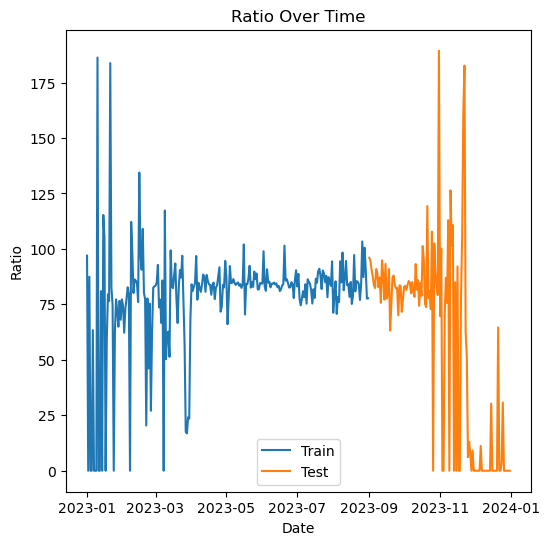

In [69]:
# Plotting the data
plt.figure(figsize=(6, 6))  # Setting the figure size for the plot
plt.plot(train_fbo0023["Ratio"], label='Train')  # Plotting the training data
plt.plot(test_fbo0023["Ratio"], label='Test')  # Plotting the testing data
plt.title('Ratio Over Time')  # Title of the plot
plt.xlabel('Date')  # X-axis label
plt.ylabel('Ratio')  # Y-axis label
plt.legend()  # Adding a legend to the plot
plt.show()  # Displaying the plot

In [70]:
# ARIMA modeling
from pmdarima import auto_arima  # Importing the auto_arima function from pmdarima
  # Creating a new series 'train1' for ARIMA modeling
auto_model = auto_arima(train_fbo0023["Ratio"], seasonal=False, trace=True, error_action="ignore", suppress_warnings=True)  # Fitting the ARIMA model
auto_model.summary()  # Displaying the summary of the model

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2230.754, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2379.375, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2299.143, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2229.041, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2377.376, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2230.984, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2230.993, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2229.772, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2228.820, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2230.664, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2230.686, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2297.146, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2229.660, Time=0.15 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.692 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  243
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -1112.410
Date:                Thu, 09 May 2024   AIC                           2228.820
Time:                        12:50:31   BIC                           2235.798
Sample:                    01-01-2023   HQIC                          2231.631
                         - 08-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9201      0.021    -43.149      0.000      -0.962      -0.878
sigma2       571.1904     20.554     27.790      0.000     530.906     611.475
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              1437.10
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.03   Skew:                             1.19
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [71]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt
# Further ARIMA modeling and forecasting
from statsmodels.tsa.arima.model import ARIMA  # Importing the ARIMA model
#data.index.freq = "1min"  # Setting the frequency of the data index to 1 minute
#data.index = pd.DatetimeIndex(data.index).to_period("1min")  # Converting the data index to DatetimeIndex with 1-minute period


In [72]:
#np.asarray(train_fbo0023)

train_fbo0023.dtypes

PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object

In [73]:
# Calculate the means and convert Series to DataFrame
data_mean = data.groupby(data.index.date)['Ratio'].mean().reset_index(name='Ratio')
data_mean_sunrad = data.groupby(data.index.date)['SunRad'].mean().reset_index(name='SunRad')
data_mean_temp = data.groupby(data.index.date)['Temperature'].mean().reset_index(name='Temperature')


# Merge the DataFrames on 'ValueTime'

data_mean.columns = ['ValueTime', 'Ratio']
data_mean_sunrad.columns = ['ValueTime', 'SunRad']
data_mean_temp.columns = ['ValueTime', 'Temperature']
combined_data = pd.merge(pd.merge(data_mean, data_mean_sunrad, on='ValueTime'), data_mean_temp, on='ValueTime')

# Save the DataFrames to CSV
data_mean.to_csv('meandata/Ratio_data.csv', index=False)
data_mean_sunrad.to_csv('meandata/Sunrad_data.csv', index=False)
data_mean_temp.to_csv('meandata/Temperature_data.csv', index=False)
combined_data.to_csv('meandata/Combined_Means.csv', index=False)



# Read the CSV files back into the environment
Ratio_data = pd.read_csv('meandata/Ratio_data.csv',index_col="ValueTime", parse_dates=True).asfreq('D')
sunrad_data = pd.read_csv('meandata/Sunrad_data.csv',index_col="ValueTime", parse_dates=True).asfreq('D')
Temp_data = pd.read_csv('meandata/Temperature_data.csv',index_col="ValueTime", parse_dates=True).asfreq('D')
combined_data_check = pd.read_csv('meandata/Combined_Means.csv', index_col="ValueTime", parse_dates=True).asfreq('D')

# Print the DataFrame to verify the changes
print(combined_data_check.head())

                Ratio      SunRad  Temperature
ValueTime                                     
2023-01-01  94.672591  271.764706    -0.621849
2023-01-02  30.199202   16.250000     3.251972
2023-01-03  37.854174  623.157895    -1.681610
2023-01-04  14.873554   20.000000    -3.205556
2023-01-05  18.552827   29.230769    -2.665385


In [74]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

def split_and_save(data, filename_prefix):
    # Determine the split point for 70% train, 30% test
    split_point = int(0.7 * len(data))
    train, test = data[:split_point], data[split_point:]

    # Save the train and test data to CSV
    train.to_csv(f'TrainTest/{filename_prefix}_train.csv')
    test.to_csv(f'TrainTest/{filename_prefix}_test.csv')



    # Return the model if you need to use it outside the function
    return auto_model

# Example usage:
ratio_model = split_and_save(Ratio_data, 'Ratio')
sunrad_model = split_and_save(sunrad_data, 'SunRad')
temp_model = split_and_save(Temp_data, 'Temperature')
combined_data_model = split_and_save(combined_data_check, "Combined")

In [75]:
import pandas as pd

def load_train_test(filename_prefix):
    # Load the train and test data from CSV files
    train = pd.read_csv(f'TrainTest/{filename_prefix}_train.csv',index_col="ValueTime", parse_dates=True).asfreq('D')
    test = pd.read_csv(f'TrainTest/{filename_prefix}_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')

    return train, test

# Load Ratio data sets
ratio_train, ratio_test = load_train_test('Ratio')
print("Loaded Ratio Train Data:")
print(ratio_train.head())

# Load SunRad data sets
sunrad_train, sunrad_test = load_train_test('SunRad')
print("Loaded SunRad Train Data:")
print(sunrad_train.head())

# Load Temperature data sets
temp_train, temp_test = load_train_test('Temperature')
print("Loaded Temperature Train Data:")
print(temp_train.head())



combined_train, combined_test = load_train_test('combined')



Loaded Ratio Train Data:
                Ratio
ValueTime            
2023-01-01  94.672591
2023-01-02  30.199202
2023-01-03  37.854174
2023-01-04  14.873554
2023-01-05  18.552827
Loaded SunRad Train Data:
                SunRad
ValueTime             
2023-01-01  271.764706
2023-01-02   16.250000
2023-01-03  623.157895
2023-01-04   20.000000
2023-01-05   29.230769
Loaded Temperature Train Data:
            Temperature
ValueTime              
2023-01-01    -0.621849
2023-01-02     3.251972
2023-01-03    -1.681610
2023-01-04    -3.205556
2023-01-05    -2.665385


In [76]:
print(ratio_train["Ratio"])


ValueTime
2023-01-01     94.672591
2023-01-02     30.199202
2023-01-03     37.854174
2023-01-04     14.873554
2023-01-05     18.552827
2023-01-06     24.104260
2023-01-07     37.782987
2023-01-08      8.664219
2023-01-09     67.910464
2023-01-10     91.908240
2023-01-11     16.534354
2023-01-12     89.897859
2023-01-13     71.202978
2023-01-14     89.690629
2023-01-15     86.443737
2023-01-16     78.500065
2023-01-17     11.766879
2023-01-18     71.329989
2023-01-19     80.282412
2023-01-20     74.267677
2023-01-21     91.631611
2023-01-22     77.188324
2023-01-23     38.360854
2023-01-24     59.913928
2023-01-25     87.043157
2023-01-26     78.127689
2023-01-27     78.805615
2023-01-28     87.140300
2023-01-29     85.879933
2023-01-30     79.013843
2023-01-31     72.560059
2023-02-01     50.581727
2023-02-02     20.204480
2023-02-03     27.728639
2023-02-04     29.950027
2023-02-05     33.355063
2023-02-06     31.754719
2023-02-07     77.355677
2023-02-08    100.572675
2023-02-09     

In [77]:
auto_model = auto_arima(ratio_train['Ratio'], seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
print(auto_model.summary())
best_order = auto_model.order


model = ARIMA(ratio_train, order=(best_order))  # Initializing the ARIMA model with specified order
fitted_model_mean = model.fit()  # Fitting the ARIMA model
fitted_model_mean.summary()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2094.138, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2116.355, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2098.736, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2098.382, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2114.355, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2101.877, Time=0.25 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2101.150, Time=0.20 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2092.687, Time=0.60 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2102.367, Time=0.42 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=2053.389, Time=2.01 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.29 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.39 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=2058.830, T

C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Ratio   No. Observations:                  255
Model:                 ARIMA(4, 1, 2)   Log Likelihood               -1019.375
Date:                Thu, 09 May 2024   AIC                           2052.749
Time:                        12:50:45   BIC                           2077.511
Sample:                    01-01-2023   HQIC                          2062.710
                         - 09-12-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3277      0.067     19.820      0.000       1.196       1.459
ar.L2         -0.2644      0.069     -3.830      0.000      -0.400      -0.129
ar.L3         -0.0852      0.083     -1.029      0.304      -0.247       0.077
ar.L4         -0.1550      0.060     -2.599      0.009      -0.272      -0.038
ma.L1         -1.8246      0.062    -29.356      0.000      -1.946      -1.703
ma.L2          0.8459      0.063     13.384      0.000       0.722       0.970
sigma2       177.2603     10.266     17.267      0.000     157.140     197.381
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               553.57
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.06   Skew:                            -1.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [78]:
ratio_train.dtypes

Ratio    float64
dtype: object

In [79]:
forecast_arima_mean = fitted_model_mean.forecast(steps=len(ratio_test))  # Forecasting using the fitted model
#print(ratio_test)
print(ratio_test  )



                 Ratio
ValueTime             
2023-09-13   90.737051
2023-09-14   77.240844
2023-09-15   89.020894
2023-09-16   80.763081
2023-09-17   80.243170
2023-09-18   83.937958
2023-09-19   94.772469
2023-09-20   89.049536
2023-09-21   80.330418
2023-09-22   78.077951
2023-09-23   79.962752
2023-09-24   80.665181
2023-09-25   85.770657
2023-09-26   79.032700
2023-09-27   81.466987
2023-09-28   79.338590
2023-09-29   97.582065
2023-09-30   80.271321
2023-10-01   81.732092
2023-10-02  107.286490
2023-10-03   87.857955
2023-10-04   85.661706
2023-10-05  102.736311
2023-10-06   84.842874
2023-10-07   81.818936
2023-10-08   86.670311
2023-10-09   83.926038
2023-10-10   84.604009
2023-10-11   96.853988
2023-10-12   81.176557
2023-10-13   84.277408
2023-10-14   80.812168
2023-10-15   86.381514
2023-10-16   81.070371
2023-10-17   86.890498
2023-10-18   82.594994
2023-10-19   79.513686
2023-10-20   84.323024
2023-10-21   90.585935
2023-10-22   88.680269
2023-10-23   80.172307
2023-10-24 

In [80]:
print(forecast_arima_mean) # 'B' colum)

2023-09-13    90.276666
2023-09-14    90.461486
2023-09-15    90.306973
2023-09-16    88.911079
2023-09-17    87.697119
2023-09-18    86.438953
2023-09-19    85.232350
2023-09-20    84.282792
2023-09-21    83.636440
2023-09-22    83.327144
2023-09-23    83.355295
2023-09-24    83.676679
2023-09-25    84.222456
2023-09-26    84.907637
2023-09-27    85.641291
2023-09-28    86.337880
2023-09-29    86.925791
2023-09-30    87.353475
2023-10-01    87.592809
2023-10-02    87.639441
2023-10-03    87.510522
2023-10-04    87.240356
2023-10-05    86.874681
2023-10-06    86.464370
2023-10-07    86.059290
2023-10-08    85.702984
2023-10-09    85.428656
2023-10-10    85.256746
2023-10-11    85.194173
2023-10-12    85.235141
2023-10-13    85.363241
2023-10-14    85.554458
2023-10-15    85.780671
2023-10-16    86.013189
2023-10-17    86.225944
2023-10-18    86.398029
2023-10-19    86.515383
2023-10-20    86.571529
2023-10-21    86.567411
2023-10-22    86.510430
2023-10-23    86.412895
2023-10-24    86

Mean Absolute Error (MAE): 26.94
Plot saved to Plot_ARIMA_MEAN/forecast_plot_forecast.png


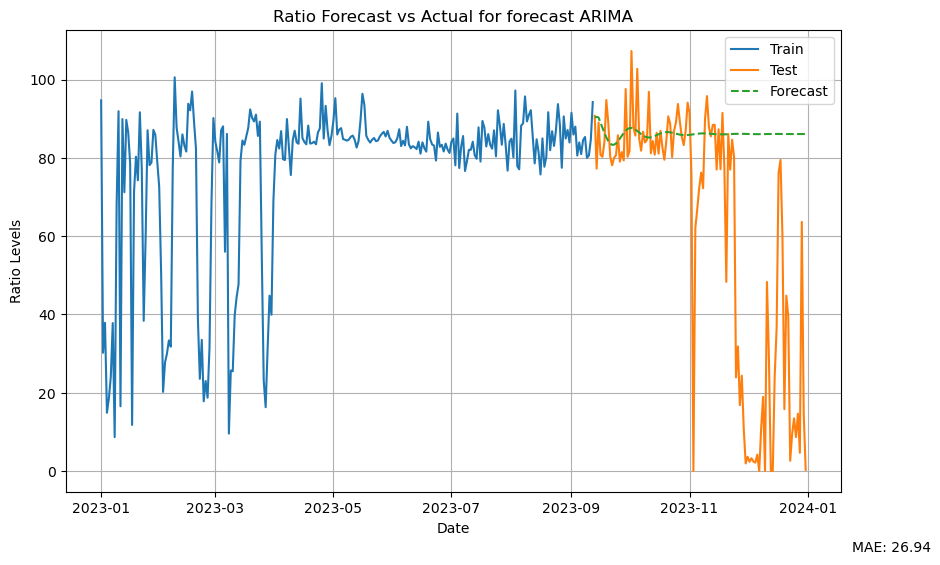

'Plot_ARIMA_MEAN/forecast_plot_forecast.png'

In [81]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import os

# Ensure the directory for saving plots exists
save_dir = "Plot_ARIMA_MEAN"
os.makedirs(save_dir, exist_ok=True)

def plot_forecast(train, test, forecast, key, show=True, save=False):
    identifier = key.split('_')[-1]  # Splits the key and takes the last part, which is the identifier
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train, label='Train')
    plt.plot(test.index, test, label='Test')
    plt.plot(forecast.index, forecast, label='Forecast', linestyle='--')
    plt.title(f'Ratio Forecast vs Actual for {identifier} ARIMA')
    plt.xlabel('Date')
    plt.ylabel('Ratio Levels')
    plt.legend()
    plt.grid(True)

    MAE = np.mean(np.abs(forecast_arima_mean - ratio_test["Ratio"]))

    print('Mean Absolute Error (MAE):', np.round(MAE, 2))
    plt.figtext(0.99, 0.01, f'MAE: {MAE:.2f}', horizontalalignment='right')

    if save:
        save_path = f'{save_dir}/forecast_plot_{identifier}.png'
        plt.savefig(save_path, format='png', dpi=300)
        print(f"Plot saved to {save_path}")

    if show:
        plt.show()
    else:
        plt.close()

    return save_path if save else None

# Example usage:
# Assuming ratio_train, ratio_test, and forecast_arima_mean are defined and valid pandas Series with datetime indices
plot_forecast(ratio_train, ratio_test, forecast_arima_mean, key="arima_ratio_forecast", show=True, save=True)

# Calculating and Printing Mean Absolute Error (MAE)


In [82]:
plant_keys = [
    'FBO0023', 'FSK0003', 'FSK0005', 'FSK0006', 'FSK0007', 'FSK0008',
    'MIC0001', 'SBO0001', 'SBO0002', 'SBO0005', 'SBO0007', 
     'SBO0011', 'SBO0012', 'SBO0013', 'SBO0014', 'SBO0015',
    'SBO0016', 'SBO0017', 'SBO0028',  'SBO0030', 'SGA0001'
]

datasets = [
    "train_ratio_fbo0023", "test_ratio_fbo0023",
    "train_ratio_fsk0003", "test_ratio_fsk0003",
    "train_ratio_fsk0005", "test_ratio_fsk0005",
    "train_ratio_fsk0006", "test_ratio_fsk0006",
    "train_ratio_fsk0007", "test_ratio_fsk0007",
    "train_ratio_fsk0008", "test_ratio_fsk0008",
    "train_ratio_mic0001", "test_ratio_mic0001",
    "train_ratio_sbo0001", "test_ratio_sbo0001",
    "train_ratio_sbo0002", "test_ratio_sbo0002",
    "train_ratio_sbo0005", "test_ratio_sbo0005",
    "train_ratio_sbo0007", "test_ratio_sbo0007",
    "train_ratio_sbo0011", "test_ratio_sbo0011",
    "train_ratio_sbo0012", "test_ratio_sbo0012",
    "train_ratio_sbo0013", "test_ratio_sbo0013",
    "train_ratio_sbo0014", "test_ratio_sbo0014",
    "train_ratio_sbo0015", "test_ratio_sbo0015",
    "train_ratio_sbo0016", "test_ratio_sbo0016",
    "train_ratio_sbo0017", "test_ratio_sbo0017",
    "train_ratio_sbo0028", "test_ratio_sbo0028",
    "train_ratio_sbo0030", "test_ratio_sbo0030",
    "train_ratio_sga0001", "test_ratio_sga0001"
]


# Initialize the dictionary with datasets
data_frames = {
    'train_ratio_fbo0023': train_ratio_fbo0023,
    'train_ratio_fsk0003': train_ratio_fsk0003,
    'train_ratio_fsk0005': train_ratio_fsk0005,
    'train_ratio_fsk0006': train_ratio_fsk0006,
    'train_ratio_fsk0007': train_ratio_fsk0007,
    'train_ratio_fsk0008': train_ratio_fsk0008,
    'train_ratio_mic0001': train_ratio_mic0001,
    'train_ratio_sbo0001': train_ratio_sbo0001,
    'train_ratio_sbo0002': train_ratio_sbo0002,
    'train_ratio_sbo0005': train_ratio_sbo0005,
    'train_ratio_sbo0007': train_ratio_sbo0007,
    'train_ratio_sbo0011': train_ratio_sbo0011,
    'train_ratio_sbo0012': train_ratio_sbo0012,
    'train_ratio_sbo0013': train_ratio_sbo0013,
    'train_ratio_sbo0014': train_ratio_sbo0014,
    'train_ratio_sbo0015': train_ratio_sbo0015,
    'train_ratio_sbo0016': train_ratio_sbo0016,
    'train_ratio_sbo0017': train_ratio_sbo0017,
    'train_ratio_sbo0028': train_ratio_sbo0028,
    'train_ratio_sbo0030': train_ratio_sbo0030,
    'train_ratio_sga0001': train_ratio_sga0001,
}


# Checking stationarity
adf_result = adfuller(train_fbo0023["Ratio"])  # Applying Augmented Dickey-Fuller test to check stationarity
#print(adf_result)



train.to_csv(f'{plantkey}_train.csv')

from statsmodels.tsa.stattools import adfuller

# Function to perform the ADF test
# Function to perform the ADF test
# Function to perform the ADF test
def adf_test(series, title=''):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic for {title}: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is non-stationary")
    return result[1]

# Checking stationarity and differencing if needed
for key, df in data_frames.items():
    if 'Ratio' in df.columns:
        print(f"Testing stationarity for {key}...")
        p_value = adf_test(df['Ratio'], title=key)

        if p_value > 0.05:
            print(f"Data in {key} is non-stationary, differencing...")
            df['Ratio'] = df['Ratio'].diff()  # Differencing
            df.dropna(inplace=True)
            if not df['Ratio'].empty:  # Check if the DataFrame is not empty after dropping NaN
                p_value = adf_test(df['Ratio'], title=f"{key} after differencing")
                print(f"New p-value for {key} after differencing: {p_value}")
            else:
                print(f"No data left in {key} after differencing and dropping NaNs.")

        #df.to_csv(f'{key}.csv')













Testing stationarity for train_ratio_fbo0023...
ADF Statistic for train_ratio_fbo0023: -4.956898181588217
p-value: 2.6991187608390638e-05
Data is stationary
Testing stationarity for train_ratio_fsk0003...
ADF Statistic for train_ratio_fsk0003: -5.165390978687903
p-value: 1.0341082307570495e-05
Data is stationary
Testing stationarity for train_ratio_fsk0005...
ADF Statistic for train_ratio_fsk0005: -2.576241152258885
p-value: 0.0980078315170625
Data is non-stationary
Data in train_ratio_fsk0005 is non-stationary, differencing...
ADF Statistic for train_ratio_fsk0005 after differencing: -5.768004079035736
p-value: 5.475177313291906e-07
Data is stationary
New p-value for train_ratio_fsk0005 after differencing: 5.475177313291906e-07
Testing stationarity for train_ratio_fsk0006...
ADF Statistic for train_ratio_fsk0006: -5.4016348641595355
p-value: 3.3605255444564798e-06
Data is stationary
Testing stationarity for train_ratio_fsk0007...
ADF Statistic for train_ratio_fsk0007: -3.2662082662700

In [83]:
print(test_ratio_fbo0023)

                 Ratio
ValueTime             
2023-09-01   96.042224
2023-09-02   94.718512
2023-09-03   90.694064
2023-09-04   87.669861
2023-09-05   83.668607
2023-09-06   82.371296
2023-09-07   90.926666
2023-09-08   88.889390
2023-09-09   82.718394
2023-09-10   87.133688
2023-09-11   75.708590
2023-09-12   94.892333
2023-09-13   88.364100
2023-09-14   77.126135
2023-09-15   93.262805
2023-09-16   77.602320
2023-09-17   79.377341
2023-09-18   90.923302
2023-09-19   63.250063
2023-09-20   74.635518
2023-09-21   87.040349
2023-09-22   88.016620
2023-09-23   83.794274
2023-09-24   82.216453
2023-09-25   82.438815
2023-09-26   70.037709
2023-09-27   83.589037
2023-09-28   83.407950
2023-09-29   71.636674
2023-09-30   77.122973
2023-10-01   82.861686
2023-10-02   83.359980
2023-10-03   81.503064
2023-10-04   83.834803
2023-10-05   85.523341
2023-10-06   84.714759
2023-10-07   79.968094
2023-10-08   85.084694
2023-10-09   80.586372
2023-10-10   78.426747
2023-10-11   93.197830
2023-10-12 

In [84]:
print(train_ratio_fbo0023)


                 Ratio
ValueTime             
2023-01-01   96.956513
2023-01-02    0.000000
2023-01-03   87.450395
2023-01-04    0.000000
2023-01-05    0.000000
2023-01-06   63.392850
2023-01-07    0.000000
2023-01-08    0.000000
2023-01-09    0.000000
2023-01-10  186.289509
2023-01-11    0.000000
2023-01-12    0.000000
2023-01-13   80.977175
2023-01-14    0.000000
2023-01-15  115.304053
2023-01-16  105.260100
2023-01-17    0.000000
2023-01-18   59.701184
2023-01-19   79.522689
2023-01-20   76.500718
2023-01-21  183.776457
2023-01-22   82.517572
2023-01-23   74.698822
2023-01-24    0.000000
2023-01-25   62.784883
2023-01-26   77.244928
2023-01-27   71.896555
2023-01-28   64.938475
2023-01-29   76.560454
2023-01-30   68.074551
2023-01-31   77.269548
2023-02-01   74.360383
2023-02-02   62.206521
2023-02-03   73.023464
2023-02-04   77.555955
2023-02-05   82.690324
2023-02-06   79.544720
2023-02-07    0.000000
2023-02-08  112.173934
2023-02-09   98.219273
2023-02-10   80.109726
2023-02-11 

Processing train_ratio_fbo0023
                 Ratio
ValueTime             
2023-01-01  108.178257
2023-01-02    0.000000
2023-01-03    9.978045
2023-01-04   32.128787
2023-01-05   50.575317
2023-01-06    4.605181
2023-01-07    8.807069
2023-01-08    0.000000
2023-01-09    0.000000
2023-01-10    0.000000
2023-01-11    0.000000
2023-01-12  106.992334
2023-01-13   57.965087
2023-01-14  182.856779
2023-01-15   90.975664
2023-01-16   43.042781
2023-01-17    0.000000
2023-01-18   32.384997
2023-01-19   37.412414
2023-01-20   73.468169
2023-01-21  114.144911
2023-01-22   96.106932
2023-01-23   85.869718
2023-01-24    0.000000
2023-01-25   90.006175
2023-01-26   45.923925
2023-01-27   39.016470
2023-01-28   55.511896
2023-01-29   71.218497
2023-01-30   45.928380
2023-01-31   43.149328
2023-02-01   85.655614
2023-02-02   21.941792
2023-02-03   43.151259
2023-02-04   43.881162
2023-02-05   72.091712
2023-02-06   39.282238
2023-02-07  107.449262
2023-02-08   92.691127
2023-02-09   83.652218
202

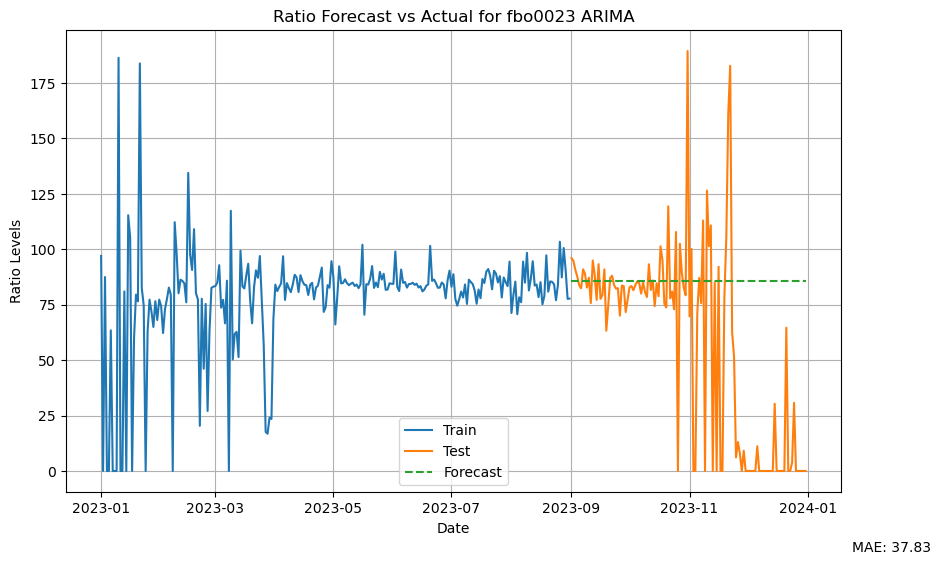

Processing train_ratio_fsk0003
                 Ratio
ValueTime             
2023-01-01  108.178257
2023-01-02    0.000000
2023-01-03    9.978045
2023-01-04   32.128787
2023-01-05   50.575317
2023-01-06    4.605181
2023-01-07    8.807069
2023-01-08    0.000000
2023-01-09    0.000000
2023-01-10    0.000000
2023-01-11    0.000000
2023-01-12  106.992334
2023-01-13   57.965087
2023-01-14  182.856779
2023-01-15   90.975664
2023-01-16   43.042781
2023-01-17    0.000000
2023-01-18   32.384997
2023-01-19   37.412414
2023-01-20   73.468169
2023-01-21  114.144911
2023-01-22   96.106932
2023-01-23   85.869718
2023-01-24    0.000000
2023-01-25   90.006175
2023-01-26   45.923925
2023-01-27   39.016470
2023-01-28   55.511896
2023-01-29   71.218497
2023-01-30   45.928380
2023-01-31   43.149328
2023-02-01   85.655614
2023-02-02   21.941792
2023-02-03   43.151259
2023-02-04   43.881162
2023-02-05   72.091712
2023-02-06   39.282238
2023-02-07  107.449262
2023-02-08   92.691127
2023-02-09   83.652218
202

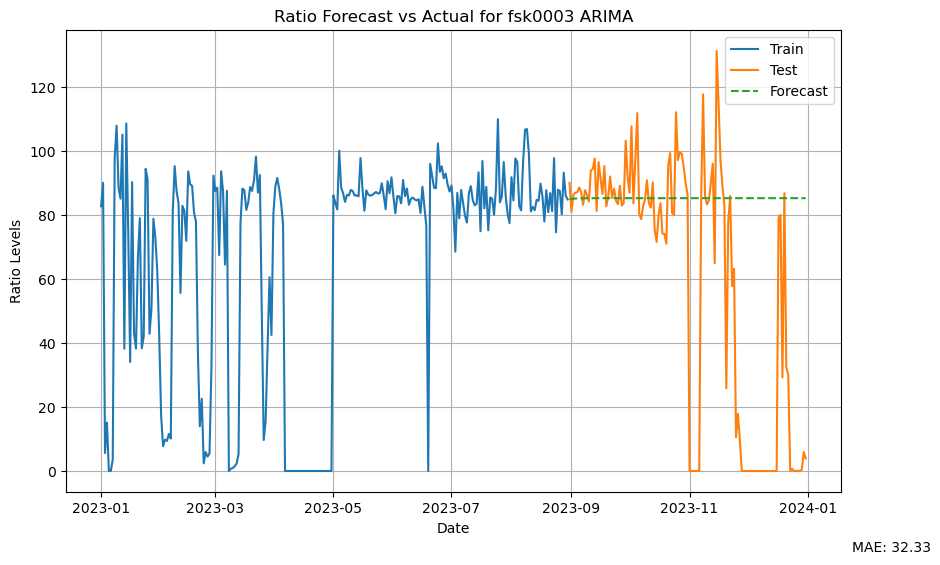

Processing train_ratio_fsk0005
                 Ratio
ValueTime             
2023-01-01  108.178257
2023-01-02    0.000000
2023-01-03    9.978045
2023-01-04   32.128787
2023-01-05   50.575317
2023-01-06    4.605181
2023-01-07    8.807069
2023-01-08    0.000000
2023-01-09    0.000000
2023-01-10    0.000000
2023-01-11    0.000000
2023-01-12  106.992334
2023-01-13   57.965087
2023-01-14  182.856779
2023-01-15   90.975664
2023-01-16   43.042781
2023-01-17    0.000000
2023-01-18   32.384997
2023-01-19   37.412414
2023-01-20   73.468169
2023-01-21  114.144911
2023-01-22   96.106932
2023-01-23   85.869718
2023-01-24    0.000000
2023-01-25   90.006175
2023-01-26   45.923925
2023-01-27   39.016470
2023-01-28   55.511896
2023-01-29   71.218497
2023-01-30   45.928380
2023-01-31   43.149328
2023-02-01   85.655614
2023-02-02   21.941792
2023-02-03   43.151259
2023-02-04   43.881162
2023-02-05   72.091712
2023-02-06   39.282238
2023-02-07  107.449262
2023-02-08   92.691127
2023-02-09   83.652218
202

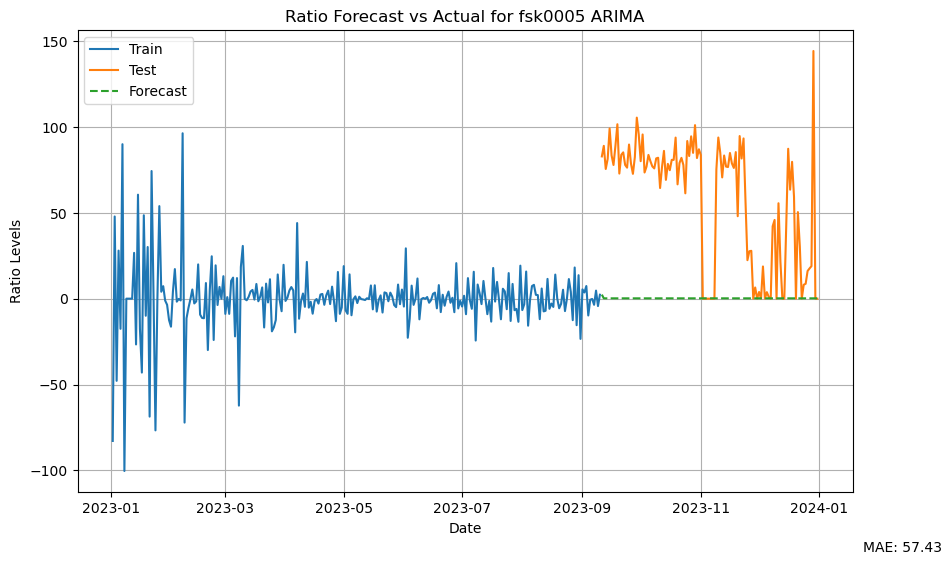

Processing train_ratio_fsk0006
                 Ratio
ValueTime             
2023-01-01  108.178257
2023-01-02    0.000000
2023-01-03    9.978045
2023-01-04   32.128787
2023-01-05   50.575317
2023-01-06    4.605181
2023-01-07    8.807069
2023-01-08    0.000000
2023-01-09    0.000000
2023-01-10    0.000000
2023-01-11    0.000000
2023-01-12  106.992334
2023-01-13   57.965087
2023-01-14  182.856779
2023-01-15   90.975664
2023-01-16   43.042781
2023-01-17    0.000000
2023-01-18   32.384997
2023-01-19   37.412414
2023-01-20   73.468169
2023-01-21  114.144911
2023-01-22   96.106932
2023-01-23   85.869718
2023-01-24    0.000000
2023-01-25   90.006175
2023-01-26   45.923925
2023-01-27   39.016470
2023-01-28   55.511896
2023-01-29   71.218497
2023-01-30   45.928380
2023-01-31   43.149328
2023-02-01   85.655614
2023-02-02   21.941792
2023-02-03   43.151259
2023-02-04   43.881162
2023-02-05   72.091712
2023-02-06   39.282238
2023-02-07  107.449262
2023-02-08   92.691127
2023-02-09   83.652218
202

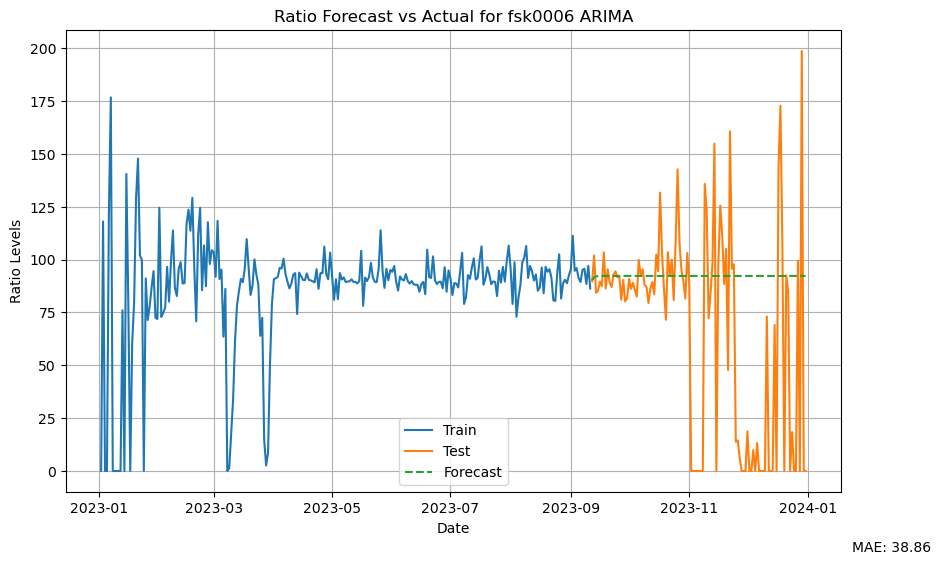

Processing train_ratio_fsk0007
                 Ratio
ValueTime             
2023-01-01  108.178257
2023-01-02    0.000000
2023-01-03    9.978045
2023-01-04   32.128787
2023-01-05   50.575317
2023-01-06    4.605181
2023-01-07    8.807069
2023-01-08    0.000000
2023-01-09    0.000000
2023-01-10    0.000000
2023-01-11    0.000000
2023-01-12  106.992334
2023-01-13   57.965087
2023-01-14  182.856779
2023-01-15   90.975664
2023-01-16   43.042781
2023-01-17    0.000000
2023-01-18   32.384997
2023-01-19   37.412414
2023-01-20   73.468169
2023-01-21  114.144911
2023-01-22   96.106932
2023-01-23   85.869718
2023-01-24    0.000000
2023-01-25   90.006175
2023-01-26   45.923925
2023-01-27   39.016470
2023-01-28   55.511896
2023-01-29   71.218497
2023-01-30   45.928380
2023-01-31   43.149328
2023-02-01   85.655614
2023-02-02   21.941792
2023-02-03   43.151259
2023-02-04   43.881162
2023-02-05   72.091712
2023-02-06   39.282238
2023-02-07  107.449262
2023-02-08   92.691127
2023-02-09   83.652218
202

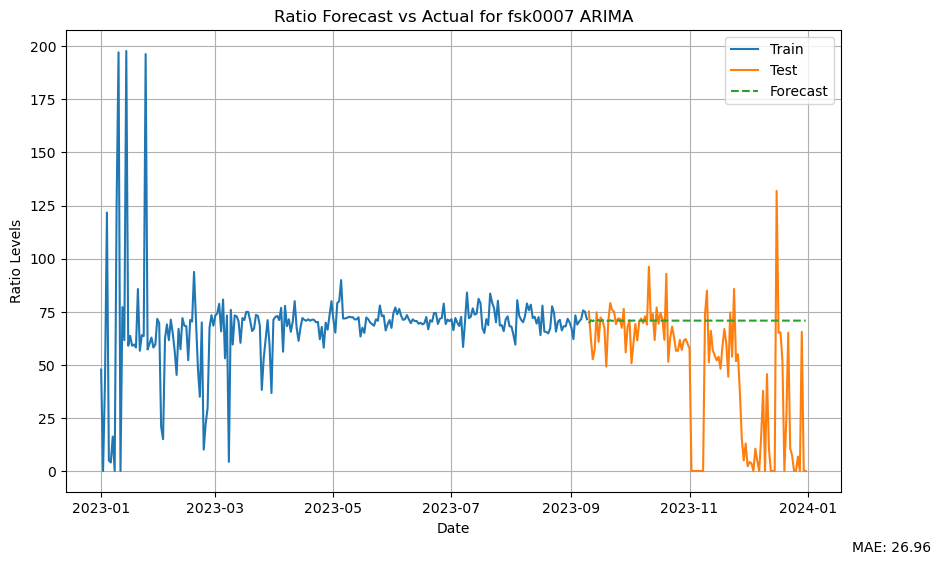

Processing train_ratio_fsk0008
                 Ratio
ValueTime             
2023-01-01  108.178257
2023-01-02    0.000000
2023-01-03    9.978045
2023-01-04   32.128787
2023-01-05   50.575317
2023-01-06    4.605181
2023-01-07    8.807069
2023-01-08    0.000000
2023-01-09    0.000000
2023-01-10    0.000000
2023-01-11    0.000000
2023-01-12  106.992334
2023-01-13   57.965087
2023-01-14  182.856779
2023-01-15   90.975664
2023-01-16   43.042781
2023-01-17    0.000000
2023-01-18   32.384997
2023-01-19   37.412414
2023-01-20   73.468169
2023-01-21  114.144911
2023-01-22   96.106932
2023-01-23   85.869718
2023-01-24    0.000000
2023-01-25   90.006175
2023-01-26   45.923925
2023-01-27   39.016470
2023-01-28   55.511896
2023-01-29   71.218497
2023-01-30   45.928380
2023-01-31   43.149328
2023-02-01   85.655614
2023-02-02   21.941792
2023-02-03   43.151259
2023-02-04   43.881162
2023-02-05   72.091712
2023-02-06   39.282238
2023-02-07  107.449262
2023-02-08   92.691127
2023-02-09   83.652218
202

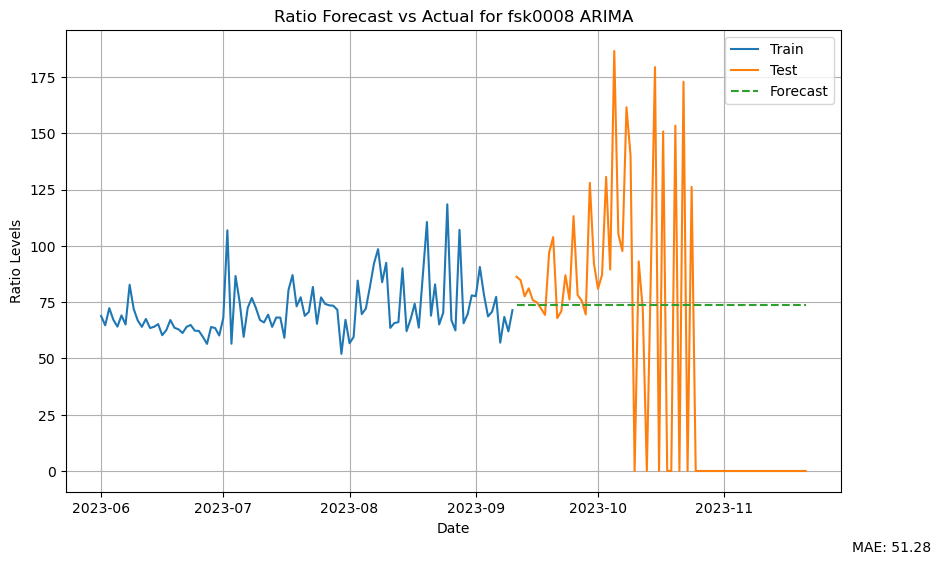

Processing train_ratio_mic0001
                 Ratio
ValueTime             
2023-01-01  108.178257
2023-01-02    0.000000
2023-01-03    9.978045
2023-01-04   32.128787
2023-01-05   50.575317
2023-01-06    4.605181
2023-01-07    8.807069
2023-01-08    0.000000
2023-01-09    0.000000
2023-01-10    0.000000
2023-01-11    0.000000
2023-01-12  106.992334
2023-01-13   57.965087
2023-01-14  182.856779
2023-01-15   90.975664
2023-01-16   43.042781
2023-01-17    0.000000
2023-01-18   32.384997
2023-01-19   37.412414
2023-01-20   73.468169
2023-01-21  114.144911
2023-01-22   96.106932
2023-01-23   85.869718
2023-01-24    0.000000
2023-01-25   90.006175
2023-01-26   45.923925
2023-01-27   39.016470
2023-01-28   55.511896
2023-01-29   71.218497
2023-01-30   45.928380
2023-01-31   43.149328
2023-02-01   85.655614
2023-02-02   21.941792
2023-02-03   43.151259
2023-02-04   43.881162
2023-02-05   72.091712
2023-02-06   39.282238
2023-02-07  107.449262
2023-02-08   92.691127
2023-02-09   83.652218
202

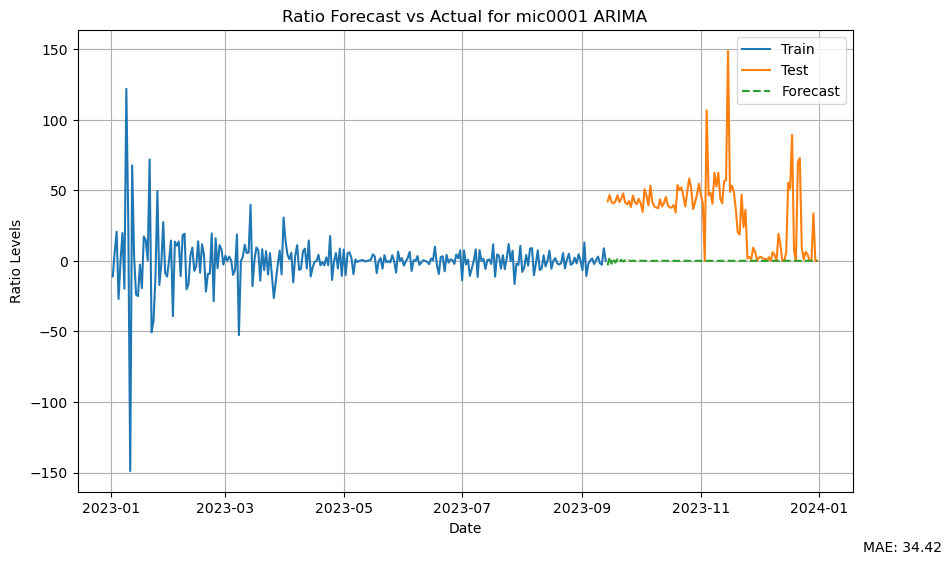

Processing train_ratio_sbo0001
                 Ratio
ValueTime             
2023-01-01  108.178257
2023-01-02    0.000000
2023-01-03    9.978045
2023-01-04   32.128787
2023-01-05   50.575317
2023-01-06    4.605181
2023-01-07    8.807069
2023-01-08    0.000000
2023-01-09    0.000000
2023-01-10    0.000000
2023-01-11    0.000000
2023-01-12  106.992334
2023-01-13   57.965087
2023-01-14  182.856779
2023-01-15   90.975664
2023-01-16   43.042781
2023-01-17    0.000000
2023-01-18   32.384997
2023-01-19   37.412414
2023-01-20   73.468169
2023-01-21  114.144911
2023-01-22   96.106932
2023-01-23   85.869718
2023-01-24    0.000000
2023-01-25   90.006175
2023-01-26   45.923925
2023-01-27   39.016470
2023-01-28   55.511896
2023-01-29   71.218497
2023-01-30   45.928380
2023-01-31   43.149328
2023-02-01   85.655614
2023-02-02   21.941792
2023-02-03   43.151259
2023-02-04   43.881162
2023-02-05   72.091712
2023-02-06   39.282238
2023-02-07  107.449262
2023-02-08   92.691127
2023-02-09   83.652218
202

C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Processing test test_ratio_sbo0001
Mean Absolute Error (MAE): 66.05


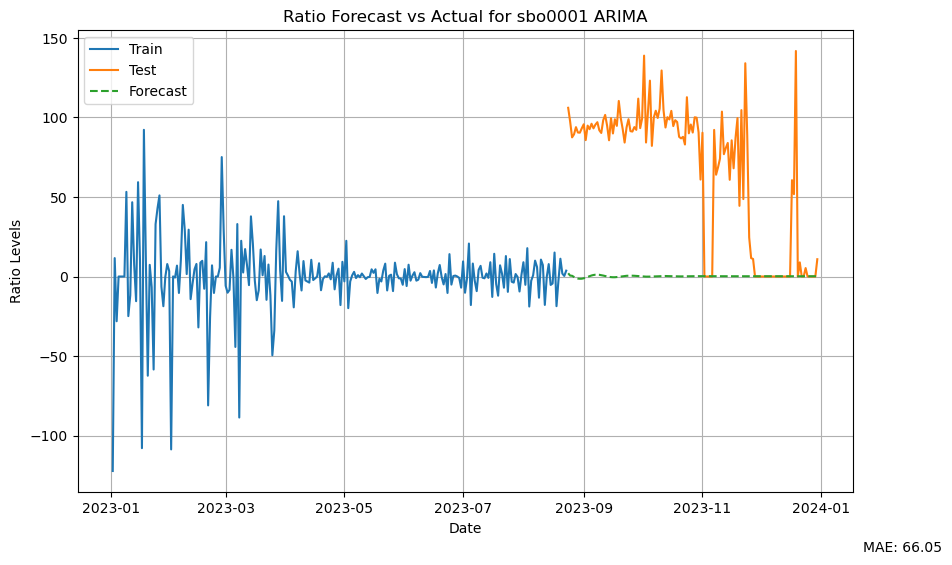

Processing train_ratio_sbo0002
                 Ratio
ValueTime             
2023-01-01  108.178257
2023-01-02    0.000000
2023-01-03    9.978045
2023-01-04   32.128787
2023-01-05   50.575317
2023-01-06    4.605181
2023-01-07    8.807069
2023-01-08    0.000000
2023-01-09    0.000000
2023-01-10    0.000000
2023-01-11    0.000000
2023-01-12  106.992334
2023-01-13   57.965087
2023-01-14  182.856779
2023-01-15   90.975664
2023-01-16   43.042781
2023-01-17    0.000000
2023-01-18   32.384997
2023-01-19   37.412414
2023-01-20   73.468169
2023-01-21  114.144911
2023-01-22   96.106932
2023-01-23   85.869718
2023-01-24    0.000000
2023-01-25   90.006175
2023-01-26   45.923925
2023-01-27   39.016470
2023-01-28   55.511896
2023-01-29   71.218497
2023-01-30   45.928380
2023-01-31   43.149328
2023-02-01   85.655614
2023-02-02   21.941792
2023-02-03   43.151259
2023-02-04   43.881162
2023-02-05   72.091712
2023-02-06   39.282238
2023-02-07  107.449262
2023-02-08   92.691127
2023-02-09   83.652218
202

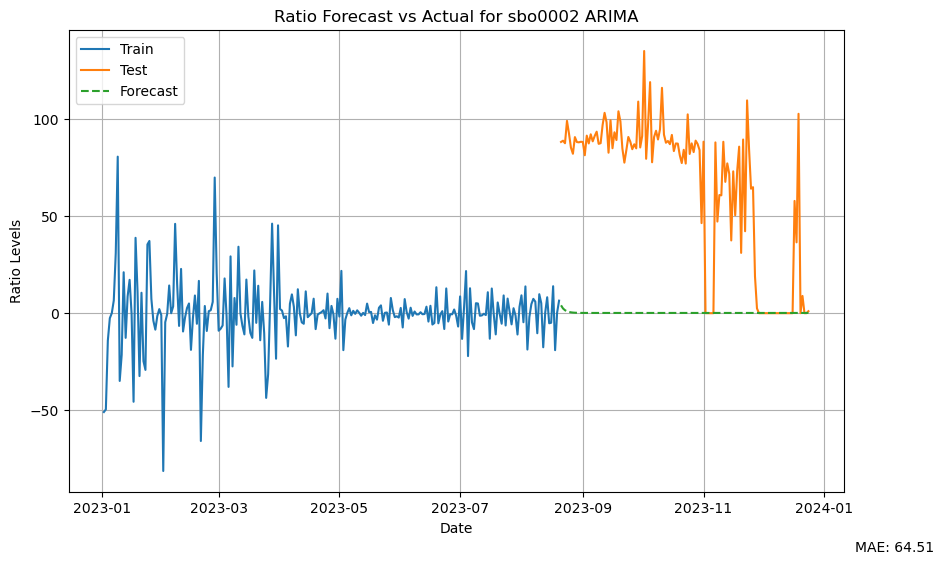

Processing train_ratio_sbo0005
                 Ratio
ValueTime             
2023-01-01  108.178257
2023-01-02    0.000000
2023-01-03    9.978045
2023-01-04   32.128787
2023-01-05   50.575317
2023-01-06    4.605181
2023-01-07    8.807069
2023-01-08    0.000000
2023-01-09    0.000000
2023-01-10    0.000000
2023-01-11    0.000000
2023-01-12  106.992334
2023-01-13   57.965087
2023-01-14  182.856779
2023-01-15   90.975664
2023-01-16   43.042781
2023-01-17    0.000000
2023-01-18   32.384997
2023-01-19   37.412414
2023-01-20   73.468169
2023-01-21  114.144911
2023-01-22   96.106932
2023-01-23   85.869718
2023-01-24    0.000000
2023-01-25   90.006175
2023-01-26   45.923925
2023-01-27   39.016470
2023-01-28   55.511896
2023-01-29   71.218497
2023-01-30   45.928380
2023-01-31   43.149328
2023-02-01   85.655614
2023-02-02   21.941792
2023-02-03   43.151259
2023-02-04   43.881162
2023-02-05   72.091712
2023-02-06   39.282238
2023-02-07  107.449262
2023-02-08   92.691127
2023-02-09   83.652218
202

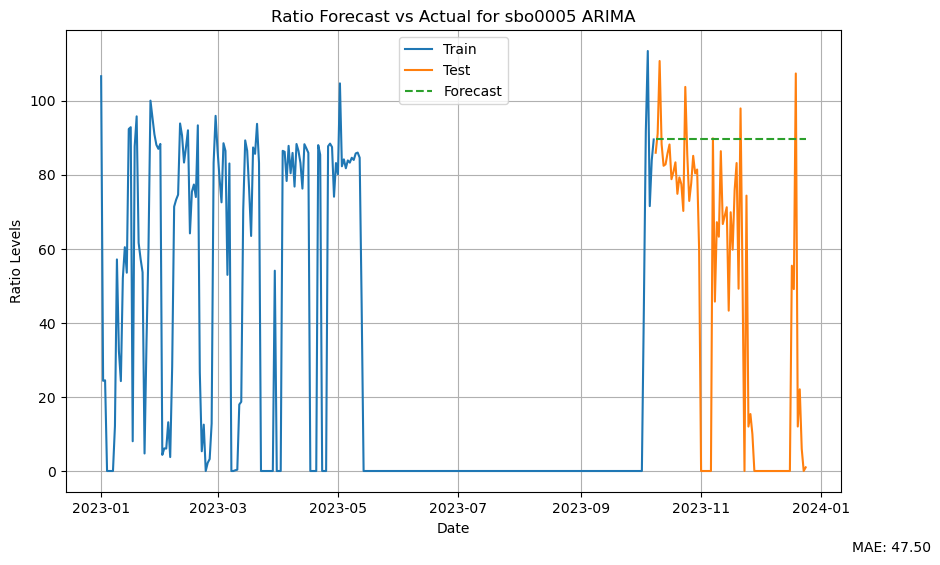

Processing train_ratio_sbo0007
                 Ratio
ValueTime             
2023-01-01  108.178257
2023-01-02    0.000000
2023-01-03    9.978045
2023-01-04   32.128787
2023-01-05   50.575317
2023-01-06    4.605181
2023-01-07    8.807069
2023-01-08    0.000000
2023-01-09    0.000000
2023-01-10    0.000000
2023-01-11    0.000000
2023-01-12  106.992334
2023-01-13   57.965087
2023-01-14  182.856779
2023-01-15   90.975664
2023-01-16   43.042781
2023-01-17    0.000000
2023-01-18   32.384997
2023-01-19   37.412414
2023-01-20   73.468169
2023-01-21  114.144911
2023-01-22   96.106932
2023-01-23   85.869718
2023-01-24    0.000000
2023-01-25   90.006175
2023-01-26   45.923925
2023-01-27   39.016470
2023-01-28   55.511896
2023-01-29   71.218497
2023-01-30   45.928380
2023-01-31   43.149328
2023-02-01   85.655614
2023-02-02   21.941792
2023-02-03   43.151259
2023-02-04   43.881162
2023-02-05   72.091712
2023-02-06   39.282238
2023-02-07  107.449262
2023-02-08   92.691127
2023-02-09   83.652218
202

C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Processing test test_ratio_sbo0007
Mean Absolute Error (MAE): 66.42


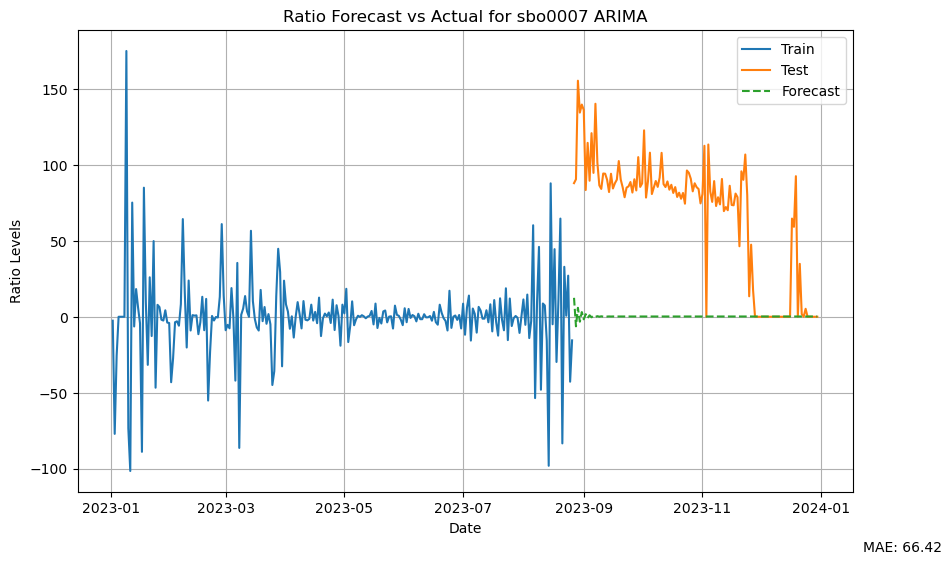

Processing train_ratio_sbo0011
                 Ratio
ValueTime             
2023-01-01  108.178257
2023-01-02    0.000000
2023-01-03    9.978045
2023-01-04   32.128787
2023-01-05   50.575317
2023-01-06    4.605181
2023-01-07    8.807069
2023-01-08    0.000000
2023-01-09    0.000000
2023-01-10    0.000000
2023-01-11    0.000000
2023-01-12  106.992334
2023-01-13   57.965087
2023-01-14  182.856779
2023-01-15   90.975664
2023-01-16   43.042781
2023-01-17    0.000000
2023-01-18   32.384997
2023-01-19   37.412414
2023-01-20   73.468169
2023-01-21  114.144911
2023-01-22   96.106932
2023-01-23   85.869718
2023-01-24    0.000000
2023-01-25   90.006175
2023-01-26   45.923925
2023-01-27   39.016470
2023-01-28   55.511896
2023-01-29   71.218497
2023-01-30   45.928380
2023-01-31   43.149328
2023-02-01   85.655614
2023-02-02   21.941792
2023-02-03   43.151259
2023-02-04   43.881162
2023-02-05   72.091712
2023-02-06   39.282238
2023-02-07  107.449262
2023-02-08   92.691127
2023-02-09   83.652218
202

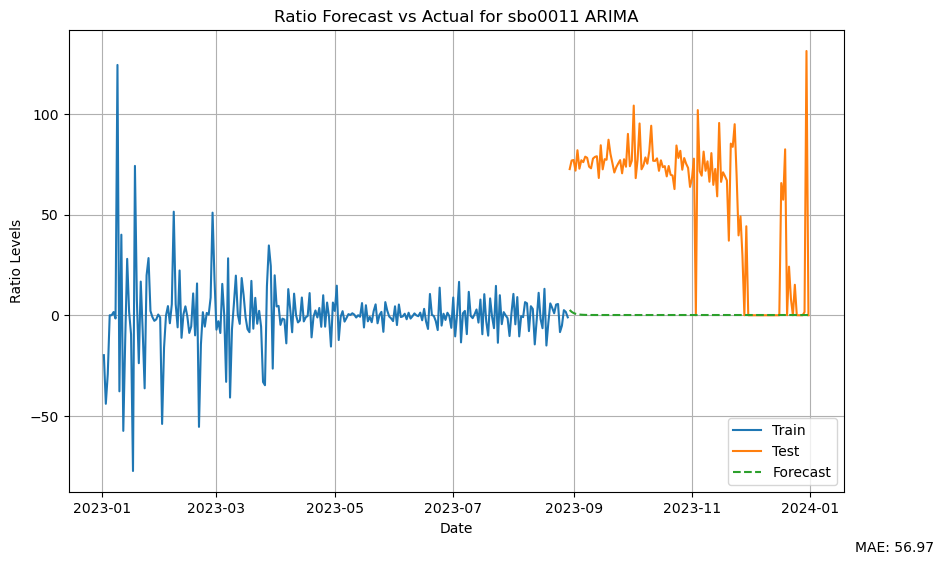

Processing train_ratio_sbo0012
                 Ratio
ValueTime             
2023-01-01  108.178257
2023-01-02    0.000000
2023-01-03    9.978045
2023-01-04   32.128787
2023-01-05   50.575317
2023-01-06    4.605181
2023-01-07    8.807069
2023-01-08    0.000000
2023-01-09    0.000000
2023-01-10    0.000000
2023-01-11    0.000000
2023-01-12  106.992334
2023-01-13   57.965087
2023-01-14  182.856779
2023-01-15   90.975664
2023-01-16   43.042781
2023-01-17    0.000000
2023-01-18   32.384997
2023-01-19   37.412414
2023-01-20   73.468169
2023-01-21  114.144911
2023-01-22   96.106932
2023-01-23   85.869718
2023-01-24    0.000000
2023-01-25   90.006175
2023-01-26   45.923925
2023-01-27   39.016470
2023-01-28   55.511896
2023-01-29   71.218497
2023-01-30   45.928380
2023-01-31   43.149328
2023-02-01   85.655614
2023-02-02   21.941792
2023-02-03   43.151259
2023-02-04   43.881162
2023-02-05   72.091712
2023-02-06   39.282238
2023-02-07  107.449262
2023-02-08   92.691127
2023-02-09   83.652218
202

C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Processing test test_ratio_sbo0012
Mean Absolute Error (MAE): 80.9


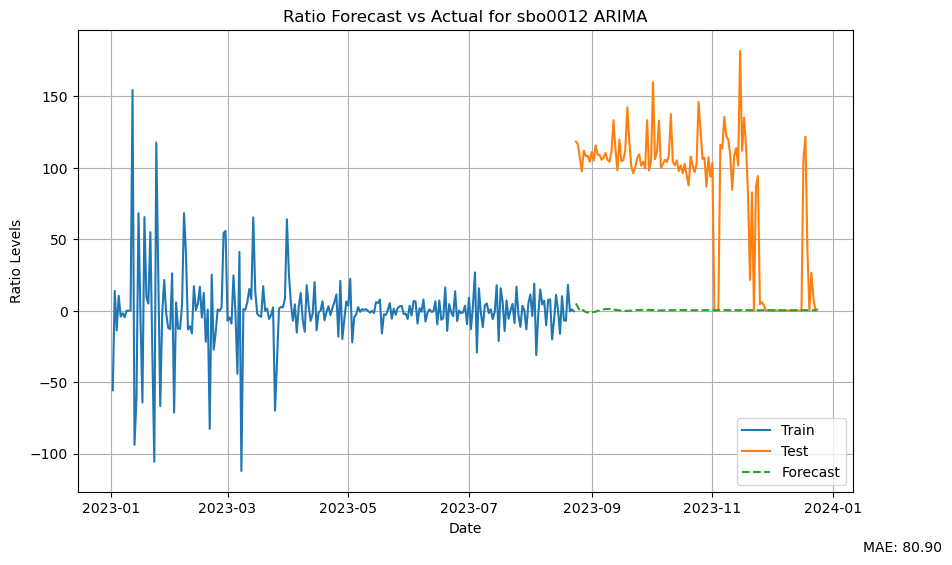

Processing train_ratio_sbo0013
                 Ratio
ValueTime             
2023-01-01  108.178257
2023-01-02    0.000000
2023-01-03    9.978045
2023-01-04   32.128787
2023-01-05   50.575317
2023-01-06    4.605181
2023-01-07    8.807069
2023-01-08    0.000000
2023-01-09    0.000000
2023-01-10    0.000000
2023-01-11    0.000000
2023-01-12  106.992334
2023-01-13   57.965087
2023-01-14  182.856779
2023-01-15   90.975664
2023-01-16   43.042781
2023-01-17    0.000000
2023-01-18   32.384997
2023-01-19   37.412414
2023-01-20   73.468169
2023-01-21  114.144911
2023-01-22   96.106932
2023-01-23   85.869718
2023-01-24    0.000000
2023-01-25   90.006175
2023-01-26   45.923925
2023-01-27   39.016470
2023-01-28   55.511896
2023-01-29   71.218497
2023-01-30   45.928380
2023-01-31   43.149328
2023-02-01   85.655614
2023-02-02   21.941792
2023-02-03   43.151259
2023-02-04   43.881162
2023-02-05   72.091712
2023-02-06   39.282238
2023-02-07  107.449262
2023-02-08   92.691127
2023-02-09   83.652218
202

C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Processing test test_ratio_sbo0013
Mean Absolute Error (MAE): 64.94


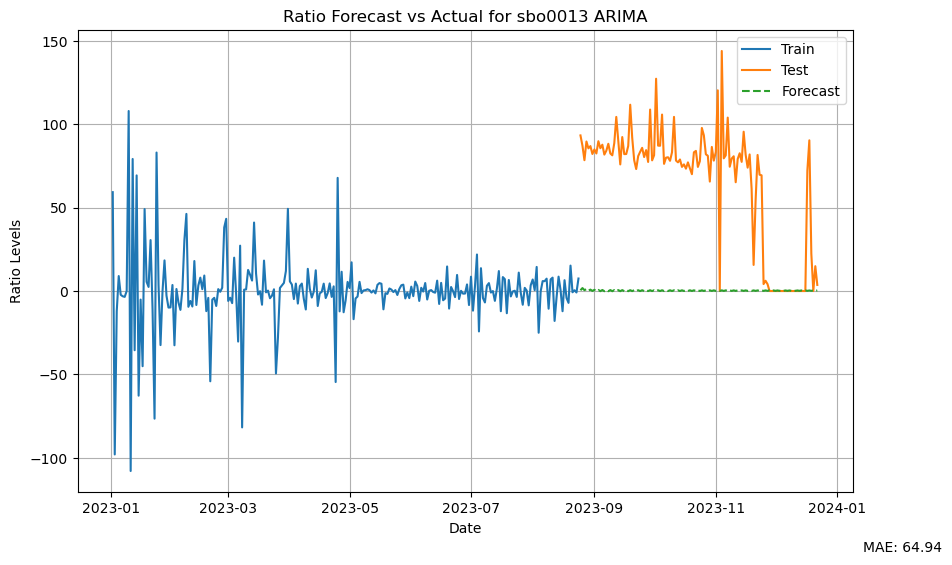

Processing train_ratio_sbo0014
                 Ratio
ValueTime             
2023-01-01  108.178257
2023-01-02    0.000000
2023-01-03    9.978045
2023-01-04   32.128787
2023-01-05   50.575317
2023-01-06    4.605181
2023-01-07    8.807069
2023-01-08    0.000000
2023-01-09    0.000000
2023-01-10    0.000000
2023-01-11    0.000000
2023-01-12  106.992334
2023-01-13   57.965087
2023-01-14  182.856779
2023-01-15   90.975664
2023-01-16   43.042781
2023-01-17    0.000000
2023-01-18   32.384997
2023-01-19   37.412414
2023-01-20   73.468169
2023-01-21  114.144911
2023-01-22   96.106932
2023-01-23   85.869718
2023-01-24    0.000000
2023-01-25   90.006175
2023-01-26   45.923925
2023-01-27   39.016470
2023-01-28   55.511896
2023-01-29   71.218497
2023-01-30   45.928380
2023-01-31   43.149328
2023-02-01   85.655614
2023-02-02   21.941792
2023-02-03   43.151259
2023-02-04   43.881162
2023-02-05   72.091712
2023-02-06   39.282238
2023-02-07  107.449262
2023-02-08   92.691127
2023-02-09   83.652218
202

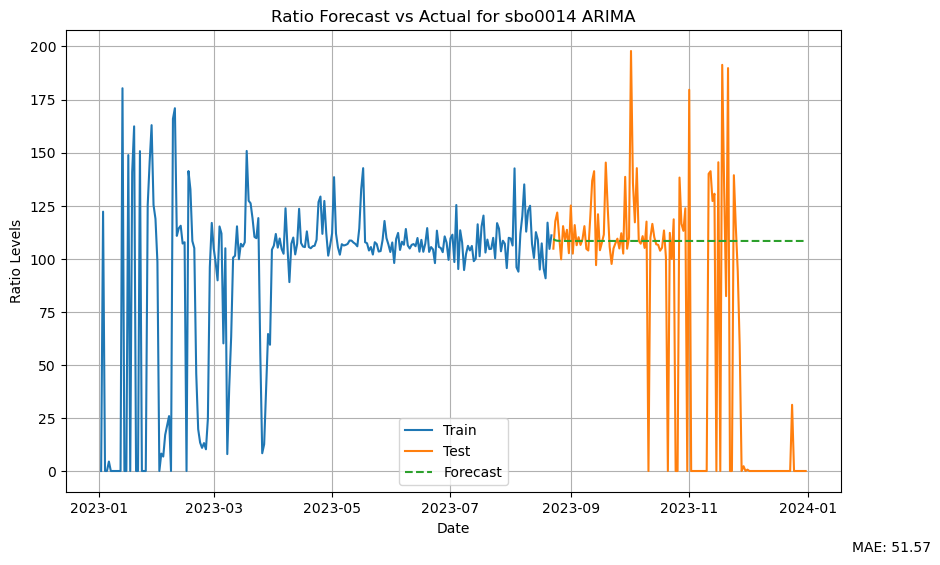

Processing train_ratio_sbo0015
                 Ratio
ValueTime             
2023-01-01  108.178257
2023-01-02    0.000000
2023-01-03    9.978045
2023-01-04   32.128787
2023-01-05   50.575317
2023-01-06    4.605181
2023-01-07    8.807069
2023-01-08    0.000000
2023-01-09    0.000000
2023-01-10    0.000000
2023-01-11    0.000000
2023-01-12  106.992334
2023-01-13   57.965087
2023-01-14  182.856779
2023-01-15   90.975664
2023-01-16   43.042781
2023-01-17    0.000000
2023-01-18   32.384997
2023-01-19   37.412414
2023-01-20   73.468169
2023-01-21  114.144911
2023-01-22   96.106932
2023-01-23   85.869718
2023-01-24    0.000000
2023-01-25   90.006175
2023-01-26   45.923925
2023-01-27   39.016470
2023-01-28   55.511896
2023-01-29   71.218497
2023-01-30   45.928380
2023-01-31   43.149328
2023-02-01   85.655614
2023-02-02   21.941792
2023-02-03   43.151259
2023-02-04   43.881162
2023-02-05   72.091712
2023-02-06   39.282238
2023-02-07  107.449262
2023-02-08   92.691127
2023-02-09   83.652218
202

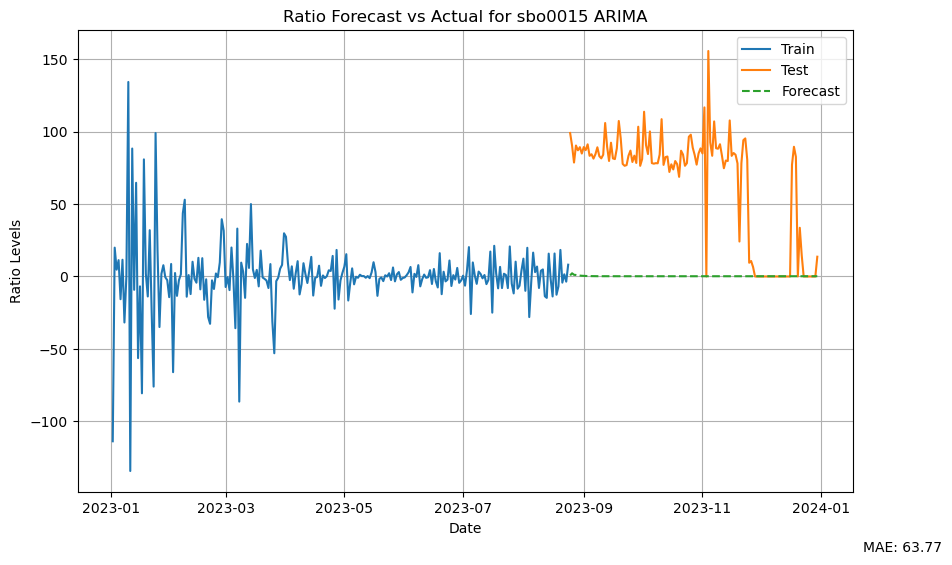

Processing train_ratio_sbo0016
                 Ratio
ValueTime             
2023-01-01  108.178257
2023-01-02    0.000000
2023-01-03    9.978045
2023-01-04   32.128787
2023-01-05   50.575317
2023-01-06    4.605181
2023-01-07    8.807069
2023-01-08    0.000000
2023-01-09    0.000000
2023-01-10    0.000000
2023-01-11    0.000000
2023-01-12  106.992334
2023-01-13   57.965087
2023-01-14  182.856779
2023-01-15   90.975664
2023-01-16   43.042781
2023-01-17    0.000000
2023-01-18   32.384997
2023-01-19   37.412414
2023-01-20   73.468169
2023-01-21  114.144911
2023-01-22   96.106932
2023-01-23   85.869718
2023-01-24    0.000000
2023-01-25   90.006175
2023-01-26   45.923925
2023-01-27   39.016470
2023-01-28   55.511896
2023-01-29   71.218497
2023-01-30   45.928380
2023-01-31   43.149328
2023-02-01   85.655614
2023-02-02   21.941792
2023-02-03   43.151259
2023-02-04   43.881162
2023-02-05   72.091712
2023-02-06   39.282238
2023-02-07  107.449262
2023-02-08   92.691127
2023-02-09   83.652218
202

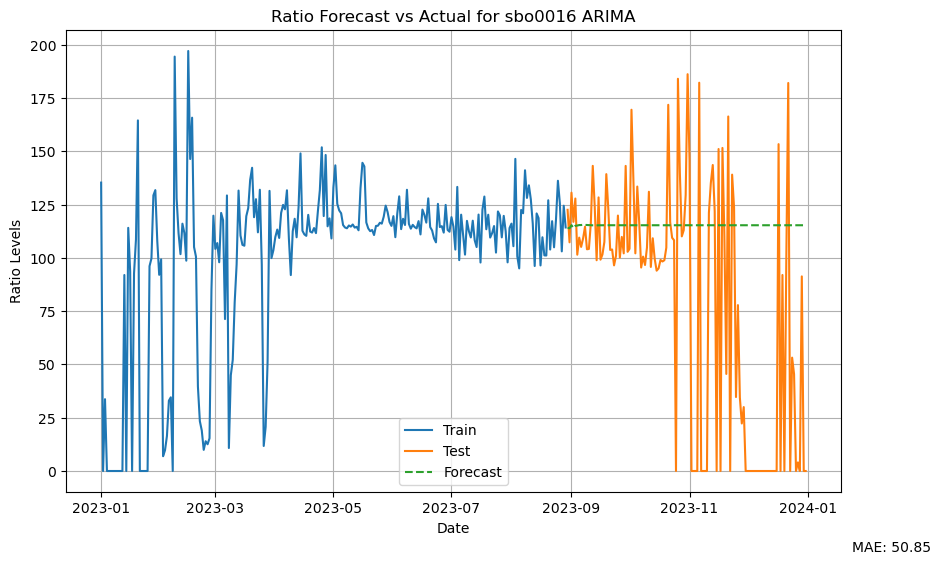

Processing train_ratio_sbo0017
                 Ratio
ValueTime             
2023-01-01  108.178257
2023-01-02    0.000000
2023-01-03    9.978045
2023-01-04   32.128787
2023-01-05   50.575317
2023-01-06    4.605181
2023-01-07    8.807069
2023-01-08    0.000000
2023-01-09    0.000000
2023-01-10    0.000000
2023-01-11    0.000000
2023-01-12  106.992334
2023-01-13   57.965087
2023-01-14  182.856779
2023-01-15   90.975664
2023-01-16   43.042781
2023-01-17    0.000000
2023-01-18   32.384997
2023-01-19   37.412414
2023-01-20   73.468169
2023-01-21  114.144911
2023-01-22   96.106932
2023-01-23   85.869718
2023-01-24    0.000000
2023-01-25   90.006175
2023-01-26   45.923925
2023-01-27   39.016470
2023-01-28   55.511896
2023-01-29   71.218497
2023-01-30   45.928380
2023-01-31   43.149328
2023-02-01   85.655614
2023-02-02   21.941792
2023-02-03   43.151259
2023-02-04   43.881162
2023-02-05   72.091712
2023-02-06   39.282238
2023-02-07  107.449262
2023-02-08   92.691127
2023-02-09   83.652218
202

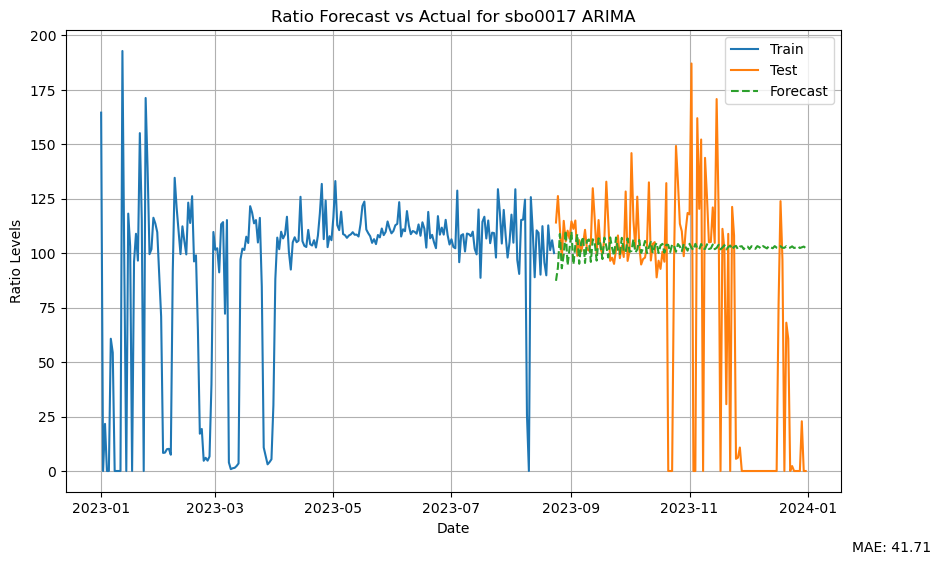

Processing train_ratio_sbo0028
                 Ratio
ValueTime             
2023-01-01  108.178257
2023-01-02    0.000000
2023-01-03    9.978045
2023-01-04   32.128787
2023-01-05   50.575317
2023-01-06    4.605181
2023-01-07    8.807069
2023-01-08    0.000000
2023-01-09    0.000000
2023-01-10    0.000000
2023-01-11    0.000000
2023-01-12  106.992334
2023-01-13   57.965087
2023-01-14  182.856779
2023-01-15   90.975664
2023-01-16   43.042781
2023-01-17    0.000000
2023-01-18   32.384997
2023-01-19   37.412414
2023-01-20   73.468169
2023-01-21  114.144911
2023-01-22   96.106932
2023-01-23   85.869718
2023-01-24    0.000000
2023-01-25   90.006175
2023-01-26   45.923925
2023-01-27   39.016470
2023-01-28   55.511896
2023-01-29   71.218497
2023-01-30   45.928380
2023-01-31   43.149328
2023-02-01   85.655614
2023-02-02   21.941792
2023-02-03   43.151259
2023-02-04   43.881162
2023-02-05   72.091712
2023-02-06   39.282238
2023-02-07  107.449262
2023-02-08   92.691127
2023-02-09   83.652218
202

C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Processing test test_ratio_sbo0028
Mean Absolute Error (MAE): 34.98


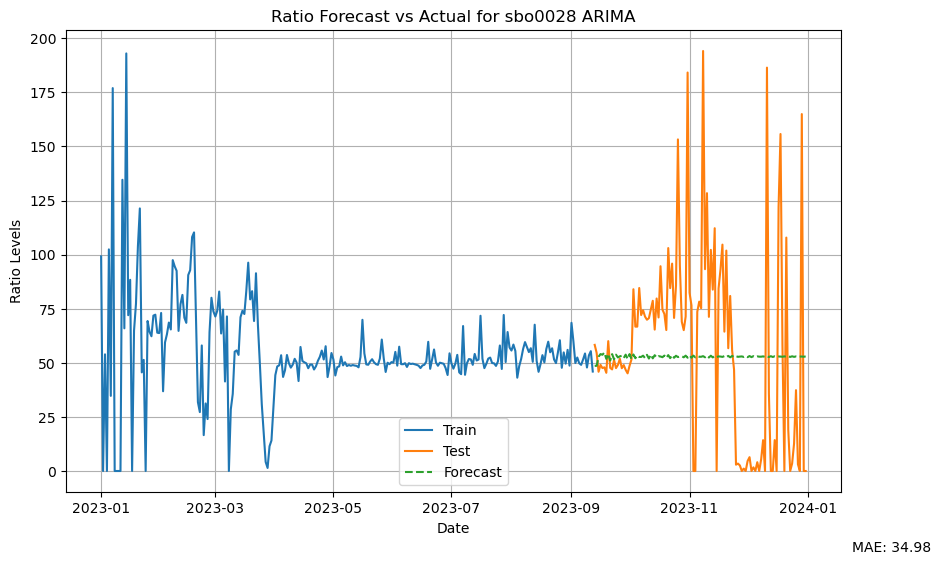

Processing train_ratio_sbo0030
                 Ratio
ValueTime             
2023-01-01  108.178257
2023-01-02    0.000000
2023-01-03    9.978045
2023-01-04   32.128787
2023-01-05   50.575317
2023-01-06    4.605181
2023-01-07    8.807069
2023-01-08    0.000000
2023-01-09    0.000000
2023-01-10    0.000000
2023-01-11    0.000000
2023-01-12  106.992334
2023-01-13   57.965087
2023-01-14  182.856779
2023-01-15   90.975664
2023-01-16   43.042781
2023-01-17    0.000000
2023-01-18   32.384997
2023-01-19   37.412414
2023-01-20   73.468169
2023-01-21  114.144911
2023-01-22   96.106932
2023-01-23   85.869718
2023-01-24    0.000000
2023-01-25   90.006175
2023-01-26   45.923925
2023-01-27   39.016470
2023-01-28   55.511896
2023-01-29   71.218497
2023-01-30   45.928380
2023-01-31   43.149328
2023-02-01   85.655614
2023-02-02   21.941792
2023-02-03   43.151259
2023-02-04   43.881162
2023-02-05   72.091712
2023-02-06   39.282238
2023-02-07  107.449262
2023-02-08   92.691127
2023-02-09   83.652218
202

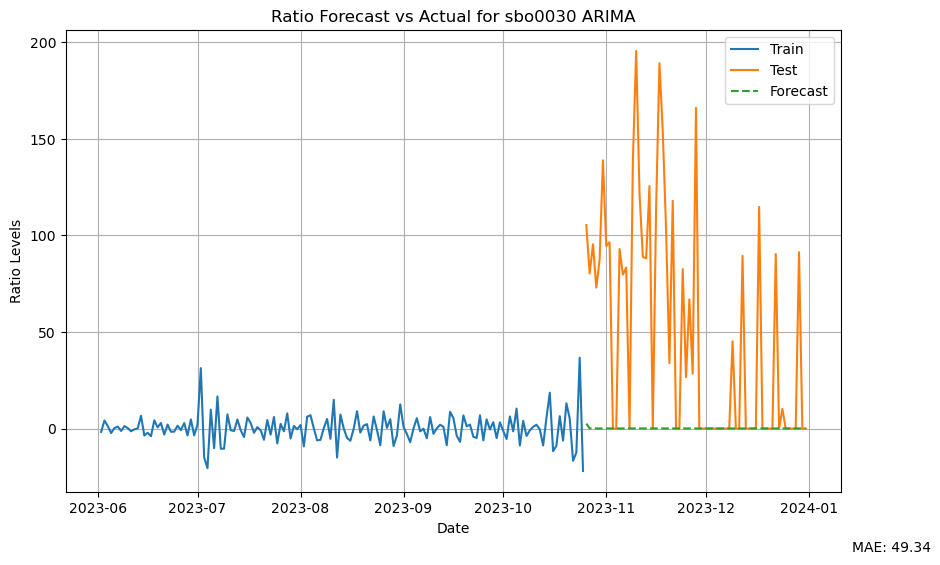

Processing train_ratio_sga0001
                 Ratio
ValueTime             
2023-01-01  108.178257
2023-01-02    0.000000
2023-01-03    9.978045
2023-01-04   32.128787
2023-01-05   50.575317
2023-01-06    4.605181
2023-01-07    8.807069
2023-01-08    0.000000
2023-01-09    0.000000
2023-01-10    0.000000
2023-01-11    0.000000
2023-01-12  106.992334
2023-01-13   57.965087
2023-01-14  182.856779
2023-01-15   90.975664
2023-01-16   43.042781
2023-01-17    0.000000
2023-01-18   32.384997
2023-01-19   37.412414
2023-01-20   73.468169
2023-01-21  114.144911
2023-01-22   96.106932
2023-01-23   85.869718
2023-01-24    0.000000
2023-01-25   90.006175
2023-01-26   45.923925
2023-01-27   39.016470
2023-01-28   55.511896
2023-01-29   71.218497
2023-01-30   45.928380
2023-01-31   43.149328
2023-02-01   85.655614
2023-02-02   21.941792
2023-02-03   43.151259
2023-02-04   43.881162
2023-02-05   72.091712
2023-02-06   39.282238
2023-02-07  107.449262
2023-02-08   92.691127
2023-02-09   83.652218
202

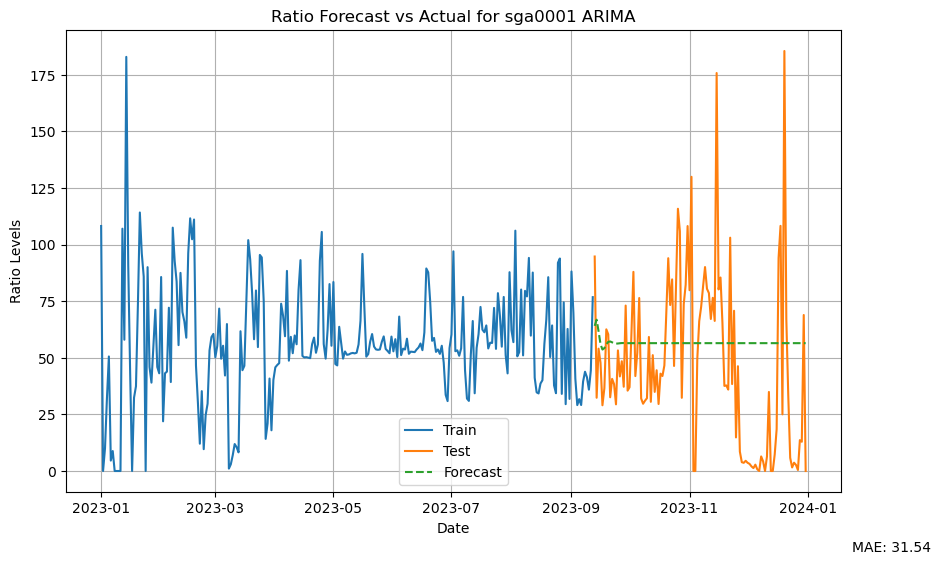

In [85]:
data_frames_test = {
    'test_ratio_fbo0023': test_ratio_fbo0023,
    'test_ratio_fsk0003': test_ratio_fsk0003,
    'test_ratio_fsk0005': test_ratio_fsk0005,
    'test_ratio_fsk0006': test_ratio_fsk0006,
    'test_ratio_fsk0007': test_ratio_fsk0007,
    'test_ratio_fsk0008': test_ratio_fsk0008,
    'test_ratio_mic0001': test_ratio_mic0001,
    'test_ratio_sbo0001': test_ratio_sbo0001,
    'test_ratio_sbo0002': test_ratio_sbo0002,
    'test_ratio_sbo0005': test_ratio_sbo0005,
    'test_ratio_sbo0007': test_ratio_sbo0007,
    'test_ratio_sbo0011': test_ratio_sbo0011,
    'test_ratio_sbo0012': test_ratio_sbo0012,
    'test_ratio_sbo0013': test_ratio_sbo0013,
    'test_ratio_sbo0014': test_ratio_sbo0014,
    'test_ratio_sbo0015': test_ratio_sbo0015,
    'test_ratio_sbo0016': test_ratio_sbo0016,
    'test_ratio_sbo0017': test_ratio_sbo0017,
    'test_ratio_sbo0028': test_ratio_sbo0028,
    'test_ratio_sbo0030': test_ratio_sbo0030,
    'test_ratio_sga0001': test_ratio_sga0001
}


data_frames_train = {
    'train_ratio_fbo0023': train_ratio_fbo0023,
    'train_ratio_fsk0003': train_ratio_fsk0003,
    'train_ratio_fsk0005': train_ratio_fsk0005,
    'train_ratio_fsk0006': train_ratio_fsk0006,
    'train_ratio_fsk0007': train_ratio_fsk0007,
    'train_ratio_fsk0008': train_ratio_fsk0008,
    'train_ratio_mic0001': train_ratio_mic0001,
    'train_ratio_sbo0001': train_ratio_sbo0001,
    'train_ratio_sbo0002': train_ratio_sbo0002,
    'train_ratio_sbo0005': train_ratio_sbo0005,
    'train_ratio_sbo0007': train_ratio_sbo0007,
    'train_ratio_sbo0011': train_ratio_sbo0011,
    'train_ratio_sbo0012': train_ratio_sbo0012,
    'train_ratio_sbo0013': train_ratio_sbo0013,
    'train_ratio_sbo0014': train_ratio_sbo0014,
    'train_ratio_sbo0015': train_ratio_sbo0015,
    'train_ratio_sbo0016': train_ratio_sbo0016,
    'train_ratio_sbo0017': train_ratio_sbo0017,
    'train_ratio_sbo0028': train_ratio_sbo0028,
    'train_ratio_sbo0030': train_ratio_sbo0030,
    'train_ratio_sga0001': train_ratio_sga0001,
}


def makemodel(df):
    auto_model = auto_arima(df['Ratio'], seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
    print(auto_model.summary())
    p, d, q = auto_model.order
    print(p, d, q)

    model = ARIMA(df['Ratio'], order=(p, d, q))
    fitted_model = model.fit()
    #print(fitted_model.summary())
    return fitted_model

def forecast_models(data_frames_train, data_frames_test):
    forecasts = {}
    for key, df_train in data_frames_train.items():
        print(f"Processing {key}")
        print(df)
        model = makemodel(df_train)
        test_key = key.replace('train_', 'test_')
        if test_key in data_frames_test:
            print(f"Processing test {test_key}")

            df_test = data_frames_test[test_key]
            forecast = model.get_forecast(len(df_test))
            forecasts[test_key] = forecast.summary_frame()
            #print(forecast.summary_frame())
            plot(forecast.summary_frame()['mean'], df_train['Ratio'], df_test['Ratio'],test_key )
    return forecasts

def plot(forecast, train, test, key):
    identifier = key.split('_')[-1]  # Splits the key and takes the last part, which is the identifier

    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train, label='Train')
    plt.plot(test.index, test, label='Test')
    plt.plot(forecast.index, forecast, label='Forecast', linestyle='--')
    plt.title(f'Ratio Forecast vs Actual for {identifier} ARIMA')
    plt.xlabel('Date')
    plt.ylabel('Ratio Levels')
    plt.legend()
    plt.grid(True)

    MAE = np.mean(np.abs(forecast - test))
    print('Mean Absolute Error (MAE):', np.round(MAE, 2))
    plt.figtext(0.99, 0.01, f'MAE: {MAE:.2f}', horizontalalignment='right')  # Display MAE on the plot

    # Specify the filename and path where the plot should be saved
    save_path = f'Plot_ARIMA/forecast_plot_{identifier}.png'
    plt.savefig(save_path, format='png', dpi=300)  # Save the plot as a PNG file with high resolution

    plt.show()  # Display the plot

    return save_path  # Optionally return the path where the file was saved



# Run the forecasting function
forecast_results = forecast_models(data_frames_train, data_frames_test)

In [86]:
forecast_results

{'test_ratio_fbo0023': Ratio            mean    mean_se  mean_ci_lower  mean_ci_upper
 2023-09-01  85.563512  23.899590      38.721177     132.405847
 2023-09-02  85.563512  23.975741      38.571922     132.555101
 2023-09-03  85.563512  24.051652      38.423140     132.703884
 2023-09-04  85.563512  24.127324      38.274825     132.852198
 2023-09-05  85.563512  24.202760      38.126975     133.000049
 2023-09-06  85.563512  24.277960      37.979584     133.147440
 2023-09-07  85.563512  24.352929      37.832648     133.294376
 2023-09-08  85.563512  24.427668      37.686162     133.440861
 2023-09-09  85.563512  24.502179      37.540124     133.586899
 2023-09-10  85.563512  24.576463      37.394529     133.732495
 2023-09-11  85.563512  24.650524      37.249372     133.877652
 2023-09-12  85.563512  24.724363      37.104650     134.022374
 2023-09-13  85.563512  24.797983      36.960359     134.166665
 2023-09-14  85.563512  24.871384      36.816495     134.310529
 2023-09-15  85.56

In [87]:
#train_fbo0023

test_fbo0023

PlantKey       Ratio  SunRad  Temperature
ValueTime                                           
2023-09-01  FBO0023   96.042224   740.0    14.675000
2023-09-02  FBO0023   94.718512  1900.0    15.870833
2023-09-03  FBO0023   90.694064  3950.0    17.479167
2023-09-04  FBO0023   87.669861  5670.0    23.637500
2023-09-05  FBO0023   83.668607  5910.0    22.825000
2023-09-06  FBO0023   82.371296  6480.0    22.391667
2023-09-07  FBO0023   90.926666  4360.0    19.916667
2023-09-08  FBO0023   88.889390  3710.0    22.920833
2023-09-09  FBO0023   82.718394  4230.0    22.204167
2023-09-10  FBO0023   87.133688  4390.0    23.883333
2023-09-11  FBO0023   75.708590  3740.0    21.687500
2023-09-12  FBO0023   94.892333  1190.0    19.133333
2023-09-13  FBO0023   88.364100   530.0    15.237500
2023-09-14  FBO0023   77.126135  5630.0    17.595833
2023-09-15  FBO0023   93.262805  2950.0    17.062500
2023-09-16  FBO0023   77.602320  3800.0    18.879167
2023-09-17  FBO0023   79.377341  5070.0    18.683333
2023-09-18  FBO0023   90.923302  3060.0    14.470833
2023-09-19  FBO0023   63.250063  2350.0    17.525000
2023-09-20  FBO0023   74.635518  1990.0    17.329167
2023-09-21  FBO0023   87.040349  4500.0    20.700000
2023-09-22  FBO0023   88.016620  3130.0    19.245833
2023-09-23  FBO0023   83.794274  3570.0    18.287500
2023-09-24  FBO0023   82.216453  5370.0    16.675000
2023-09-25  FBO0023   82.438815  2550.0    14.583333
2023-09-26  FBO0023   70.037709  3430.0    17.575000
2023-09-27  FBO0023   83.589037  2000.0    17.275000
2023-09-28  FBO0023   83.407950  3720.0    18.512500
2023-09-29  FBO0023   71.636674  1600.0    16.287500
2023-09-30  FBO0023   77.122973  2920.0    16.150000
2023-10-01  FBO0023   82.861686  4410.0    16.295833
2023-10-02  FBO0023   83.359980  1100.0    12.420833
2023-10-03  FBO0023   81.503064   330.0    11.150000
2023-10-04  FBO0023   83.834803  3290.0    14.033333
2023-10-05  FBO0023   85.523341  1750.0     9.133333
2023-10-06  FBO0023   84.714759   740.0     8.166667
2023-10-07  FBO0023   79.968094  4500.0    10.887500
2023-10-08  FBO0023   85.084694  4970.0    10.687500
2023-10-09  FBO0023   80.586372  5020.0    10.616667
2023-10-10  FBO0023   78.426747  4750.0    10.345833
2023-10-11  FBO0023   93.197830   820.0    13.004167
2023-10-12  FBO0023   81.639167  4870.0    13.637500
2023-10-13  FBO0023   85.884575  2180.0     9.679167
2023-10-14  FBO0023   74.335230  3720.0    12.870833
2023-10-15  FBO0023   84.628755  3140.0    10.808333
2023-10-16  FBO0023   78.819725  4930.0     8.887500
2023-10-17  FBO0023  101.318593  1950.0     8.175000
2023-10-18  FBO0023   95.182530  2340.0     7.587500
2023-10-19  FBO0023   75.337272  2070.0     3.591667
2023-10-20  FBO0023   73.783352   660.0     4.362500
2023-10-21  FBO0023  119.309724   110.0     4.637500
2023-10-22  FBO0023   77.861586   340.0     6.933333
2023-10-23  FBO0023   80.932682   420.0     6.579167
2023-10-24  FBO0023   72.886222  2610.0     7.208333
2023-10-25  FBO0023  107.765153   260.0     3.633333
2023-10-26  FBO0023    0.000000     0.0     3.300000
2023-10-27  FBO0023  102.482770   100.0     2.962500
2023-10-28  FBO0023   89.425655  2350.0     4.850000
2023-10-29  FBO0023   82.671810  1050.0     3.466667
2023-10-30  FBO0023   79.229722   390.0     4.325000
2023-10-31  FBO0023  189.360263    30.0     7.312500
2023-11-01  FBO0023   69.708057   280.0     2.312500
2023-11-02  FBO0023  100.134932   130.0     2.425000
2023-11-03  FBO0023    0.000000     0.0     8.683333
2023-11-04  FBO0023    0.000000     0.0     8.729167
2023-11-05  FBO0023   71.051018   360.0     7.466667
2023-11-06  FBO0023   87.042122   120.0     8.087500
2023-11-07  FBO0023   75.669902   350.0     7.050000
2023-11-08  FBO0023  112.939348   100.0     5.708333
2023-11-09        0    0.000000     0.0     0.000000
2023-11-10  FBO0023  126.417272    60.0     7.687500
2023-11-11  FBO0023  101.376723   700.0     7.137500
2023-11-12  FBO0023  110.744933   110.0     4.533333
2023-11-13        0    0.000000     

In [88]:
train_fbo0023_var = train_fbo0023.drop('PlantKey', axis=1)

test_fbo0023_var = test_fbo0023.drop('PlantKey', axis=1)

In [89]:


#test_fbo0023_var


#test_fbo0023_var
# Assuming 'train_fbo0023_numeric' contains your data
# Calculate the first difference to make data stationary

#train_fbo0023_var['SunRad_diff'] = train_fbo0023_var['SunRad'].diff()
#train_fbo0023_var['Temperature_diff'] = train_fbo0023_var['Temperature'].diff()
#test_fbo0023_var['SunRad_diff'] = test_fbo0023_var['SunRad'].diff()
#test_fbo0023_var['Temperature_diff'] = test_fbo0023_var['Temperature'].diff()


#train_fbo0023_var['SunRad'].diff()
#train_fbo0023_var['Temperature'].diff()
#test_fbo0023_var['SunRad'].diff()
#test_fbo0023_var['Temperature'].diff()
#train_fbo0023_var['SunRad']= train_fbo0023_var['SunRad'].diff()
#train_fbo0023_var['Temperature']=train_fbo0023_var['Temperature'].diff()
# Drop the NaN values that come from differencing
train_fbo0023_var = train_fbo0023_var.dropna()
test_fbo0023_var= test_fbo0023_var.dropna()


In [90]:
from statsmodels.tsa.stattools import grangercausalitytests
gc_results = grangercausalitytests(train_fbo0023_var[['SunRad', 'Temperature']], maxlag=4)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=14.0588 , p=0.0002  , df_denom=239, df_num=1
ssr based chi2 test:   chi2=14.2352 , p=0.0002  , df=1
likelihood ratio test: chi2=13.8323 , p=0.0002  , df=1
parameter F test:         F=14.0588 , p=0.0002  , df_denom=239, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.6605  , p=0.0272  , df_denom=236, df_num=2
ssr based chi2 test:   chi2=7.4761  , p=0.0238  , df=2
likelihood ratio test: chi2=7.3624  , p=0.0252  , df=2
parameter F test:         F=3.6605  , p=0.0272  , df_denom=236, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.8922  , p=0.1316  , df_denom=233, df_num=3
ssr based chi2 test:   chi2=5.8473  , p=0.1193  , df=3
likelihood ratio test: chi2=5.7772  , p=0.1230  , df=3
parameter F test:         F=1.8922  , p=0.1316  , df_denom=233, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.0876  , p=0.3634  

In [91]:
train_data_dict = {
    "FBO0023": train_fbo0023,
    "FSK0003": train_fsk0003,
    "FSK0005": train_fsk0005,
    "FSK0006": train_fsk0006,
    "FSK0007": train_fsk0007,
    "FSK0008": train_fsk0008,
    "MIC0001": train_mic0001,
    "SBO0001": train_sbo0001,
    "SBO0002": train_sbo0002,
    "SBO0005": train_sbo0005,
    "SBO0007": train_sbo0007,
    "SBO0011": train_sbo0011,
    "SBO0012": train_sbo0012,
    "SBO0013": train_sbo0013,
    "SBO0014": train_sbo0014,
    "SBO0015": train_sbo0015,
    "SBO0016": train_sbo0016,
    "SBO0017": train_sbo0017,
    "SBO0028": train_sbo0028,
    "SBO0030": train_sbo0030,
    "SGA0001": train_sga0001
}











from statsmodels.tsa.stattools import adfuller


# Function to perform the ADF test
def adf_test(series, title=''):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic for {title}: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is non-stationary")
    return result[1]

# Variables to test for stationarity
variables_to_test = ['Ratio', 'Temperature', 'SolarRadiation']

# Checking stationarity and differencing if needed
for key, df in train_data_dict.items():
    for variable in variables_to_test:
        if variable in df.columns:
            print(f"Testing stationarity for {variable} in {key}...")
            p_value = adf_test(df[variable], title=f"{variable} in {key}")

            if p_value > 0.05:
                print(f"Data for {variable} in {key} is non-stationary, differencing...")
                original_data = df[variable].copy()
                df[variable] = df[variable].diff()  # Differencing
                df.dropna(inplace=True)  # Drop NA values resulting from differencing
                if not df[variable].empty:  # Check if the DataFrame is not empty after dropping NaNs
                    p_value = adf_test(df[variable], title=f"{variable} in {key} after differencing")
                    print(f"New p-value for {variable} in {key} after differencing: {p_value}")
                else:
                    print(f"No data left for {variable} in {key} after differencing and dropping NaNs.")
          










Testing stationarity for Ratio in FBO0023...
ADF Statistic for Ratio in FBO0023: -4.956898181588217
p-value: 2.6991187608390638e-05
Data is stationary
Testing stationarity for Temperature in FBO0023...
ADF Statistic for Temperature in FBO0023: -1.1664168894849958
p-value: 0.6878729774191726
Data is non-stationary
Data for Temperature in FBO0023 is non-stationary, differencing...
ADF Statistic for Temperature in FBO0023 after differencing: -8.588139238509136
p-value: 7.410625511554636e-14
Data is stationary
New p-value for Temperature in FBO0023 after differencing: 7.410625511554636e-14
Testing stationarity for Ratio in FSK0003...
ADF Statistic for Ratio in FSK0003: -5.165390978687903
p-value: 1.0341082307570495e-05
Data is stationary
Testing stationarity for Temperature in FSK0003...
ADF Statistic for Temperature in FSK0003: -1.4878216717238462
p-value: 0.5395269516667102
Data is non-stationary
Data for Temperature in FSK0003 is non-stationary, differencing...
ADF Statistic for Tempera

In [92]:
from statsmodels.tsa.stattools import grangercausalitytests
train_data_dict = {
    "FBO0023": train_fbo0023,
    "FSK0003": train_fsk0003,
    "FSK0005": train_fsk0005,
    "FSK0006": train_fsk0006,
    "FSK0007": train_fsk0007,
    "FSK0008": train_fsk0008,
    "MIC0001": train_mic0001,
    "SBO0001": train_sbo0001,
    "SBO0002": train_sbo0002,
    "SBO0005": train_sbo0005,
    "SBO0007": train_sbo0007,
    "SBO0011": train_sbo0011,
    "SBO0012": train_sbo0012,
    "SBO0013": train_sbo0013,
    "SBO0014": train_sbo0014,
    "SBO0015": train_sbo0015,
    "SBO0016": train_sbo0016,
    "SBO0017": train_sbo0017,
    "SBO0028": train_sbo0028,
    "SBO0030": train_sbo0030,
    "SGA0001": train_sga0001
}


train_data_dict

# Function to perform Granger causality test
def granger_test(dataframe, max_lags=2):
    variables = dataframe.columns
    results = {}
    for var1 in variables:
        for var2 in variables:
            if var1 != var2:
                test_result = grangercausalitytests(dataframe[[var1, var2]], maxlag=max_lags, verbose=False)
                p_values = [round(test_result[i + 1][0]['ssr_chi2test'][1], 4) for i in range(max_lags)]
                results[f'{var1} causes {var2}'] = p_values
    return results

# Apply Granger causality test on the datasets where stationarity has been checked
for key, df in train_data_dict.items():
    print(df)
    if set(variables_to_test).issubset(df.columns):  # Ensure all variables are in the DataFrame
        print(f"Performing Granger causality tests for dataset {key}...")
        granger_results = granger_test(df[variables_to_test])
        print(granger_results)



           PlantKey       Ratio  SunRad  Temperature
ValueTime                                           
2023-01-02  FBO0023    0.000000     0.0     3.550000
2023-01-03  FBO0023   87.450395   650.0    -4.066667
2023-01-04  FBO0023    0.000000     0.0    -2.158333
2023-01-05  FBO0023    0.000000     0.0     0.620833
2023-01-06  FBO0023   63.392850   100.0    -1.883333
2023-01-07  FBO0023    0.000000     0.0     4.370833
2023-01-08  FBO0023    0.000000     0.0     3.883333
2023-01-09  FBO0023    0.000000     0.0     0.508333
2023-01-10  FBO0023  186.289509    20.0    -1.000000
2023-01-11  FBO0023    0.000000     0.0     1.483333
2023-01-12        0    0.000000     0.0    -4.383333
2023-01-13  FBO0023   80.977175   150.0     3.745833
2023-01-14        0    0.000000     0.0    -3.745833
2023-01-15  FBO0023  115.304053   300.0     3.904167
2023-01-16  FBO0023  105.260100   860.0    -0.483333
2023-01-17  FBO0023    0.000000     0.0    -1.020833
2023-01-18  FBO0023   59.701184  1640.0     0.

In [93]:
from statsmodels.tsa.api import VAR , VARMAX

train_data_dict = {
    "FBO0023": train_fbo0023,
    "FSK0003": train_fsk0003,
    "FSK0005": train_fsk0005,
    "FSK0006": train_fsk0006,
    "FSK0007": train_fsk0007,
    "FSK0008": train_fsk0008,
    "MIC0001": train_mic0001,
    "SBO0001": train_sbo0001,
    "SBO0002": train_sbo0002,
    "SBO0005": train_sbo0005,
    "SBO0007": train_sbo0007,
    "SBO0011": train_sbo0011,
    "SBO0012": train_sbo0012,
    "SBO0013": train_sbo0013,
    "SBO0014": train_sbo0014,
    "SBO0015": train_sbo0015,
    "SBO0016": train_sbo0016,
    "SBO0017": train_sbo0017,
    "SBO0028": train_sbo0028,
    "SBO0030": train_sbo0030,
    "SGA0001": train_sga0001
}
best_lags = {}

for key, df in train_data_dict.items():
    #print(df.drop(["PlantKey"],axis=1))
    #print(df)
    df =df.drop(["PlantKey"],axis=1)
    #df =df.drop(["Temperature"],axis=1)



    #gc_results_sunrad = grangercausalitytests(df[['SunRad', 'Ratio']], maxlag=2)
    model= VAR(df)
    sorted_order= model.select_order(maxlags= 20)
    #print("With sunrad and ratio")
    print("With sunrad and ratio and temp")
    best_lag = sorted_order.aic
    best_lags[key] = best_lag
    print(best_lag)


print(f"For {key}, best AIC lag: {best_lag}")



#print(sorted_order.summary())
print(best_lags)


With sunrad and ratio and temp
3
With sunrad and ratio and temp
2
With sunrad and ratio and temp
6
With sunrad and ratio and temp
10
With sunrad and ratio and temp
18
With sunrad and ratio and temp
1
With sunrad and ratio and temp
18
With sunrad and ratio and temp
3
With sunrad and ratio and temp
3
With sunrad and ratio and temp
20
With sunrad and ratio and temp
14
With sunrad and ratio and temp
15
With sunrad and ratio and temp
8
With sunrad and ratio and temp
3
With sunrad and ratio and temp
8
With sunrad and ratio and temp
14
With sunrad and ratio and temp
4
With sunrad and ratio and temp
6
With sunrad and ratio and temp
3
With sunrad and ratio and temp
5
With sunrad and ratio and temp
8
For SGA0001, best AIC lag: 8
{'FBO0023': 3, 'FSK0003': 2, 'FSK0005': 6, 'FSK0006': 10, 'FSK0007': 18, 'FSK0008': 1, 'MIC0001': 18, 'SBO0001': 3, 'SBO0002': 3, 'SBO0005': 20, 'SBO0007': 14, 'SBO0011': 15, 'SBO0012': 8, 'SBO0013': 3, 'SBO0014': 8, 'SBO0015': 14, 'SBO0016': 4, 'SBO0017': 6, 'SBO0028': 

Processing FBO0023 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasting test data for FBO0023
Mean Absolute Error (MAE): 35.97
Plot saved to Plots_VARMAX/forecast_plot_FBO0023.png


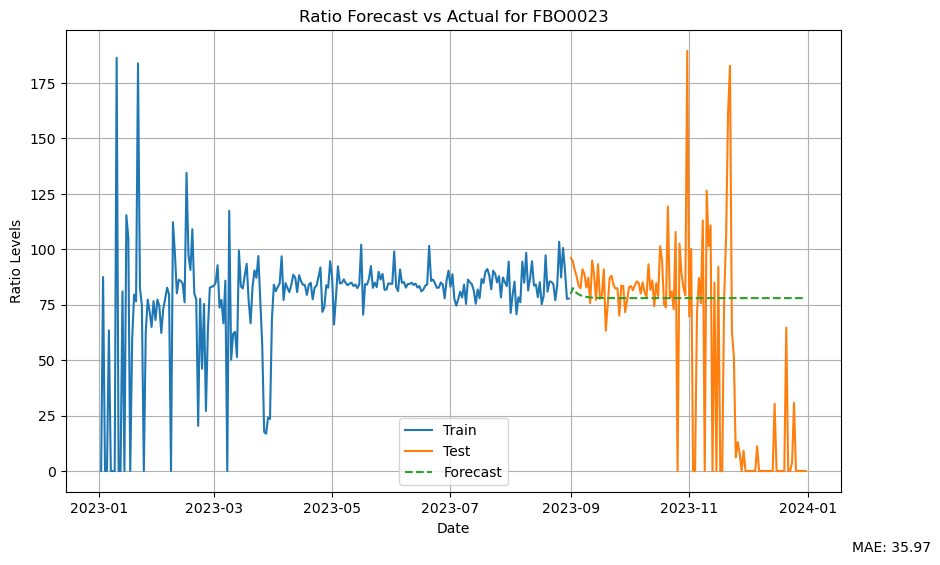

Processing FSK0003 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasting test data for FSK0003
Mean Absolute Error (MAE): 35.23
Plot saved to Plots_VARMAX/forecast_plot_FSK0003.png


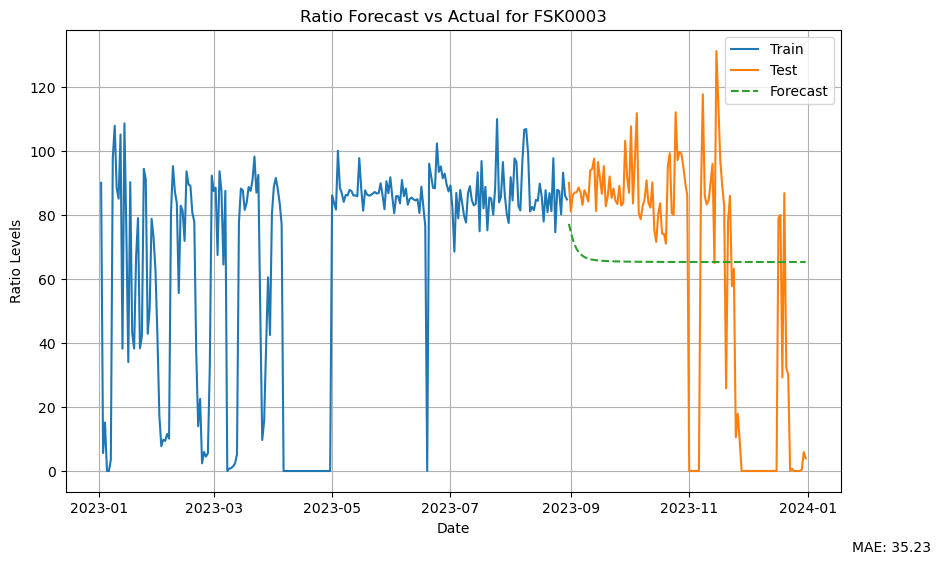

Processing FSK0005 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")


Forecasting test data for FSK0005
Mean Absolute Error (MAE): 57.41
Plot saved to Plots_VARMAX/forecast_plot_FSK0005.png


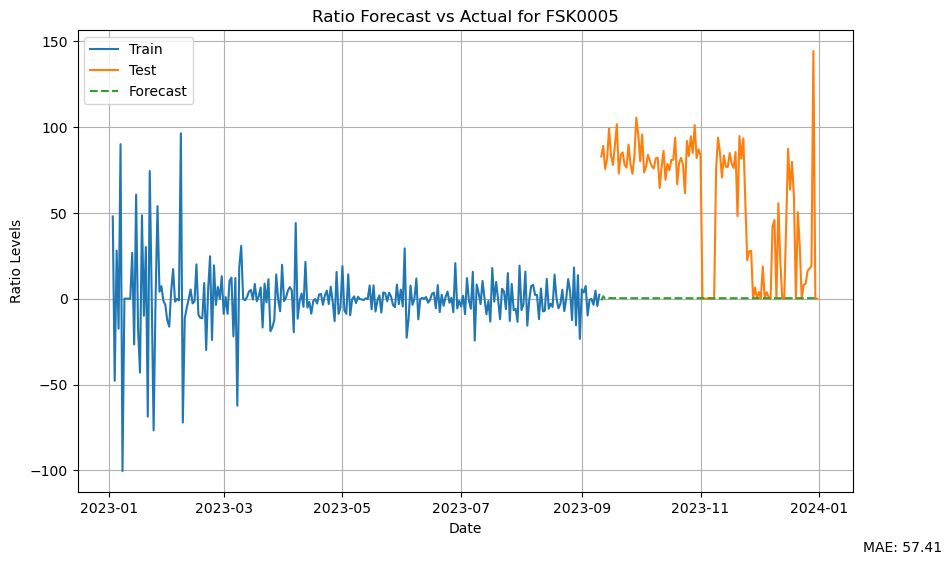

Processing FSK0006 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")


Forecasting test data for FSK0006
Mean Absolute Error (MAE): 37.79
Plot saved to Plots_VARMAX/forecast_plot_FSK0006.png


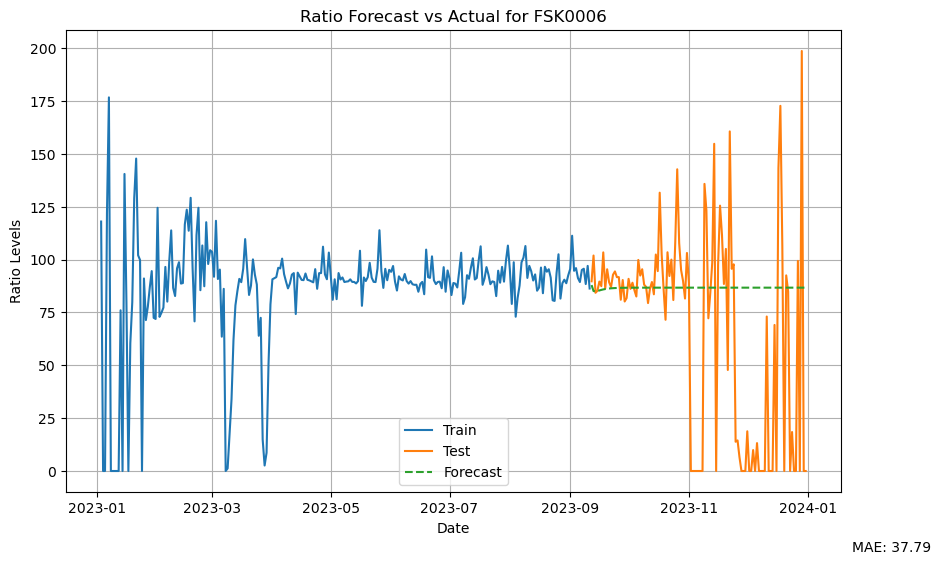

Processing FSK0007 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasting test data for FSK0007
Mean Absolute Error (MAE): 25.77
Plot saved to Plots_VARMAX/forecast_plot_FSK0007.png


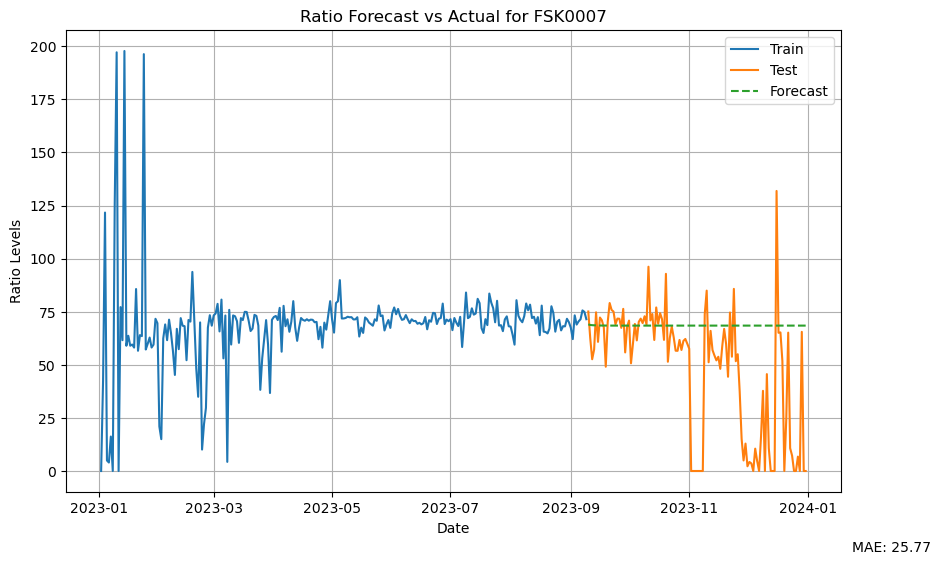

Processing FSK0008 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasting test data for FSK0008
Mean Absolute Error (MAE): 50.98
Plot saved to Plots_VARMAX/forecast_plot_FSK0008.png


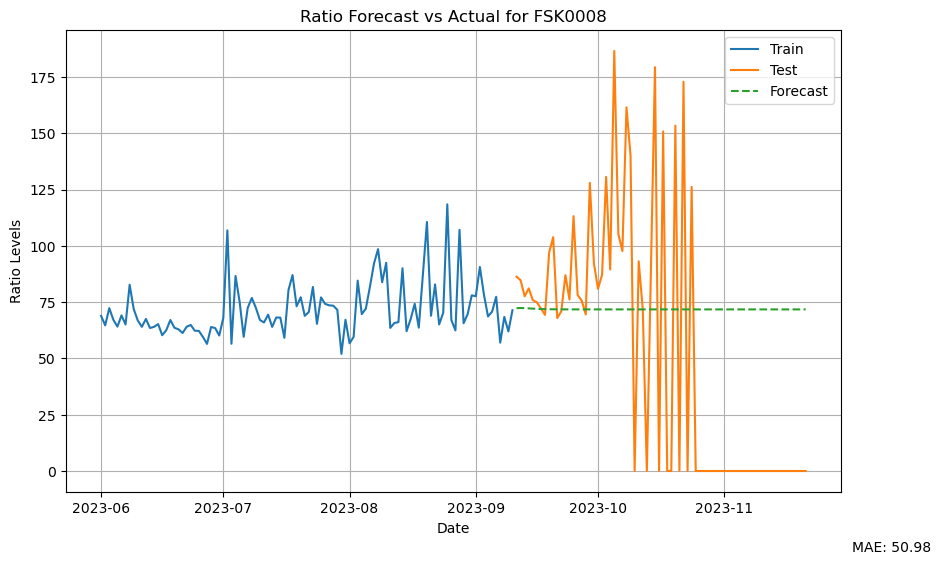

Processing MIC0001 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")


Forecasting test data for MIC0001
Mean Absolute Error (MAE): 34.31
Plot saved to Plots_VARMAX/forecast_plot_MIC0001.png


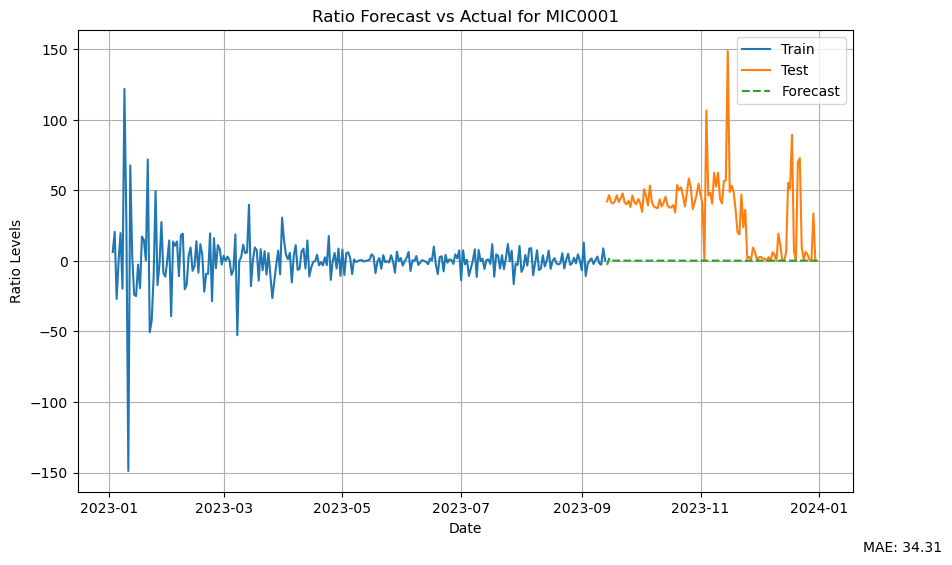

Processing SBO0001 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")


Forecasting test data for SBO0001
Mean Absolute Error (MAE): 65.97
Plot saved to Plots_VARMAX/forecast_plot_SBO0001.png


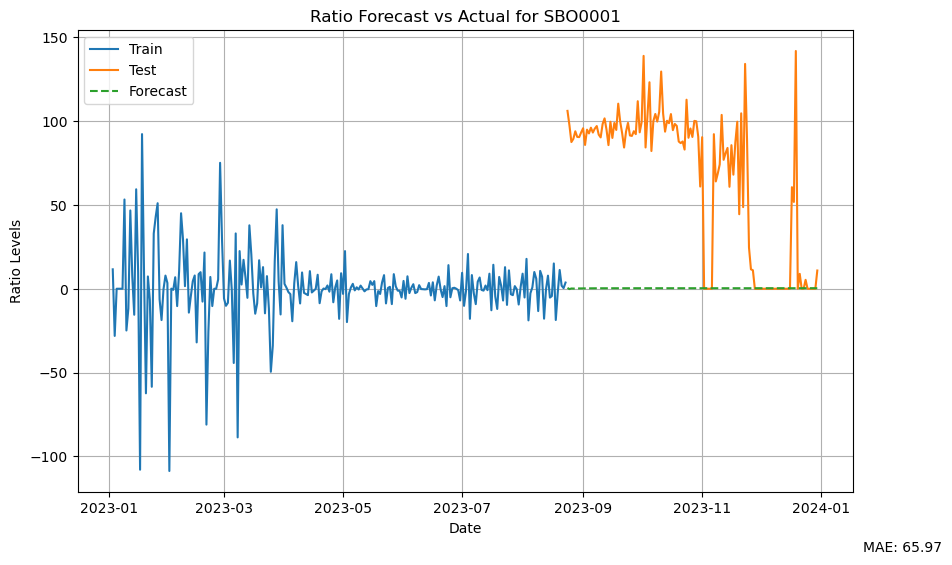

Processing SBO0002 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasting test data for SBO0002
Mean Absolute Error (MAE): 64.56
Plot saved to Plots_VARMAX/forecast_plot_SBO0002.png


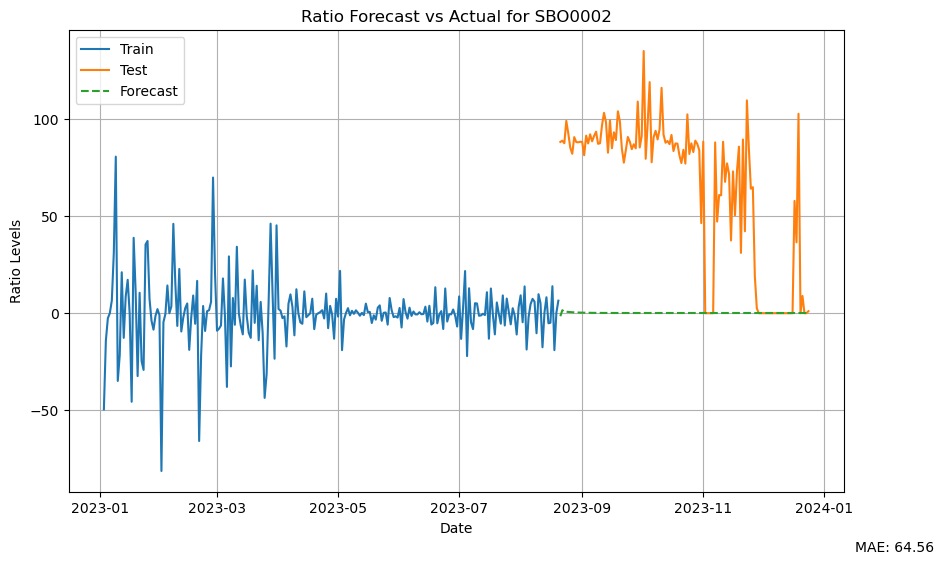

Processing SBO0005 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")


Forecasting test data for SBO0005
Mean Absolute Error (MAE): 34.08
Plot saved to Plots_VARMAX/forecast_plot_SBO0005.png


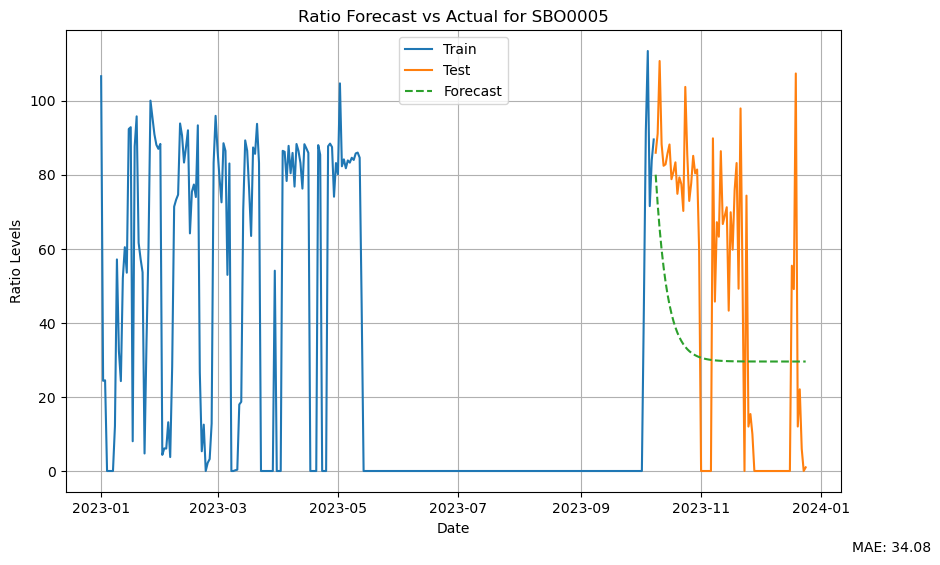

Processing SBO0007 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")


Forecasting test data for SBO0007
Mean Absolute Error (MAE): 66.53
Plot saved to Plots_VARMAX/forecast_plot_SBO0007.png


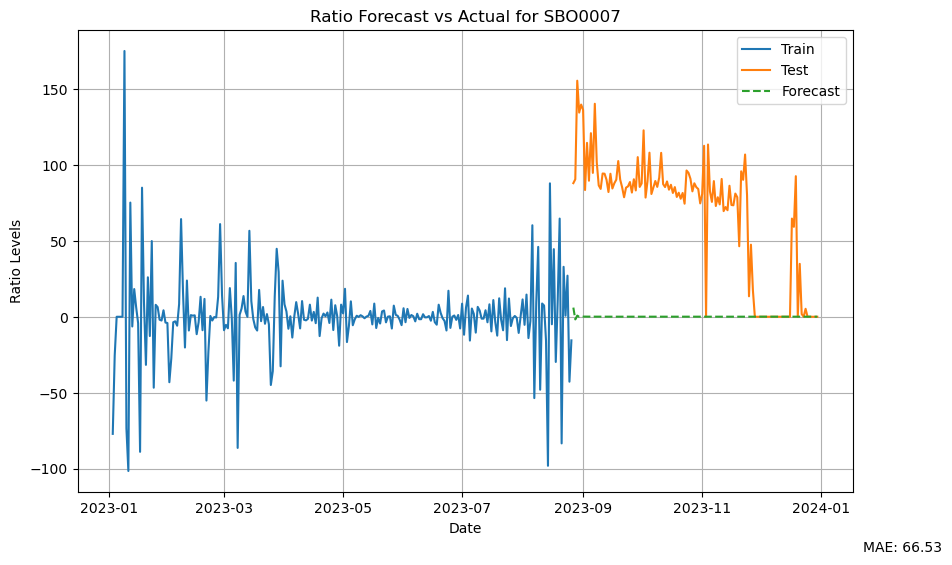

Processing SBO0011 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")


Forecasting test data for SBO0011
Mean Absolute Error (MAE): 57.05
Plot saved to Plots_VARMAX/forecast_plot_SBO0011.png


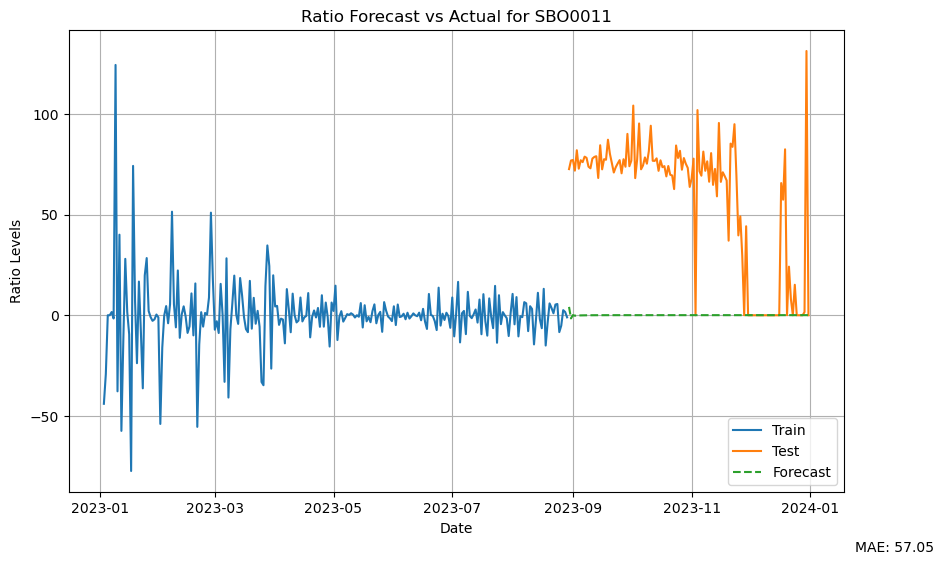

Processing SBO0012 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")


Forecasting test data for SBO0012
Mean Absolute Error (MAE): 80.85
Plot saved to Plots_VARMAX/forecast_plot_SBO0012.png


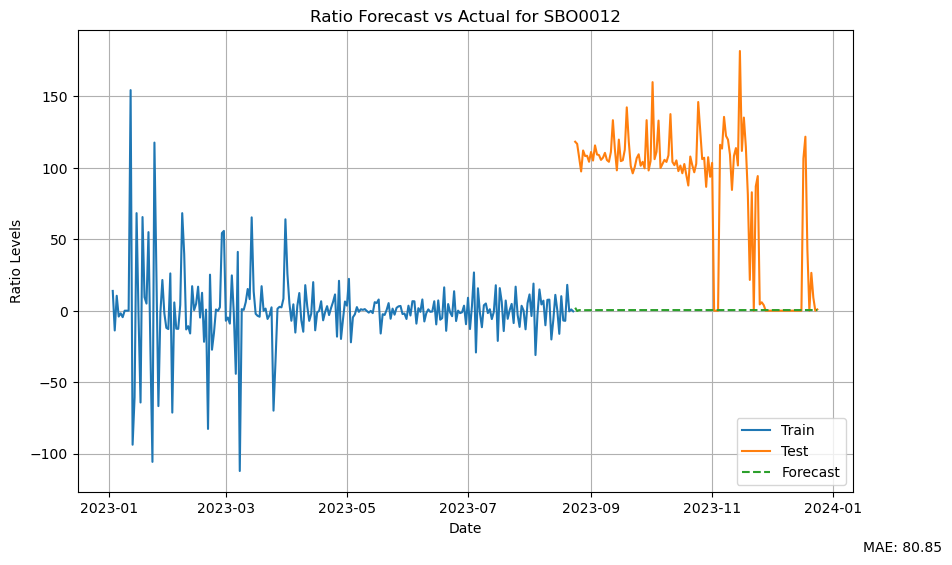

Processing SBO0013 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")


Forecasting test data for SBO0013
Mean Absolute Error (MAE): 65.11
Plot saved to Plots_VARMAX/forecast_plot_SBO0013.png


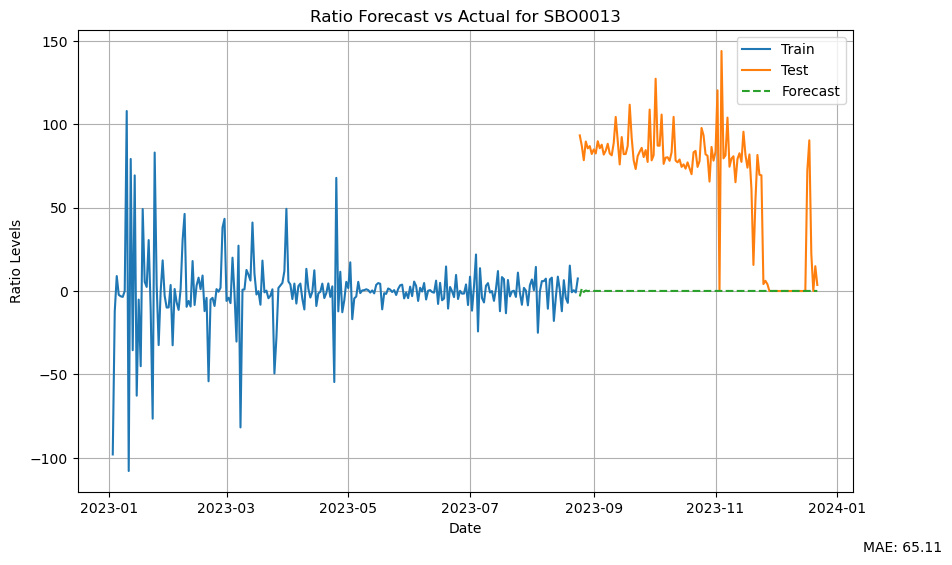

Processing SBO0014 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")


Forecasting test data for SBO0014
Mean Absolute Error (MAE): 52.13
Plot saved to Plots_VARMAX/forecast_plot_SBO0014.png


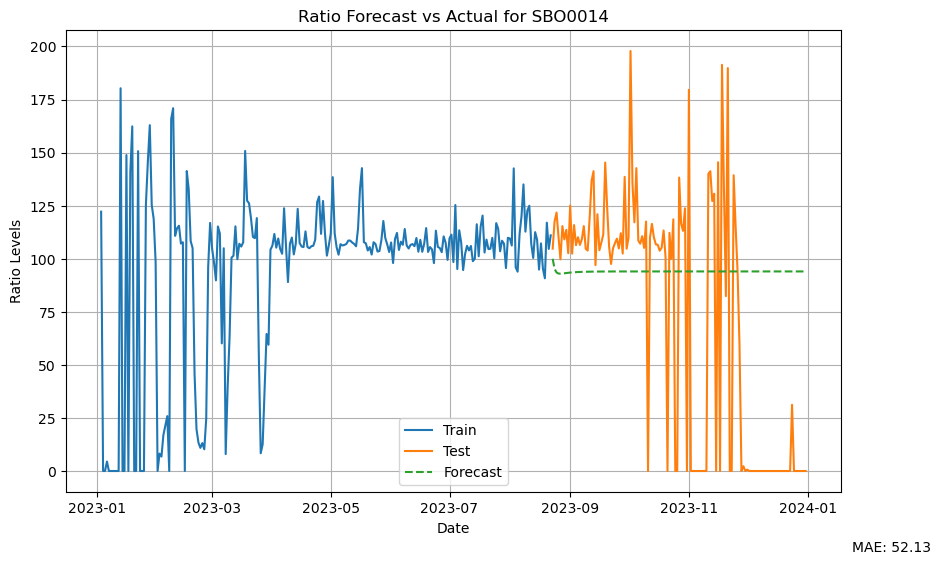

Processing SBO0015 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")


Forecasting test data for SBO0015
Mean Absolute Error (MAE): 63.73
Plot saved to Plots_VARMAX/forecast_plot_SBO0015.png


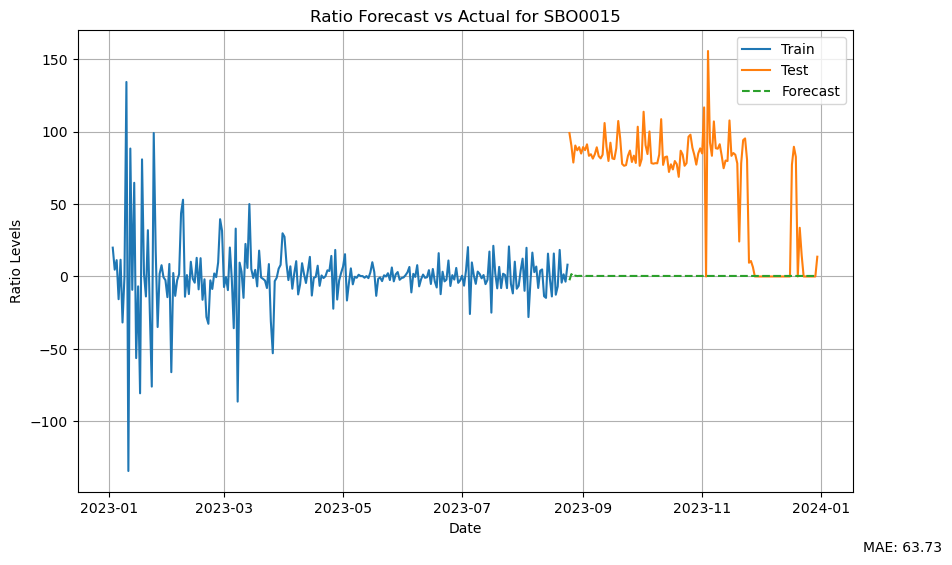

Processing SBO0016 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasting test data for SBO0016
Mean Absolute Error (MAE): 46.55
Plot saved to Plots_VARMAX/forecast_plot_SBO0016.png


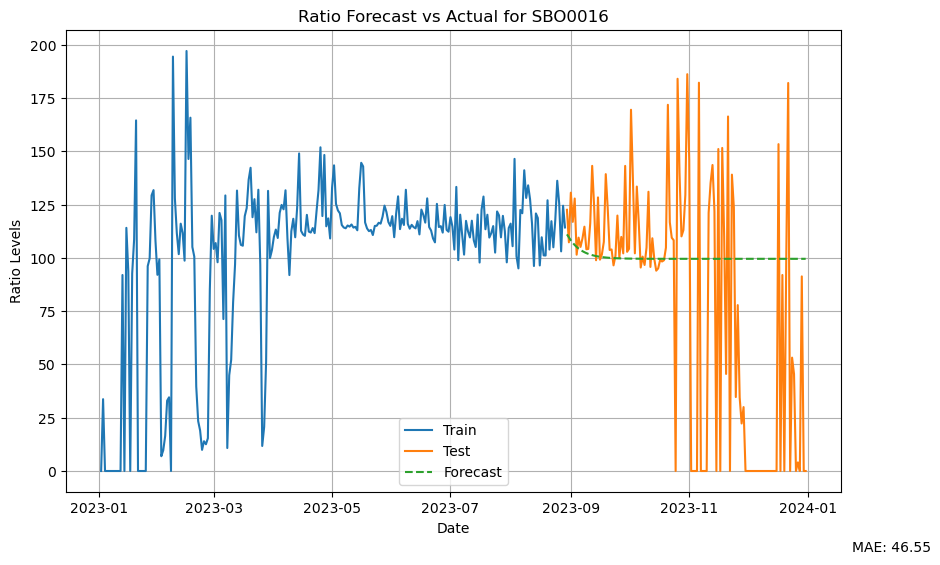

Processing SBO0017 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasting test data for SBO0017
Mean Absolute Error (MAE): 42.41
Plot saved to Plots_VARMAX/forecast_plot_SBO0017.png


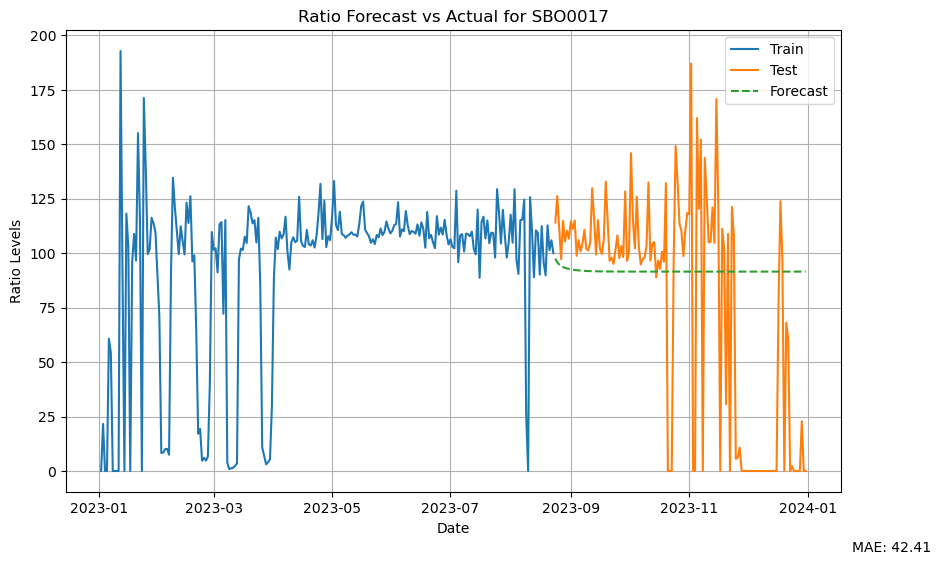

Processing SBO0028 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasting test data for SBO0028
Mean Absolute Error (MAE): 34.87
Plot saved to Plots_VARMAX/forecast_plot_SBO0028.png


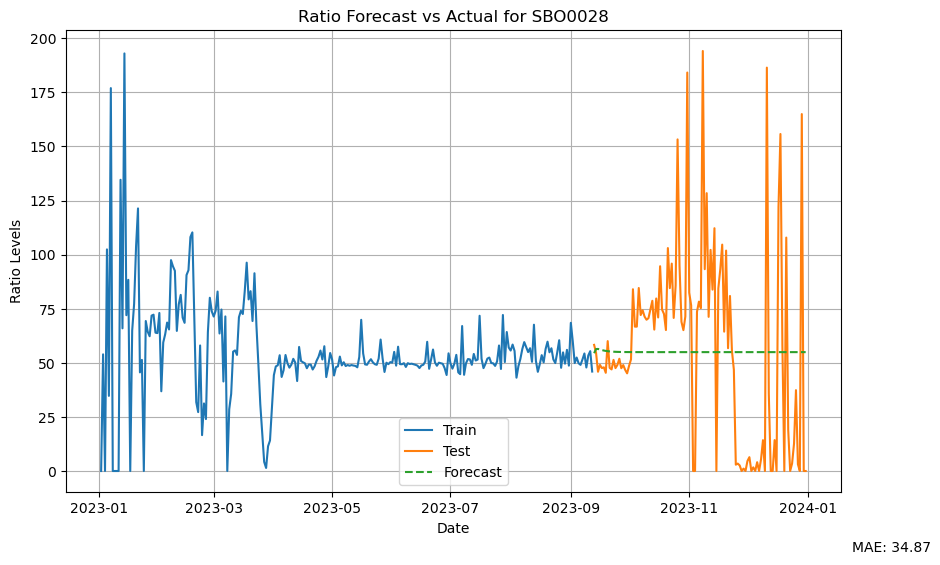

Processing SBO0030 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")


Forecasting test data for SBO0030
Mean Absolute Error (MAE): 49.3
Plot saved to Plots_VARMAX/forecast_plot_SBO0030.png


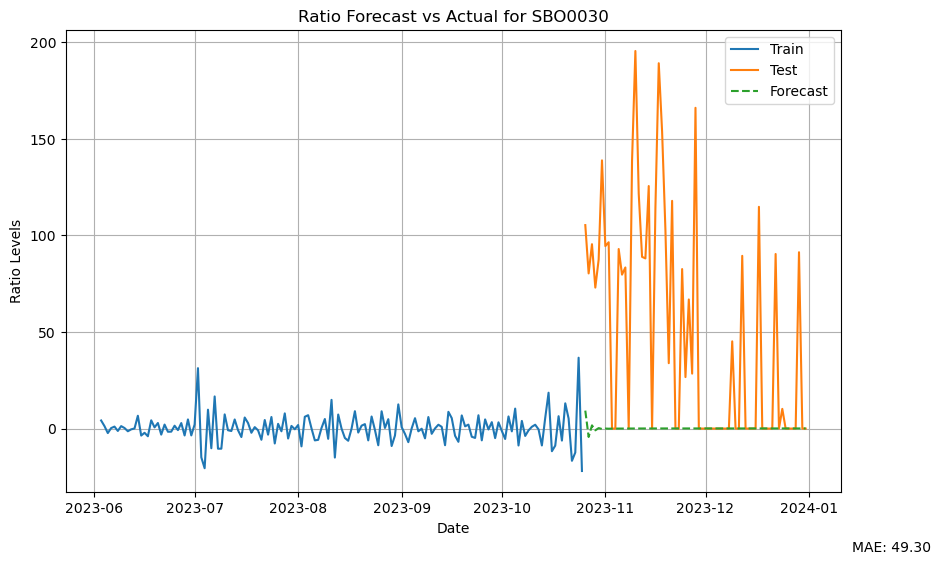

Processing SGA0001 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasting test data for SGA0001
Mean Absolute Error (MAE): 31.29
Plot saved to Plots_VARMAX/forecast_plot_SGA0001.png


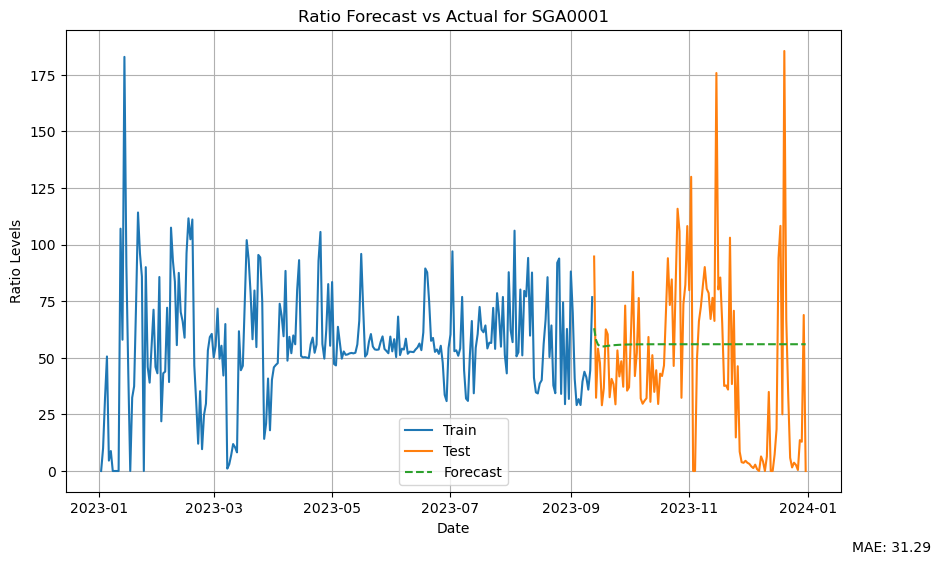

In [110]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.varmax import VARMAX

test_data_dict = {
    "FBO0023": test_fbo0023,
    "FSK0003": test_fsk0003,
    "FSK0005": test_fsk0005,
    "FSK0006": test_fsk0006,
    "FSK0007": test_fsk0007,
    "FSK0008": test_fsk0008,
    "MIC0001": test_mic0001,
    "SBO0001": test_sbo0001,
    "SBO0002": test_sbo0002,
    "SBO0005": test_sbo0005,
    "SBO0007": test_sbo0007,
    "SBO0011": test_sbo0011,
    "SBO0012": test_sbo0012,
    "SBO0013": test_sbo0013,
    "SBO0014": test_sbo0014,
    "SBO0015": test_sbo0015,
    "SBO0016": test_sbo0016,
    "SBO0017": test_sbo0017,
    "SBO0028": test_sbo0028,
    "SBO0030": test_sbo0030,
    "SGA0001": test_sga0001
}

train_data_dict = {
    "FBO0023": train_fbo0023,
    "FSK0003": train_fsk0003,
    "FSK0005": train_fsk0005,
    "FSK0006": train_fsk0006,
    "FSK0007": train_fsk0007,
    "FSK0008": train_fsk0008,
    "MIC0001": train_mic0001,
    "SBO0001": train_sbo0001,
    "SBO0002": train_sbo0002,
    "SBO0005": train_sbo0005,
    "SBO0007": train_sbo0007,
    "SBO0011": train_sbo0011,
    "SBO0012": train_sbo0012,
    "SBO0013": train_sbo0013,
    "SBO0014": train_sbo0014,
    "SBO0015": train_sbo0015,
    "SBO0016": train_sbo0016,
    "SBO0017": train_sbo0017,
    "SBO0028": train_sbo0028,
    "SBO0030": train_sbo0030,
    "SGA0001": train_sga0001
}



# Directory setup for saving plots
var_save_dir = "Plots_VARMAX"
os.makedirs(var_save_dir, exist_ok=True)

arima_save_dir = "Plots_ARIMA"
os.makedirs(arima_save_dir, exist_ok=True)

def makemodel(df, lag):
    """
    Fit a VARMAX model given dataframe and lag order.
    """
    try:
        model_var = VARMAX(df, order=(lag, 0), enforce_stationarity=True)
        fitted_model_var = model_var.fit(disp=False)
        return fitted_model_var
    except Exception as e:
        print(f"An error occurred while fitting the model: {e}")
        return None

def forecast_models(data_frames_train, data_frames_test, best_lags):
    """
    Process each key in training data, fit model, and forecast based on the test data.
    """
    forecasts = {}
    for key, df_train in data_frames_train.items():
        print(f"Processing {key} with data types:\n{df_train.dtypes}")
        lag = best_lags.get(key, 1)  # Default to lag 1 if not specified
        df_train = df_train.drop(["PlantKey"], axis=1, errors='ignore')
        model = makemodel(df_train, lag)
        if model and key in data_frames_test:
            df_test = data_frames_test[key]
            print(f"Forecasting test data for {key}")
            forecast = model.get_forecast(steps=len(df_test))
            forecasts[key] = forecast.summary_frame()
            plot_forecast(df_train['Ratio'], df_test['Ratio'], forecast.summary_frame()['mean'], key, var_save_dir)
    return forecasts

def plot_forecast(train, test, forecast, key, save_dir, show=True, save=True):
    """
    Plot training, test, and forecast data for visual analysis, save and/or show the plot.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train, label='Train')
    plt.plot(test.index, test, label='Test')
    plt.plot(forecast.index, forecast, label='Forecast', linestyle='--')
    plt.title(f'Ratio Forecast vs Actual for {key}')
    plt.xlabel('Date')
    plt.ylabel('Ratio Levels')
    plt.legend()
    plt.grid(True)

    MAE = np.mean(np.abs(forecast - test))
    print(f'Mean Absolute Error (MAE): {np.round(MAE, 2)}')
    plt.figtext(0.99, 0.01, f'MAE: {MAE:.2f}', horizontalalignment='right')

    if save:
        save_path = f'{save_dir}/forecast_plot_{key}.png'
        plt.savefig(save_path, format='png', dpi=300)
        print(f"Plot saved to {save_path}")

    if show:
        plt.show()
    plt.close()

# Define lags for VARMAX modeling
forecast_results = forecast_models(train_data_dict, test_data_dict, best_lags)


In [95]:
from statsmodels.tsa.stattools import grangercausalitytests
gc_results = grangercausalitytests(train_fbo0023_var[['SunRad', 'Temperature']], maxlag=4)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=14.0588 , p=0.0002  , df_denom=239, df_num=1
ssr based chi2 test:   chi2=14.2352 , p=0.0002  , df=1
likelihood ratio test: chi2=13.8323 , p=0.0002  , df=1
parameter F test:         F=14.0588 , p=0.0002  , df_denom=239, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.6605  , p=0.0272  , df_denom=236, df_num=2
ssr based chi2 test:   chi2=7.4761  , p=0.0238  , df=2
likelihood ratio test: chi2=7.3624  , p=0.0252  , df=2
parameter F test:         F=3.6605  , p=0.0272  , df_denom=236, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.8922  , p=0.1316  , df_denom=233, df_num=3
ssr based chi2 test:   chi2=5.8473  , p=0.1193  , df=3
likelihood ratio test: chi2=5.7772  , p=0.1230  , df=3
parameter F test:         F=1.8922  , p=0.1316  , df_denom=233, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.0876  , p=0.3634  

In [96]:
train_mic0001

PlantKey       Ratio  SunRad  Temperature
ValueTime                                           
2023-01-03  MIC0001    6.334532  1120.0    -1.895833
2023-01-04  MIC0001   20.615992    20.0    -1.083333
2023-01-05  MIC0001  -26.950524     0.0     0.558333
2023-01-06  MIC0001    0.000000     0.0    -1.237500
2023-01-07  MIC0001   19.696319    20.0     3.954167
2023-01-08  MIC0001  -19.696319     0.0     3.862500
2023-01-09  MIC0001  121.829168    20.0     0.954167
2023-01-10  MIC0001   27.000301    20.0    -1.375000
2023-01-11  MIC0001 -148.829469     0.0     1.145833
2023-01-12  MIC0001   67.633901    60.0    -0.650000
2023-01-13  MIC0001    3.165786   110.0     0.350000
2023-01-14  MIC0001  -23.914471    90.0     0.158333
2023-01-15  MIC0001  -24.940054   530.0    -0.270833
2023-01-16  MIC0001   -2.608117  1070.0    -0.629167
2023-01-17  MIC0001  -19.337045     0.0    -0.183333
2023-01-18  MIC0001   17.261141  1340.0    -0.370833
2023-01-19  MIC0001   14.781338   780.0    -2.725000
2023-01-20  MIC0001    0.490606   270.0     0.566667
2023-01-21  MIC0001   71.811806    50.0    -2.150000
2023-01-22  MIC0001  -50.576823    20.0    -2.645833
2023-01-23  MIC0001  -42.477768   140.0    -0.445833
2023-01-24  MIC0001  -11.290301     0.0     5.975000
2023-01-25  MIC0001   49.507503   160.0     4.116667
2023-01-26  MIC0001  -17.055780  1420.0    -2.479167
2023-01-27  MIC0001   -2.525608  2050.0    -4.212500
2023-01-28  MIC0001   27.478208   390.0     1.312500
2023-01-29  MIC0001   -8.591703   580.0     2.137500
2023-01-30  MIC0001  -11.107576  1430.0     2.554167
2023-01-31  MIC0001    0.175533  2240.0    -3.404167
2023-02-01  MIC0001   14.461713   130.0    -3.358333
2023-02-02  MIC0001  -39.184108  1250.0    -0.362500
2023-02-03  MIC0001   13.653911  1480.0    -0.483333
2023-02-04  MIC0001   10.717981  2540.0    -0.716667
2023-02-05  MIC0001   13.748892   260.0     0.200000
2023-02-06  MIC0001  -10.836260  2210.0     2.904167
2023-02-07  MIC0001   18.159400   150.0     2.204167
2023-02-08  MIC0001   19.254441   130.0     2.145833
2023-02-09  MIC0001  -20.085690   240.0    -1.987500
2023-02-10  MIC0001  -16.723266  2450.0     0.412500
2023-02-11  MIC0001    3.739112   870.0    -2.791667
2023-02-12  MIC0001    9.435987   900.0     0.662500
2023-02-13  MIC0001   -7.044269  1830.0     4.708333
2023-02-14  MIC0001   -3.772648  2510.0     1.550000
2023-02-15  MIC0001   13.923748   180.0    -3.816667
2023-02-16  MIC0001   -8.330681   360.0     0.500000
2023-02-17  MIC0001   11.799958   350.0     1.429167
2023-02-18  MIC0001    4.370225   500.0    -2.154167
2023-02-19  MIC0001  -21.756522  3540.0    -1.195833
2023-02-20  MIC0001   -9.122031   310.0    -1.595833
2023-02-21  MIC0001   -9.128582   320.0    -1.170833
2023-02-22  MIC0001   19.457927  1770.0     2.308333
2023-02-23  MIC0001  -28.569377   440.0    -0.912500
2023-02-24  MIC0001   16.035507   460.0     1.666667
2023-02-25  MIC0001   -5.216217   620.0    -3.350000
2023-02-26  MIC0001   11.170708  1670.0     0.495833
2023-02-27  MIC0001    8.265379  2520.0     6.675000
2023-02-28  MIC0001   -2.647643  3070.0    -0.083333
2023-03-01  MIC0001    3.658114  3610.0     1.687500
2023-03-02  MIC0001   -0.004239  3240.0    -0.550000
2023-03-03  MIC0001    3.047040  1680.0    -2.283333
2023-03-04  MIC0001    0.389885  2590.0    -3.970833
2023-03-05  MIC0001   -9.917039  3190.0     0.058333
2023-03-06  MIC0001   -6.318694  1450.0    -3.491667
2023-03-07  MIC0001   18.760181  1680.0     2.012500
2023-03-08  MIC0001  -52.616376   320.0    -1.366667
2023-03-09  MIC0001   -0.207062  2800.0    -0.345833
2023-03-10  MIC0001    2.860919  1940.0     2.737500
2023-03-11  MIC0001   11.423385  2170.0    -2.525000
2023-03-12  MIC0001    5.585637  4640.0     2.429167
2023-03-13  MIC0001    5.944449   610.0    -0.012500
2023-03-14  MIC0001   39.744806   950.0     5.383333
2023-03-15  MIC0001  -17.890951  4990.0    -1.462500
2023-03-16  MIC0001    0.524270  4910.0     2.108333
2023-03-17  MIC0001    9.506291  130

In [97]:
print(train_fbo0023_var)

                 Ratio  SunRad  Temperature
ValueTime                                  
2023-01-01   96.956513   180.0    -0.925000
2023-01-02    0.000000     0.0     2.625000
2023-01-03   87.450395   650.0    -1.441667
2023-01-04    0.000000     0.0    -3.600000
2023-01-05    0.000000     0.0    -2.979167
2023-01-06   63.392850   100.0    -4.862500
2023-01-07    0.000000     0.0    -0.491667
2023-01-08    0.000000     0.0     3.391667
2023-01-09    0.000000     0.0     3.900000
2023-01-10  186.289509    20.0     2.900000
2023-01-11    0.000000     0.0     4.383333
2023-01-12    0.000000     0.0     0.000000
2023-01-13   80.977175   150.0     3.745833
2023-01-14    0.000000     0.0     0.000000
2023-01-15  115.304053   300.0     3.904167
2023-01-16  105.260100   860.0     3.420833
2023-01-17    0.000000     0.0     2.400000
2023-01-18   59.701184  1640.0     3.200000
2023-01-19   79.522689  1600.0     0.112500
2023-01-20   76.500718   300.0    -1.083333
2023-01-21  183.776457    30.0  

In [98]:
# Check for stationarity and difference if necessary
def check_stationarity(ts):
    result = adfuller(ts, autolag='AIC')
    if result[1] < 0.05:
        print('Series is stationary')
    else:
        print('Series is not stationary')

# Apply to all series
#for col in train_fbo0023_var.columns:
check_stationarity(combined_train["SunRad"])
check_stationarity(combined_train["Temperature"])

print(train_fbo0023_var)

#combined_train, combined_test
#train_fbo0023.dtypes

Series is not stationary
Series is not stationary
                 Ratio  SunRad  Temperature
ValueTime                                  
2023-01-01   96.956513   180.0    -0.925000
2023-01-02    0.000000     0.0     2.625000
2023-01-03   87.450395   650.0    -1.441667
2023-01-04    0.000000     0.0    -3.600000
2023-01-05    0.000000     0.0    -2.979167
2023-01-06   63.392850   100.0    -4.862500
2023-01-07    0.000000     0.0    -0.491667
2023-01-08    0.000000     0.0     3.391667
2023-01-09    0.000000     0.0     3.900000
2023-01-10  186.289509    20.0     2.900000
2023-01-11    0.000000     0.0     4.383333
2023-01-12    0.000000     0.0     0.000000
2023-01-13   80.977175   150.0     3.745833
2023-01-14    0.000000     0.0     0.000000
2023-01-15  115.304053   300.0     3.904167
2023-01-16  105.260100   860.0     3.420833
2023-01-17    0.000000     0.0     2.400000
2023-01-18   59.701184  1640.0     3.200000
2023-01-19   79.522689  1600.0     0.112500
2023-01-20   76.500718   3

In [99]:
from statsmodels.tsa.stattools import grangercausalitytests
gc_results = grangercausalitytests(combined_train[['SunRad', 'Temperature']], maxlag=4)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.2519 , p=0.0015  , df_denom=251, df_num=1
ssr based chi2 test:   chi2=10.3744 , p=0.0013  , df=1
likelihood ratio test: chi2=10.1682 , p=0.0014  , df=1
parameter F test:         F=10.2519 , p=0.0015  , df_denom=251, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.0389  , p=0.1323  , df_denom=248, df_num=2
ssr based chi2 test:   chi2=4.1601  , p=0.1249  , df=2
likelihood ratio test: chi2=4.1263  , p=0.1271  , df=2
parameter F test:         F=2.0389  , p=0.1323  , df_denom=248, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8585  , p=0.4632  , df_denom=245, df_num=3
ssr based chi2 test:   chi2=2.6492  , p=0.4489  , df=3
likelihood ratio test: chi2=2.6354  , p=0.4513  , df=3
parameter F test:         F=0.8585  , p=0.4632  , df_denom=245, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.0898  , p=0.3622  

In [100]:
model_COMB= VAR(combined_train)
sorted_order= model_COMB.select_order(maxlags= 20)
best_lag_COMB = sorted_order.aic

print(best_lag_COMB)

4


In [101]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR , VARMAX
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot as plt

#print(df.drop(["PlantKey"],axis=1))
#print(df)
#df =df.drop(["PlantKey"],axis=1)
#df =df.drop(["Temperature"],axis=1)



#gc_results_sunrad = grangercausalitytests(df[['SunRad', 'Ratio']], maxlag=2)



model_combine = VARMAX(combined_train, order=(best_lag_COMB,0), enforce_stationarity= True)
fitted_model_combine = model_combine.fit(disp= False)
print(fitted_model_combine.summary())


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                   Statespace Model Results                                   
Dep. Variable:     ['Ratio', 'SunRad', 'Temperature']   No. Observations:                  255
Model:                                         VAR(4)   Log Likelihood               -3765.425
                                          + intercept   AIC                           7620.849
Date:                                Thu, 09 May 2024   BIC                           7780.206
Time:                                        12:53:38   HQIC                          7684.949
Sample:                                    01-01-2023                                         
                                         - 09-12-2023                                         
Covariance Type:                                  opg                                         
Ljung-Box (L1) (Q):       0.25, 0.14, 0.07   Jarque-Bera (JB):    513.90, 6.79, 1.47
Prob(Q):                  0.62, 0.71, 0.80   Prob(JB):      

In [102]:

start_forecast = combined_test.index[0]
end_forecast = combined_test.index[-1]
predictions = fitted_model_combine.get_prediction(start=start_forecast, end=end_forecast)
forecast_mean_VAR = predictions.predicted_mean
combined_train
forecast_mean_VAR

Ratio       SunRad  Temperature
2023-09-13  89.409193  2271.326620    20.468242
2023-09-14  89.338699  2798.256603    19.896979
2023-09-15  85.246928  2517.883758    18.850239
2023-09-16  81.675519  2584.498927    18.546502
2023-09-17  80.955482  2768.005317    18.338392
2023-09-18  79.155700  2889.429484    18.011490
2023-09-19  78.481526  2909.320052    17.659904
2023-09-20  78.576939  2947.377185    17.426288
2023-09-21  78.630332  3015.202668    17.256253
2023-09-22  78.976972  3066.022639    17.066950
2023-09-23  79.247145  3098.183811    16.878800
2023-09-24  79.410597  3130.276186    16.710463
2023-09-25  79.544558  3162.839662    16.550899
2023-09-26  79.545148  3190.477614    16.392989
2023-09-27  79.479001  3212.705931    16.238511
2023-09-28  79.382685  3231.819644    16.091330
2023-09-29  79.256677  3248.833185    15.951789
2023-09-30  79.133335  3263.064991    15.818433
2023-10-01  79.018514  3274.613729    15.691610
2023-10-02  78.915366  3284.170848    15.571657
2023-10-03  78.828071  3292.037125    15.457986
2023-10-04  78.751512  3298.334424    15.349969
2023-10-05  78.683124  3303.238941    15.247113
2023-10-06  78.620394  3306.960186    15.149018
2023-10-07  78.560069  3309.670389    15.055291
2023-10-08  78.500870  3311.480614    14.965555
2023-10-09  78.441928  3312.495604    14.879536
2023-10-10  78.382931  3312.823201    14.797020
2023-10-11  78.324196  3312.553157    14.717812
2023-10-12  78.266030  3311.762085    14.641743
2023-10-13  78.208834  3310.520120    14.568659
2023-10-14  78.152968  3308.891313    14.498420
2023-10-15  78.098636  3306.933152    14.430889
2023-10-16  78.045958  3304.696098    14.365936
2023-10-17  77.994959  3302.224990    14.303435
2023-10-18  77.945593  3299.559890    14.243268
2023-10-19  77.897792  3296.736006    14.185322
2023-10-20  77.851470  3293.784188    14.129491
2023-10-21  77.806548  3290.731522    14.075677
2023-10-22  77.762958  3287.601743    14.023789
2023-10-23  77.720647  3284.415623    13.973740
2023-10-24  77.679572  3281.191294    13.925452
2023-10-25  77.639702  3277.944575    13.878849
2023-10-26  77.601010  3274.689254    13.833862
2023-10-27  77.563472  3271.437312    13.790425
2023-10-28  77.527062  3268.199126    13.748475
2023-10-29  77.491755  3264.983648    13.707954
2023-10-30  77.457525  3261.798566    13.668806
2023-10-31  77.424344  3258.650445    13.630978
2023-11-01  77.392183  3255.544849    13.594419
2023-11-02  77.361012  3252.486455    13.559083
2023-11-03  77.330804  3249.479157    13.524922
2023-11-04  77.301529  3246.526157    13.491895
2023-11-05  77.273159  3243.630045    13.459958
2023-11-06  77.245668  3240.792873    13.429074
2023-11-07  77.219030  3238.016222    13.399204
2023-11-08  77.193219  3235.301259    13.370312
2023-11-09  77.168211  3232.648788    13.342363
2023-11-10  77.143981  3230.059298    13.315326
2023-11-11  77.120507  3227.533003    13.289167
2023-11-12  77.097765  3225.069876    13.263858
2023-11-13  77.075735  3222.669685    13.239368
2023-11-14  77.054393  3220.332018    13.215669
2023-11-15  77.033720  3218.056309    13.192736
2023-11-16  77.013694  3215.841863    13.170541
2023-11-17  76.994296  3213.687871    13.149061
2023-11-18  76.975507  3211.593434    13.128271
2023-11-19  76.957308  3209.557571    13.108148
2023-11-20  76.939681  3207.579238    13.088671
2023-11-21  76.922607  3205.657340    13.069817
2023-11-22  76.906070  3203.790739    13.051567
2023-11-23  76.890054  3201.978265    13.033901
2023-11-24  76.874542  3200.218723    13.016798
2023-11-25  76.859518  3198.510903    13.000242
2023-11-26  76.844967  3196.853583    12.984214
2023-11-27  76.830874  3195.245536    12.968696
2023-11-28  76.817226  3193.685536    12.953673
2023-11-29  76.804008  3192.172360    12.939129
2023-11-30  76.791206  3190.704791    12.925047
2023-12-01  76.778809  3189.281626    12.911413
2023-12-02  76.766802  3187.901671    12.898213
2023-12-03  76.755174  3186.563750    12.885432
2023-12-04  76.743914  3185.2667

In [103]:
train_fbo0023_var.dtypes


Ratio          float64
SunRad         float64
Temperature    float64
dtype: object

In [104]:
print(forecast_mean_VAR["Ratio"])

2023-09-13    89.409193
2023-09-14    89.338699
2023-09-15    85.246928
2023-09-16    81.675519
2023-09-17    80.955482
2023-09-18    79.155700
2023-09-19    78.481526
2023-09-20    78.576939
2023-09-21    78.630332
2023-09-22    78.976972
2023-09-23    79.247145
2023-09-24    79.410597
2023-09-25    79.544558
2023-09-26    79.545148
2023-09-27    79.479001
2023-09-28    79.382685
2023-09-29    79.256677
2023-09-30    79.133335
2023-10-01    79.018514
2023-10-02    78.915366
2023-10-03    78.828071
2023-10-04    78.751512
2023-10-05    78.683124
2023-10-06    78.620394
2023-10-07    78.560069
2023-10-08    78.500870
2023-10-09    78.441928
2023-10-10    78.382931
2023-10-11    78.324196
2023-10-12    78.266030
2023-10-13    78.208834
2023-10-14    78.152968
2023-10-15    78.098636
2023-10-16    78.045958
2023-10-17    77.994959
2023-10-18    77.945593
2023-10-19    77.897792
2023-10-20    77.851470
2023-10-21    77.806548
2023-10-22    77.762958
2023-10-23    77.720647
2023-10-24    77

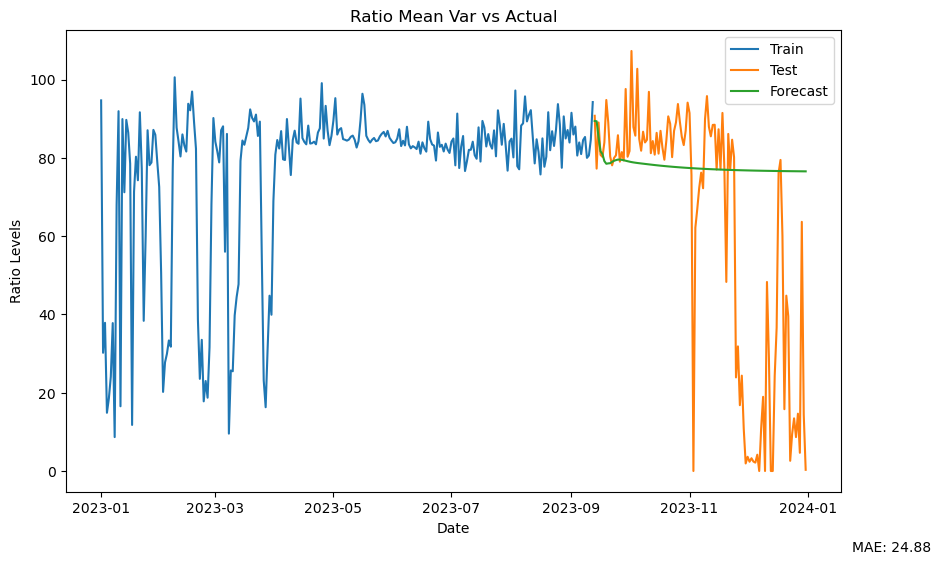

Mean Absolute Error (MAE): 24.88
Plot saved to: data/Ratio_Mean_Var_vs_Actual.png


In [113]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np
var_save_dir_mean = "Plots_VARMAX_mean"
os.makedirs(var_save_dir_mean, exist_ok=True)

# Compare the forecasted values with the actual values
# Assuming these series are defined elsewhere in your project:
# train_fbo0023_ratio.index = train_fbo0023_ratio.index.to_timestamp()
# test_fbo0023_ratio.index = test_fbo0023_ratio.index.to_timestamp()
# forecast.index = forecast.index.to_timestamp()


plt.figure(figsize=(10, 6))
plt.plot(combined_train.index, combined_train["Ratio"], label='Train')
plt.plot(combined_test.index, combined_test["Ratio"], label='Test')
plt.plot(forecast_mean_VAR.index, forecast_mean_VAR["Ratio"], label='Forecast')
plt.title('Ratio Mean Var vs Actual')
plt.xlabel('Date')
plt.ylabel('Ratio Levels')
plt.legend()

# Specify the path and filename for saving the plot
save_path = 'data/Ratio_Mean_Var_vs_Actual.png'
plt.figtext(0.99, 0.01, f'MAE: {MAE:.2f}', horizontalalignment='right')

plt.savefig(save_path, format='png', dpi=300)
plt.show()

# Calculate Mean Absolute Error (MAE)
MAE = np.mean(abs(forecast_mean_VAR["Ratio"] - combined_test["Ratio"]))
print('Mean Absolute Error (MAE): ' + str(np.round(MAE, 2)))

# Print the save path to confirm where the file is saved
print(f"Plot saved to: {save_path}")




In [106]:
#print(train_fbo0023_var)
print(test_fbo0023_var)

                 Ratio  SunRad  Temperature
ValueTime                                  
2023-09-01   96.042224   740.0    14.675000
2023-09-02   94.718512  1900.0    15.870833
2023-09-03   90.694064  3950.0    17.479167
2023-09-04   87.669861  5670.0    23.637500
2023-09-05   83.668607  5910.0    22.825000
2023-09-06   82.371296  6480.0    22.391667
2023-09-07   90.926666  4360.0    19.916667
2023-09-08   88.889390  3710.0    22.920833
2023-09-09   82.718394  4230.0    22.204167
2023-09-10   87.133688  4390.0    23.883333
2023-09-11   75.708590  3740.0    21.687500
2023-09-12   94.892333  1190.0    19.133333
2023-09-13   88.364100   530.0    15.237500
2023-09-14   77.126135  5630.0    17.595833
2023-09-15   93.262805  2950.0    17.062500
2023-09-16   77.602320  3800.0    18.879167
2023-09-17   79.377341  5070.0    18.683333
2023-09-18   90.923302  3060.0    14.470833
2023-09-19   63.250063  2350.0    17.525000
2023-09-20   74.635518  1990.0    17.329167
2023-09-21   87.040349  4500.0  

In [107]:
# Calculate daily absolute errors
daily_errors = np.abs(forecast_fbo0023_var['Ratio'] - test_fbo0023_var['Ratio'])
#print(forecast_fbo0023)

print(daily_errors)


NameError: name 'forecast_fbo0023_var' is not defined

In [ ]:
#forecast_arima_mean.dtypes
ratio_test["Ratio"].dtypes

forecast_arima_mean.dtypes

In [ ]:
MAE_arima_mean = np.mean(abs(forecast_arima_mean - ratio_test["Ratio"]))
print('Mean Absolute Error (MAE): ' + str(np.round(MAE_arima_mean, 2)))


MAE_arima_mean_absolute =mean_absolute_percentage_error( forecast_arima_mean, ratio_test["Ratio"])
print("MAPE:"+ str(np.round(MAE_arima_mean_absolute, 2)))

In [ ]:
MAE_test_fbo0023 = np.mean(abs(forecast - test_fbo0023_ratio))
print('Mean Absolute Error (MAE): ' + str(np.round(MAE_test_fbo0023, 2)))


MAE_arima_mean_absolute_fbo0023= mean_absolute_percentage_error(forecast, test_fbo0023_ratio)
print('MAPE ' + str(np.round(MAE_arima_mean_absolute_fbo0023, 2)))


In [ ]:
MAE_mean_VAR = np.mean(abs(forecast_mean_VAR["Ratio"] - combined_test["Ratio"]))
print('Mean Absolute Error (MAE): ' + str(np.round(MAE_mean_VAR, 2)))

MAE_mean_VAR_absolute = mean_absolute_percentage_error(forecast_mean_VAR["Ratio"] , combined_test["Ratio"])
print(MAE_mean_VAR_absolute)
print('MAPE ' + str(np.round(MAE_mean_VAR_absolute, 2)))


In [ ]:
MAE_forecast_fbo0023_VAR = np.mean(abs(forecast_fbo0023_var["Ratio"] - test_fbo0023_ratio))
print('Mean Absolute Error (MAE): ' + str(np.round(MAE_forecast_fbo0023_VAR, 2)))

MAE_forecast_fbo0023_VAR_Absolute= mean_absolute_percentage_error(forecast_fbo0023_var["Ratio"], test_fbo0023_ratio)
print('MAPE: ' + str(np.round(MAE_forecast_fbo0023_VAR_Absolute, 2)))

